<a href="https://colab.research.google.com/github/tajamaharu/Data-analysis/blob/main/loto_330_BEFORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 関数群

In [ ]:
#@title
!pip install --upgrade matplotlib
#Colab VMにインストールすると、Colabでpypyを使用できます。

!apt-get install pypy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pypy is already the newest version (5.10.0+dfsg-3build2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
#@title
%%pypy
import sys
print(sys.executable)
# /usr/bin/pypy

/usr/bin/pypy


In [ ]:
#@title
%%javascript
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}setInterval(ClickConnect,60000)
from fastprogress.fastprogress import  progress_bar


<IPython.core.display.Javascript object>

In [ ]:
#@title


#コードの実行に時間がかかる場合はfastprogressを使用
!pip install git+https://github.com/fgshun/qreki_py.git@v0.5.1#egg=qreki
from qreki import Kyureki

from sympy import isprime
! pip install -U dtale
import dtale
import dtale.app as dtale_app
dtale_app.USE_COLAB = True

! pip install -U pandas_profiling
import pandas as pd
import warnings
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

! pip install -U sweetviz
import sweetviz as sv
import IPython
!pip install -U fbprophet
from fbprophet import Prophet
import fbprophet.plot as fp

! pip install fastprogress
from fastprogress import master_bar, progress_bar

! pip install gspread
!pip install oauth2client
!pip install -q gwpy
#警告を非表示
import warnings
warnings.simplefilter('ignore')

! pip install pyclustering
from pyclustering.cluster import kmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

from pyclustering.cluster.elbow import elbow

import pandas as pd
import datetime
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pplt
sns.set(style='darkgrid')

"""
import gspread
from oauth2client.service_account import ServiceAccountCredentials

from google.colab import auth
from oauth2client.client import GoogleCredentials
import gspread
import gspread_dataframe as gs_df
"""

"""
SP_CREDENTIAL_FILE  = "gspread-test-277010-1ffae6a6e0a0.json"
SP_COPE=[
         "https://www.googleapis.com/auth/drive",
         "https://spreadsheets.google.com/feeds"
]
SP_SHHT_KEY =  "1Tvwi0mAfRevrU_s5vBAi99TUwgst4LP-hH9ktrugXNU"
SP_sheet ="シート1"

credentials =ServiceAccountCredentials.from_json_keyfile_name(SP_CREDENTIAL_FILE,SP_COPE)
gc =gspread.authorize(credentials)
"""


#データの作成
#ナンバーズのデータ作成
def  make_numbers(num):
    """Parameters:
    ----------
    df =pd.read_table('http://vvslot.com/download.php?m=777&f=numbers' +str(num)+'.txt',encoding ="shift-jis",
                          sep=",",names=["part","date","week","eto","抽選数字"],parse_dates=[1],dtype='object')
    df["LOTO"] = "num"+str(num)
    df =df.sort_values(by='date')
    for i in range(4):
        for j in range(0,4):
            df["N"+str(i+1)] = df["抽選数字"].str[i]
    return df
     ----------
    """

    df =pd.read_table('http://vvslot.com/download.php?m=777&f=numbers' +str(num)+'.txt',encoding ="shift-jis",
                          sep=",",names=["part","date","week","eto","抽選数字"],parse_dates=[1],dtype='object')
    df["LOTO"] = "num"+str(num)
    df =df.sort_values(by='date')
    for i in range(4):
        for j in range(0,4):
            df["N"+str(i+1)] = df["抽選数字"].str[i]
    return df

#ロトデータ作成
def make_loto(name="loto6",col=9,ln=6,b=1):
    """Parameters:
    ----------
    c=list(range(col))
    n =[]
    bo =[] 
    for i in range(1,ln+1):
        n.append("N"+str(i))
    for j in range(1,b+1):
        bo.append("B"+str(j))
    names=["part","date"]+n+bo
    df = pd.read_table('https://'+str(name)+'.thekyo.jp/data/'+str(name)+'.csv',encoding ="shift-jis",
                       sep="," ,skiprows=1 , usecols=c ,parse_dates=[1],names=names)#datetimeの選択
    df["LOTO"] = str(name)
    return df
     ----------
    """

    c=list(range(col))
    n =[]
    bo =[] 
    for i in range(1,ln+1):
        n.append("N"+str(i))
    for j in range(1,b+1):
        bo.append("B"+str(j))
    names=["part","date"]+n+bo
    df = pd.read_table('https://'+str(name)+'.thekyo.jp/data/'+str(name)+'.csv',encoding ="shift-jis",
                       sep="," ,skiprows=1 , usecols=c ,parse_dates=[1],names=names)#datetimeの選択
    df["LOTO"] = str(name)
    return df

#ビンゴ５の読み込
url = 'http://vvslot.com/bingo5_data.php'
df8 = pd.read_html(url )
df8 =df8[9].drop(["Ｎ5",'1等', '2等', '3等'],axis=1)
df8.columns = ['part','date','N1','N2','N3','N4','N5','N6','N7','N8']
df8['date'] = pd.to_datetime(df8['date'], format='%Y年%m月%d日')
df8["LOTO"] = "Bin5"

#日付データの作成
def ddate(df):
    """Parameters:
    ----------
    #df['date']=pd.to_datetime(df['date'], format='%Y年%m月%d日')
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["day"] = df["date"].dt.day
    df["youbi"] = df["date"].dt.dayofweek
    return df
     ----------
    """

    #df['date']=pd.to_datetime(df['date'], format='%Y年%m月%d日')
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["day"] = df["date"].dt.day
    df["youbi"] = df["date"].dt.dayofweek
    roku(df)
   
    return df

#順序データの作成
#ナンバーズの出目表
def make_adf(data,a =2, b=8) :
    """Parameters:
    ----------
    adf= pd.DataFrame(index=data.index, columns=range(1, 44), data=0)
    #1行ごとに実施
    for i in range(len(data.index)):
        #本数字1〜ボーナス数字」の部分だけを取り出し
        tdf = data.iloc[i, a:b]
        #tdfの1要素ごとに実施
        for j in range(len(tdf.index)):
            #adfの該当の場所に数値（本数字1ならば1、2ならば2・・・）
            adf.loc[data.index[i], tdf.iloc[j]] = j+1
    #adf=adf.iloc[:,10:21].fillna(0).astype(int).sort_index(axis=1)
    adf=pd.concat([data, adf], axis=1)
    return adf
     ----------
    """

    
    adf= pd.DataFrame(index=data.index, columns=range(1, 44), data=0)
    #1行ごとに実施
    for i in range(len(data.index)):
        #本数字1〜ボーナス数字」の部分だけを取り出し
        tdf = data.iloc[i, a:b]
        #tdfの1要素ごとに実施
        for j in range(len(tdf.index)):
            #adfの該当の場所に数値（本数字1ならば1、2ならば2・・・）
            adf.loc[data.index[i], tdf.iloc[j]] = j+1
    #adf=adf.iloc[:,10:21].fillna(0).astype(int).sort_index(axis=1)
    adf=pd.concat([data, adf], axis=1)
    return adf


#連番の作成　！
def make_seq(num,data):
    """Parameters:
    ----------
    a =len(data)+1
    l =list(range(1,num+1))
    b= np.tile(l,a+1)
    b =pd.Series(b)
    return b
     ----------
    """

    a =len(data)+1
    l =list(range(1,num+1))
    b= np.tile(l,a+1)
    b =pd.Series(b)
    return b
# 連番
def seq(data,start=1,stop=41):
    """Parameters:
    ----------
    for i in range(start,stop):
        data["SQ"+str(i)] =make_seq(i,data)
    return data
     ----------
    """

    for i in range(start,stop):
        data["sq"+str(i)] =make_seq(i,data)
    return data

# 比率の作成
def rat(A):
    """Parameters:
    ----------
    double_check_dict = A.value_counts(normalize =True).to_dict()
    df['ratio'] = round(A.apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),2)

    return df
     ----------
    """


    double_check_dict = A.value_counts(normalize =True).to_dict()
    df['ratio'] = round(A.apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),2)

    return df

#計算
def compute (df,a):
    """Parameters:
    ----------
    z = str(a)
    df["x"+z] =df[a]
    df["diff_x"+z] =df[a].pct_change(-1) < 0
    double_check_dict = df['x'+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"x"+z]= round(df['x'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)

    df['n'+z] = df[a].groupby((df[a] != df[a].shift()).cumsum()).cumcount() + 1
    df["diff_n"+z] =df['n'+z].pct_change(-1) < 0
    double_check_dict = df['n'+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"n"+z]= round(df['n'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    
    df["rs"+z] = df[a].rolling(w).sum() # 自身も含めた後ろ3つの要素の和を取る
    df["diff_rs"+z] =df['rs'+z].pct_change(-1) < 0
    double_check_dict = df["rs"+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"rs"+z]= round(df['rs'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)

    df['rm'+z] = df[a].rolling(w).mean() # 移動平均を求める
    df["diff_rm"+z] =df['rm'+z].pct_change(-1) < 0
    double_check_dict = df["rm"+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"rm"+z]= round(df['rm'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    
    df['d'+z] = df[a].diff(periods=1)
    df["diff_d"+z] =df['d'+z].pct_change(-1) < 0
    double_check_dict = df["d"+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"d"+z]= round(df['d'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)

    #cdf=df[["LOTO","part","date","x"+z,"ratio_x"+z,"n"+z,"ratio_n"+z,]]
    cdf=df[["LOTO","part","date","x"+z,"diff_x"+z,"ratio_x"+z,"n"+z,"diff_n"+z,"ratio_n"+z,"rs"+z,"diff_rs"+z,"ratio_rs"+z,"rm"+z,"diff_rm"+z,"ratio_rm"+z,"d"+z,"diff_d"+z,"ratio_d"+z,]]
    #cdf=df[["LOTO","part","date","x"+z,"n"+z,"r"+z,"rm"+z,"ratio"+"x"+z]]
    #cdf=df[["LOTO","part","date","x"+z,"r"+z,"rm"+z]]
    
    cdf=ddate(cdf)
    #l=len(cdf)
    #cdf.loc[str(l)] = 0
    cdf.reset_index(inplace=True, drop=True)
    cdf=seq(cdf)
    

    return cdf
     ----------
    """

    z = str(a)
    df["x"+z+"qa"] =df[a]
    """
    df["diff_x"+z] =df[a].pct_change(-1) < 0
    double_check_dict = df['x'+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"x"+z]= round(df['x'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    """
    #df['n'+z] = df[a].groupby((df[a] != df[a].shift()).cumsum()).cumcount() + 1
    """
    df["diff_n"+z] =df['n'+z].pct_change(-1) < 0
    double_check_dict = df['n'+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"n"+z]= round(df['n'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    """
    df["s"+z] = df[a].rolling(w).sum() # 自身も含めた後ろ3つの要素の和を取る
    """
    df["diff_rs"+z] =df['rs'+z].pct_change(-1) < 0
    double_check_dict = df["rs"+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"rs"+z]= round(df['rs'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    """
    #df['rm'+z] = df[a].rolling(w).mean() # 移動平均を求める
    """
    df["diff_rm"+z] =df['rm'+z].pct_change(-1) < 0
    double_check_dict = df["rm"+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"rm"+z]= round(df['rm'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    
    df['d'+z] = df[a].diff(periods=1)
    df["diff_d"+z] =df['d'+z].pct_change(-1) < 0
    double_check_dict = df["d"+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"d"+z]= round(df['d'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)

    #cdf=df[["LOTO","part","date","x"+z+"qa","ratio_x"+z,"n"+z,"ratio_n"+z,]]
    #cdf=df[["LOTO","part","date","x"+z+"qa","diff_x"+z,"ratio_x"+z,"n"+z,"diff_n"+z,"ratio_n"+z,"rs"+z,"diff_rs"+z,"ratio_rs"+z,"rm"+z,"diff_rm"+z,"ratio_rm"+z,"d"+z,"diff_d"+z,"ratio_d"+z,]]
    """
    cdf=df[["LOTO","part","date","x"+z+"qa","s"+z]]
    
    #cdf=df[["LOTO","part","date","x"+z+"qa"]]
    
    qdf=ddate(cdf)
    #l=len(cdf)
    #cdf.loc[str(l)] = 0
    qdf.reset_index(inplace=True, drop=True)
    wdf=seq(qdf)
    

    return wdf

def KElbow(q,n_clusters):
    """Parameters:
    ----------
    a=q
    g =a.values
    kmin, kmax = 1, 20  # 探索する値域
    elb = elbow(g, kmin=kmin, kmax=kmax)  # 探索範囲は、kmin~kmax-1までなことに注意
    elb.process()
    elb.get_amount()  # クラスタ数を参照できる


    kmeans=KMeans(n_clusters=n_clusters)
    kmeans.fit(q)
    q["label"] = kmeans.labels_

    vis=KElbowVisualizer(kmeans, k=(2,12))
    vis.fit(q)
    elb.get_amount()  # クラスタ数を参照できる
    return q         ----------
    """
    a=q
    g =a.values
    kmin, kmax = 1, 20  # 探索する値域
    elb = elbow(g, kmin=kmin, kmax=kmax)  # 探索範囲は、kmin~kmax-1までなことに注意
    elb.process()
    elb.get_amount()  # クラスタ数を参照できる


    kmeans=KMeans(n_clusters=n_clusters)
    kmeans.fit(q)
    q["label"] = kmeans.labels_

    vis=KElbowVisualizer(kmeans, k=(2,12))
    vis.fit(q)
    el=elb.get_amount()  # クラスタ数を参照できる
    return el

def TSNEandPCA(q,n_components):
    """Parameters:
    ----------
    Z =TSNE(n_components=n_components,random_state=0).fit_transform(q)
    pca =PCA(n_components=n_components,random_state=0)
    pca.fit(q)
    pca.components_
    Y=pca.transform(q)
    if n_components==2:
        q["TSNE_X"]=Z[:,0]
        q["TSNE_Y"]=Z[:,1]
    
        q["PCA_X"]=Y[:,0]
        q["PCA_Y"]=Y[:,1]

    else:
        q["TSNE_Z"]=Z[:,2]
        q["PCA_Z"]=Y[:,2]
    """
    Z =TSNE(n_components=n_components,random_state=0).fit_transform(q)
    pca =PCA(n_components=n_components,random_state=0)
    pca.fit(q)
    pca.components_
    Y=pca.transform(q)
    if n_components==2:
        q["TSNE_X"]=Z[:,0]
        q["TSNE_Y"]=Z[:,1]
    
        q["PCA_X"]=Y[:,0]
        q["PCA_Y"]=Y[:,1]

    else:
        q["TSNE_X"]=Z[:,0]
        q["TSNE_Y"]=Z[:,1]
        q["TSNE_Z"]=Z[:,2]
        
        q["PCA_X"]=Y[:,0]
        q["PCA_Y"]=Y[:,1]
        q["PCA_Z"]=Y[:,2]
def clusterdis(q,n_clusters):
    """Parameters:
    ----------
    kmeans=KMeans(n_clusters=n_clusters)
    vis=InterclusterDistance(kmeans)
    vis.fit(q)

         ----------
    """
    kmeans=KMeans(n_clusters=n_clusters)
    vis=InterclusterDistance(kmeans)
    vis.fit(q)


def kanco (df,a):
    """Parameters:
    ----------
    z = str(a)
    df["index"]=df.index
    df["x"+z] =df[a]
    df["diff_x"+z] =df[a].pct_change(-1) < 0
    double_check_dict = df['x'+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"x"+z]= round(df['x'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)

    df['n'+z] = df[a].groupby((df[a] != df[a].shift()).cumsum()).cumcount() + 1
    df["diff_n"+z] =df['n'+z].pct_change(-1) < 0
    double_check_dict = df['n'+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"n"+z]= round(df['n'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    
    df["rs"+z] = df[a].rolling(w).sum() # 自身も含めた後ろ3つの要素の和を取る
    df["diff_rs"+z] =df['rs'+z].pct_change(-1) < 0
    double_check_dict = df["rs"+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"rs"+z]= round(df['rs'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)

    df['rm'+z] = df[a].rolling(w).mean() # 移動平均を求める
    df["diff_rm"+z] =df['rm'+z].pct_change(-1) < 0
    double_check_dict = df["rm"+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"rm"+z]= round(df['rm'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    
    df['d'+z] = df[a].diff(periods=1)
    df["diff_d"+z] =df['d'+z].pct_change(-1) < 0
    double_check_dict = df["d"+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"d"+z]= round(df['d'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)

    
    #cdf=df[["LOTO","part","date","x"+z,"ratio_x"+z,"n"+z,"ratio_n"+z,]]
    
    cdf=df[["LOTO","index","x"+z,"diff_x"+z,"ratio_x"+z,"n"+z,"diff_n"+z,"ratio_n"+z,"rs"+z,"diff_rs"+z,"ratio_rs"+z,"rm"+z,"diff_rm"+z,"ratio_rm"+z,"d"+z,"diff_d"+z,"ratio_d"+z,]]
    
    #cdf=df[["LOTO","part","date","x"+z,"n"+z,"r"+z,"rm"+z,"ratio"+"x"+z]]
    #cdf=df[["LOTO","part","date","x"+z,"r"+z,"rm"+z]]
    #l=len(cdf)
    #cdf.loc[str(l)] = 0
    cdf=seq(cdf)
    return cdf
     ----------
    """

    z = str(a)
    df["index"]=df.index
    df["x"+z+"qa"] =df[a]
    """
    df["diff_x"+z] =df[a].pct_change(-1) < 0
    double_check_dict = df['x'+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"x"+z]= round(df['x'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    """
    #df['n'+z] = df[a].groupby((df[a] != df[a].shift()).cumsum()).cumcount() + 1
    """
    df["diff_n"+z] =df['n'+z].pct_change(-1) < 0
    double_check_dict = df['n'+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"n"+z]= round(df['n'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    """
    df["s"+z] = df[a].rolling(w).sum() # 自身も含めた後ろ3つの要素の和を取る
    """
    df["diff_rs"+z] =df['rs'+z].pct_change(-1) < 0
    double_check_dict = df["rs"+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"rs"+z]= round(df['rs'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    """
    #df['rm'+z] = df[a].rolling(w).mean() # 移動平均を求める
    """
    df["diff_rm"+z] =df['rm'+z].pct_change(-1) < 0
    double_check_dict = df["rm"+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"rm"+z]= round(df['rm'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    
    df['d'+z] = df[a].diff(periods=1)
    df["diff_d"+z] =df['d'+z].pct_change(-1) < 0
    double_check_dict = df["d"+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"d"+z]= round(df['d'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)

    
    #cdf=df[["LOTO","part","date","x"+z+"qa","ratio_x"+z,"n"+z,"ratio_n"+z,]]
    
    cdf=df[["LOTO","index","x"+z+"qa","diff_x"+z,"ratio_x"+z,"n"+z,"diff_n"+z,"ratio_n"+z,"rs"+z,"diff_rs"+z,"ratio_rs"+z,"rm"+z,"diff_rm"+z,"ratio_rm"+z,"d"+z,"diff_d"+z,"ratio_d"+z,]]
    """
    #cdf=df[["LOTO","index","x"+z+"qa"]]
    #cdf=df[["LOTO","part","date","x"+z+"qa","n"+z,"r"+z,"rm"+z,"ratio"+"x"+z]]
    cdf=df[["LOTO","index","x"+z+"qa","s"+z]]
    #l=len(cdf)
    #cdf.loc[str(l)] = 0
    cdf.reset_index(inplace=True, drop=True)

    wdf=seq(cdf)
    return wdf


 

#N番分割計算
def keisan(df,name ="A",na=1,a=1):
    """Parameters:
    ----------
    z =str(name)+str(na)
    y= df[list(a)].sum(axis=1)
    df['x'+z] =y
    df["diff_x"+z] =df['x'+z].pct_change(-1) < 0
    double_check_dict = df['x'+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"x"+z]= round(df['x'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)

    df['d'+z] = y.diff(periods=1)
    double_check_dict = df['d'+z].value_counts(normalize =True).to_dict()
    df["diff_d"+z] =df['d'+z].pct_change(-1) < 0
    df["ratio_"+"d"+z]= round(df['d'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    
    df['n'+z] = y.groupby((y != y.shift()).cumsum()).cumcount() + 1
    df["diff_n"+z] =df['n'+z].pct_change(-1) < 0
    double_check_dict = df['n'+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"n"+z]= round(df['n'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    
    df["rs"+z] = y.rolling(w).sum() # 自身も含めた後ろ3つの要素の和を取る
    df["diff_rs"+z] =df['rs'+z].pct_change(-1) < 0
    double_check_dict = df['rs'+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"rs"+z]= round(df['rs'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    
    df['rm'+z] = y.rolling(w).mean() # 移動平均を求める
    df["diff_rm"+z] =df['rm'+z].pct_change(-1) < 0
    double_check_dict = df['rm'+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"rm"+z]= round(df['rm'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    
  
    cdf=df[["LOTO","part","date","x"+z,"diff_x"+z,"ratio_x"+z,"n"+z,"diff_n"+z,"ratio_n"+z,"rs"+z,"diff_rs"+z,"ratio_rs"+z,"rm"+z,"diff_rm"+z,"ratio_rm"+z,"d"+z,"diff_d"+z,"ratio_d"+z,]]
    #cdf=df[["LOTO","part","date","x"+z,"n"+z,"r"+z,"rm"+z, 'd'+z]]
    #ddf=df[["LOTO","part","date","x"+z,"n"+z,"r"+z,"rm"+z, ]]
    cdf=ddate(cdf)
    #l=len(cdf)
    #cdf.loc[str(l)] = 0

    cdf=seq(cdf)
    return cdf
     ----------
    """

    z =str(name)+str(na)
    y= df[list(a)].sum(axis=1)
    df['x'+z+"qa"] =y
    """
    df["diff_x"+z] =df['x'+z].pct_change(-1) < 0
    double_check_dict = df['x'+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"x"+z]= round(df['x'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)

    df['d'+z] = y.diff(periods=1)
    double_check_dict = df['d'+z].value_counts(normalize =True).to_dict()
    df["diff_d"+z] =df['d'+z].pct_change(-1) < 0
    df["ratio_"+"d"+z]= round(df['d'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    """
    #df['n'+z] = y.groupby((y != y.shift()).cumsum()).cumcount() + 1
    """
    df["diff_n"+z] =df['n'+z].pct_change(-1) < 0
    double_check_dict = df['n'+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"n"+z]= round(df['n'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    """
    df["s"+z] = y.rolling(w).sum() # 自身も含めた後ろ3つの要素の和を取る
    """
    df["diff_rs"+z] =df['rs'+z].pct_change(-1) < 0
    double_check_dict = df['rs'+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"rs"+z]= round(df['rs'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
    """
    #df['rm'+z] = y.rolling(w).mean() # 移動平均を求める
    """
    df["diff_rm"+z] =df['rm'+z].pct_change(-1) < 0
    double_check_dict = df['rm'+z].value_counts(normalize =True).to_dict()
    df["ratio_"+"rm"+z]= round(df['rm'+z].apply(lambda x: double_check_dict[x] if x in double_check_dict else 0),3)
   
  
    #cdf=df[["LOTO","part","date","x"+z+"qa","diff_x"+z,"ratio_x"+z,"n"+z,"diff_n"+z,"ratio_n"+z,"rs"+z,"diff_rs"+z,"ratio_rs"+z,"rm"+z,"diff_rm"+z,"ratio_rm"+z,"d"+z,"diff_d"+z,"ratio_d"+z,]]
    #cdf=df[["LOTO","part","date","x"+z+"qa","n"+z,"r"+z,"rm"+z, 'd'+z]]
    """
    cdf=df[["LOTO","part","date","x"+z+"qa","s"+z]]
    
    #cdf=df[["LOTO","part","date","x"+z+"qa"]]
   
    qdf=ddate(cdf)
    #l=len(cdf)
    #cdf.loc[str(l)] = 0
    qdf.reset_index(inplace=True, drop=True)

    wdf=seq(qdf)
    return wdf



    
#連番分割計算
#スプレットシートの書き込み
"""
def sheet(data,num):
     # 認証処理
    auth.authenticate_user()
    gc = gspread.authorize(GoogleCredentials.get_application_default())
    # 'sample'一つ目のワークシート
    worksheet = gc.open('loto6　Spreadsheet').get_worksheet(num)
    worksheet.clear() 	
    # write
    gs_df.set_with_dataframe(worksheet, data)
    # read
    df_sp = gs_df.get_as_dataframe(worksheet)
"""
#Kmeans関数＆エルボー法とクラスタ数参照

def xmeans(FIG,cluster=3):
    """Parameters:
    ----------
    a=FIG
    g =a.values
    kmin, kmax = 1, 20  # 探索する値域
    elb = elbow(g, kmin=kmin, kmax=kmax)  # 探索範囲は、kmin~kmax-1までなことに注意
    elb.process()
    elb.get_amount()  # クラスタ数を参照できる
    pplt.figure(figsize=(14,7))
    pplt.plot(range(kmin, kmax), elb.get_wce(),)
    print(elb.get_amount() )


    initial_centers = kmeans_plusplus_initializer(a,cluster ).initialize()  # k-means++で初期値設定
    pc_km = kmeans.kmeans(a, initial_centers)  # kmeansクラスの定義
    pc_km.process()  # 学習の実行

    a["label"] = pc_km.predict(a);a
    a["index"]=a.index
    #fig=px.line(a,x="index",y ="label",color="label",mode= 'lines+markers')
    #fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=a["index"] , y= a["label"],mode= 'lines+markers'))
    fig.update_layout( xaxis_rangeslider_visible=True)
    fig.show()


   
    return a;a.head()
     ----------
    """


    a=FIG
    g =a.values
    kmin, kmax = 1, 20  # 探索する値域
    elb = elbow(g, kmin=kmin, kmax=kmax)  # 探索範囲は、kmin~kmax-1までなことに注意
    elb.process()
    elb.get_amount()  # クラスタ数を参照できる
    pplt.figure(figsize=(14,7))
    pplt.plot(range(kmin, kmax), elb.get_wce())
    print(elb.get_amount() )


    initial_centers = kmeans_plusplus_initializer(a,cluster ).initialize()  # k-means++で初期値設定
    pc_km = kmeans.kmeans(a, initial_centers)  # kmeansクラスの定義
    pc_km.process()  # 学習の実行

    a["label"] = pc_km.predict(a)
    a["index"]=a.index
    fig=px.line(a,x="index",y ="label",color="label",mode= 'lines+markers')
    fig.show()
    """

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=a["index"] , y= a["label"],mode= 'lines+markers'))
    fig.update_layout( xaxis_rangeslider_visible=True)
    fig.show()
    """


   
    return a;a.head()

"""    
#LOTO条件ごとの計算

def loto6com():

    df1 =compute (data,"N1")
    df2=compute (data,"N2")
    df3 =compute (data,"N3")
    df4 =compute (data,"N4")
    df5 =compute (data,"N5")
    df6 =compute (data,"N6")
    df7 =compute (data,"B1")


    edf1 =pd.concat([df1, df2, df3, df4, df5, df6, df7 ],axis=1).T.drop_duplicates().T
    return edf1,df1, df2, df3, df4, df5, df6, df7

#LOTO条件ごとの計算
def minilotocom():

    df1 =compute (data,"N1")
    df2=compute (data,"N2")
    df3 =compute (data,"N3")
    df4 =compute (data,"N4")
    df5 =compute (data,"N5")
    df6 =compute (data,"B1")


    edf1 =pd.concat([df1, df2, df3, df4, df5, df6],axis=1).T.drop_duplicates().T
    return edf1,df1, df2, df3, df4, df5, df6

#LOTO条件ごとの計算
def loto7com():

    df1 =compute (data,"N1")
    df2=compute (data,"N2")
    df3 =compute (data,"N3")
    df4 =compute (data,"N4")
    df5 =compute (data,"N5")
    df6 =compute (data,"N6")
    df6 =compute (data,"N7")
    df7 =compute (data,"B1")
    df8 =compute (data,"B2")


    edf1 =pd.concat([df1, df2, df3, df4, df5, df6, df7, df8],axis=1).T.drop_duplicates().T
    return edf1,df1, df2, df3, df4, df5, df6, df7, df8


#LOTO条件ごとの計算
def bingocom():

    df1 =compute (data,"N1")
    df2=compute (data,"N2")
    df3 =compute (data,"N3")
    df4 =compute (data,"N4")
    df5 =compute (data,"N5")
    df6 =compute (data,"N6")
    df7 =compute (data,"N7")
    df8 =compute (data,"N8")


    edf1 =pd.concat([df1, df2, df3, df4, df5, df6, df7, df8],axis=1).T.drop_duplicates().T
    return edf1,df1, df2, df3, df4, df5, df6, df7, df8

#LOTO条件ごとの計算
def num4om():

    df1 =compute (data,"N1")
    df2=compute (data,"N2")
    df3 =compute (data,"N3")
    df4 =compute (data,"N4")
 
    edf1 =pd.concat([df1, df2, df3, df4],axis=1).T.drop_duplicates().T
    return edf1,df1, df2, df3, df4

#LOTO条件ごとの計算
def num3com():

    df1 =compute (data,"N1")
    df2=compute (data,"N2")
    df3 =compute (data,"N3")
  

    edf1 =pd.concat([df1, df2, df3],axis=1).T.drop_duplicates().T
    return edf1,df1, df2, df3



# LOTO条件ごとの計算
def lotoloto(loto="miniloto"):
    if loto =="miniloto":
        df=minilotocom()
    elif loto =="loto6":
        df=loto6com()
    elif loto =="loto7":
        df=loto7com()
    elif loto =="Bin5":
        df=bingocom()
    elif loto =="num3":
        df=num3com()
    elif loto =="num4":
        df=num4com()
    return df
"""

#LOTO条件選択
def choice(loto="data"):
    """Parameters:
    ----------
    if loto=="num3":
        data =na_ddf.query( "LOTO=='num3'"  )
    elif loto=="num4":
        data =na_ddf.query( "LOTO=='num4'"  )
    elif loto=="mini":
        data =loto_bdf.query( "LOTO=='miniloto'"  )
    elif loto=="loto6":
        data =loto_bdf.query( "LOTO=='loto6'"  )
    elif loto=="bin5":
        data =loto_bdf.query( "LOTO=='Bin5'"  )
    elif loto=="loto7":
        data =loto_bdf.query( "LOTO=='loto7'"  )
    else:
        data =loto_bdf
    return data
     ----------
    """

    if loto=="num3":
        data =loto_bdf.query( "LOTO=='num3'"  )
    elif loto=="num4":
        data =loto_bdf.query( "LOTO=='num4'"  )
    elif loto=="mini":
        data =loto_bdf.query( "LOTO=='miniloto'"  )
    elif loto=="loto6":
        data =loto_bdf.query( "LOTO=='loto6'"  )
    elif loto=="bin5":
        data =loto_bdf.query( "LOTO=='Bin5'"  )
    elif loto=="loto7":
        data =loto_bdf.query( "LOTO=='loto7'"  )
    else:
        data =loto_bdf
    return data


    """

    dt= datetime.datetime.now()
    w_list = ['月曜日', '火曜日', '水曜日', '木曜日', '金曜日', '土曜日', '日曜日']
    d=w_list[dt.weekday()]
    if d== "月曜日":
        data=choice(loto="loto6")
        data=ddate(data)
        kkk=kankan(a="loto6")
        d2=order(data2,loto="loto6")
        deme1=deme(data)
        
        #loto=lotoloto(loto="loto6")
    elif d== "火曜日":
        data=choice(loto="mini")
        data=ddate(data)
        kkk=kankan(a="mini")
        d2=order(data2,loto="miniloto")
        deme1=deme(data)
        #loto=lotoloto(loto="miniloto")
    elif d== "水曜日":
        data=choice(loto="bin5")
        data=ddate(data)
        kkk=0
        d2=order(data2,loto="bin5")
        deme1=deme(data)
        #loto=lotoloto(loto="bin5")
    elif d== "木曜日":
        data=choice(loto="loto6")
        data=ddate(data)
        kkk=kankan(a="loto6")
        d2=order(data2,loto="loto6")
        deme1=deme(data)
        #loto=lotoloto(loto="loto6")
    elif d== "金曜日":
        data=choice(loto="loto7")
        data=ddate(data)
        kkk=kankan(a="loto7")
        d2=order(data2,loto="loto7")
        deme1=deme(data)
        #loto=lotoloto(loto="loto7")

        """
def today(loto):
    """Parameters:
    ----------
    if loto== "loto6":
        data=choice(loto="loto6")
        data=ddate(data)
        kkk=kankan(a="loto6")
        d2=order(data2,loto="loto6")
        deme1=deme(data)
        #loto=lotoloto(loto="loto6")
    elif loto== "mini":
        data=choice(loto="mini")
        data=ddate(data)
        kkk=kankan(a="mini")
        d2=order(data2,loto="miniloto")
        deme1=deme(data)
        #loto=lotoloto(loto="miniloto")
    elif loto== "bin5":
        data=choice(loto="bin5")
        data=ddate(data)
        kkk=0
        d2=order(data2,loto="bin5")
        deme1=deme(data)
        #loto=lotoloto(loto="bin5")
    elif loto== "loto7":
        data=choice(loto="loto7")
        data=ddate(data)
        kkk=kankan(a="loto7")
        d2=order(data2,loto="loto7")
        deme1=deme(data)
        #loto=lotoloto(loto="loto7")
    elif loto== "num3":
        data=choice(loto="num3")
        data=ddate(data)
        kkk=kankan(a="num3")
        d2=order(na_adf,loto="num3")
        deme1=deme(data)
        #loto=lotoloto(loto="num3")
    elif loto== "num4":
        data=choice(loto="num4")
        data=ddate(data)
        kkk=kankan(a="num4")
        d2=order(na_adf,loto="num4")
        deme1=deme(data)
        #loto=lotoloto(loto="num4")

    return data ,kkk,deme1,d2,#loto
     ----------
    """
#["loto6","mini","bin5","loto7","num3","num4"]
    if loto== "loto6":
        data=choice(loto="loto6")
        data=ddate(data)
        kkk=kankan(a="loto6")
        d2=order(data2,loto="loto6")
        deme1=order(data1,loto="num4")
        #loto=lotoloto(loto="loto6")
    elif loto== "mini":
        data=choice(loto="mini")
        data=ddate(data)
        kkk=kankan(a="mini")
        d2=order(data2,loto="mini")
        deme1=order(data1,loto="num4")
        #loto=lotoloto(loto="miniloto")
    elif loto== "bin5":
        data=choice(loto="bin5")
        data=ddate(data)
        kkk=0
        d2=order(data2,loto="bin5")
        deme1=order(data1,loto="num4")
        #loto=lotoloto(loto="bin5")
    elif loto== "loto7":
        data=choice(loto="loto7")
        data=ddate(data)
        kkk=kankan(a="loto7")
        d2=order(data2,loto="loto7")
        deme1=order(data1,loto="num4")
        #loto=lotoloto(loto="loto7")
    elif loto== "num3":
        data=choice(loto="num3")
        data=ddate(data)
        kkk=kankan(a="num3")
        d2=order(na_ddf,loto="num3")
        deme1=order(na_ddf,loto="num4")
        #loto=lotoloto(loto="num3")
    elif loto== "num4":
        data=choice(loto="num4")
        data=ddate(data)
        kkk=kankan(a="num4")
        d2=order(na_ddf,loto="num4")
        deme1=order(na_ddf,loto="num4")
        #loto=lotoloto(loto="num4")

    return data ,kkk,deme1,d2,#loto

def todaynumbers():
    """Parameters:
    ----------
        deme1=order(na_ddf,loto="num4")
        #loto=lotoloto(loto="num4")

    return deme1#loto
     ----------
    """
#["loto6","mini","bin5","loto7","num3","num4"]
    
    deme1=order(na_ddf,loto="num4")
    #loto=lotoloto(loto="num3")

    return deme1#loto

def roku(data):
    data.reset_index(inplace=True )
    l=[]
    for i in range(len(data.year)):
        k = Kyureki.from_ymd(data.year[i], data.month[i], data.day[i])
        l.append(k.rokuyou)
    data["rokuyou"]=l

    #return ddate(data) ,kkk,ddate(deme1),ddate(d2),ddate(loto)   


  Cloning https://github.com/fgshun/qreki_py.git (to revision v0.5.1) to /tmp/pip-install-vdmdi9se/qreki_4b2e1bfdeb104a38bb2cbe1c44fc3235
  Running command git clone -q https://github.com/fgshun/qreki_py.git /tmp/pip-install-vdmdi9se/qreki_4b2e1bfdeb104a38bb2cbe1c44fc3235
  Running command git checkout -q 05530ee9c05a0e245e1d540ac2f63ad47821c325


In [ ]:
#@title
pd.options.display.precision = 1


In [ ]:
#@title
import re
a="x2qa"
m = re.search(r'\d+', a).group()
m

'2'

In [ ]:
#@title
def compute1 (df,a="x1qa"):
    m = re.search(r'\d+', a).group()
    m
    df[a]
    #df['n'+str(m)] = df[a].groupby((df[a] != df[a].shift()).cumsum()).cumcount() + 1
    df["s"+str(m)] = df[a].rolling(w).sum() # 自身も含めた後ろ3つの要素の和を取る
    #df['rm'+str(m)] = df[a].rolling(w).mean() # 移動平均を求める
    cdf=df[["LOTO","part","date",str(a),"s"+m]]
    
    #cdf=df[["LOTO","part","date","x"+z+"qa"]]
    
    qdf=ddate(cdf)
    #l=len(cdf)
    #cdf.loc[str(l)] = 0
    qdf.reset_index(inplace=True, drop=True)

    wdf=seq(qdf)
    

    return wdf


In [ ]:
#@title

import IPython



In [ ]:
#@title
def demecompute_1(wedf):
    df1=compute1(wedf,a="x1qa")
    df2=compute1(wedf,a="x2qa")
    df3=compute1(wedf,a="x3qa")
    df4=compute1(wedf,a="x4qa")
    df5=compute1(wedf,a="x5qa")
    df6=compute1(wedf,a="x6qa")
    df7=compute1(wedf,a="x7qa")
    df8=compute1(wedf,a="x8qa")
    df9=compute1(wedf,a="x9qa")
    df10=compute1(wedf,a="x10qa")
    df11=compute1(wedf,a="x11qa")
    df12=compute1(wedf,a="x12qa")
    df13=compute1(wedf,a="x13qa")
    df14=compute1(wedf,a="x14qa")
    df15=compute1(wedf,a="x15qa")
    df16=compute1(wedf,a="x16qa")
    df17=compute1(wedf,a="x17qa")
    df18=compute1(wedf,a="x18qa")
    df19=compute1(wedf,a="x19qa")
    df20=compute1(wedf,a="x20qa")
    df21=compute1(wedf,a="x21qa")
    df22=compute1(wedf,a="x22qa")
    df23=compute1(wedf,a="x23qa")
    df24=compute1(wedf,a="x24qa")
    df25=compute1(wedf,a="x25qa")
    df26=compute1(wedf,a="x26qa")
    df27=compute1(wedf,a="x27qa")
    df28=compute1(wedf,a="x28qa")
    df29=compute1(wedf,a="x29qa")
    df30=compute1(wedf,a="x30qa")
    df31=compute1(wedf,a="x31qa")
    df32=compute1(wedf,a="x32qa")
    df33=compute1(wedf,a="x33qa")
    df34=compute1(wedf,a="x34qa")
    df35=compute1(wedf,a="x35qa")
    df36=compute1(wedf,a="x36qa")
    df37=compute1(wedf,a="x37qa")
    df38=compute1(wedf,a="x38qa")
    df39=compute1(wedf,a="x39qa")
    df40=compute1(wedf,a="x40qa")
    df41=compute1(wedf,a="x41qa")
    df42=compute1(wedf,a="x42qa")
    df43=compute1(wedf,a="x43qa")
    edf1 =pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43],axis=1).T.drop_duplicates().T
    return edf1,df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43

#@title
def demecompute_2(wedf):
    df1=compute1(wedf,a="x1qa")
    df2=compute1(wedf,a="x2qa")
    df3=compute1(wedf,a="x3qa")
    df4=compute1(wedf,a="x4qa")
    df5=compute1(wedf,a="x5qa")
    df6=compute1(wedf,a="x6qa")
    df7=compute1(wedf,a="x7qa")
    df8=compute1(wedf,a="x8qa")
    df9=compute1(wedf,a="x9qa")
    df10=compute1(wedf,a="x10qa")
    edf1 =pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10],axis=1).T.drop_duplicates().T
    return edf1,df1, df2, df3, df4, df5, df6, df7, df8, df9, df10

#@title
def demecompute_3(wedf):
    df1=compute1(wedf,a="1")
    df2=compute1(wedf,a="2")
    df3=compute1(wedf,a="3")
    df4=compute1(wedf,a="4")
    df5=compute1(wedf,a="5")
    df6=compute1(wedf,a="6")
    df7=compute1(wedf,a="7")
    df8=compute1(wedf,a="8")
    df9=compute1(wedf,a="9")
    df10=compute1(wedf,a="10")
    edf1 =pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10],axis=1).T.drop_duplicates().T
    return edf1,df1, df2, df3, df4, df5, df6, df7, df8, df9, df10

In [ ]:
#@title

#データの作成
df3=make_numbers(3)
df4= make_numbers(4)
df5=make_loto(name="miniloto",col=8,ln=5,b=1)
df6=make_loto()
df7=make_loto(name="loto7",col=11,ln=7,b=2)
df= pd.concat([df3,df4,df5,df6, df7,df8]).sort_values(by='date')
df =df[["LOTO","date","part","N1","N2","N3","N4","N5","N6","N7","N8","B1","B2"]]
df.reset_index(inplace=True, drop=True)


seq(df,1,40)
ddate(df)

#順序付きの出目表　ナンバーズ
adf3 =make_adf(df3,6,9)
adf3 =adf3.drop(columns=adf3.columns[[10,11, 12,13,14,15,16,17,18,19]])
adf3 = adf3.iloc[:,10:].fillna(0).astype(int).rename(columns={"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"0":10}).sort_index(axis=1)
adf3=pd.concat([df3,adf3],axis=1)


adf4 =make_adf(df4,6,10)
adf4 =adf4.drop(columns=adf4.columns[[10,11, 12,13,14,15,16,17,18,19]])
adf4 = adf4.iloc[:,10:].fillna(0).astype(int).rename(columns={"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"0":10}).sort_index(axis=1)
adf4=pd.concat([df4,adf4],axis=1)

na_adf=pd.concat([adf3,adf4]).sort_values(by='date')
na_bdf=na_adf.iloc[:,10:].replace({2:1,3:1,4:1})
na_cdf=na_adf[["LOTO","part","date","eto","N1","N2","N3","N4"]]
na_fdf=na_adf[["LOTO","part","date","N1","N2","N3","N4"]]
na_ddf= pd.concat([na_fdf,na_bdf],axis=1).sort_values(by='date')
na_ddf
ddate(na_ddf)


#順序付きの出目表　ロト
adf5 =make_adf(df5,2,8)
adf6 =make_adf(df6,2,9)
adf7 =make_adf(df7,2,10)
adf8 =make_adf(df8,2,10)
loto_df= pd.concat([adf5,adf6, adf7,adf8]).sort_values(by='date')
loto_df1=loto_df[["LOTO","date","part","N1","N2","N3","N4","N5","N6","N7","N8","B1","B2"]]
loto_df2 =loto_df.iloc[:,9:-4]
loto_adf= pd.concat([loto_df1,loto_df2,],axis=1)
loto_adf.reset_index(inplace=True, drop=True)

seq(loto_adf,1,40)
ddate(loto_adf)


#すべてが１か0.１の出目表
bdf5= adf5.iloc[:,8:].replace({2:1,3:1,4:1,5:1,6:0.1})
bdf5=pd.concat([adf5.iloc[:,:8],bdf5],axis=1)
bdf6= adf6.iloc[:,10:].replace({2:1,3:1,4:1,5:1,6:1,7:0.1})
bdf6=pd.concat([adf6.iloc[:,:10],bdf6],axis=1)
bdf7= adf7.iloc[:,12:].replace({2:1,3:1,4:1,5:1,6:1,7:1,8:0.1,9:0.1})
bdf7=pd.concat([adf7.iloc[:,:12],bdf7],axis=1)
bdf8= adf8.iloc[:,11:].replace({2:1,3:1,4:1,5:1,6:1,7:1,8:1})
bdf8=pd.concat([adf8.iloc[:,:11],bdf8],axis=1)
loto_bdf= pd.concat([bdf5,bdf6, bdf7,bdf8,na_ddf]).sort_values(by="date")

loto_bdf1=loto_bdf[["LOTO","date","part","N1","N2","N3","N4","N5","N6","N7","N8","B1","B2"]]
loto_bdf2 =loto_bdf.drop(["LOTO","date","part","N1","N2","N3","N4","N5","N6","N7","N8","B1","B2"],axis=1)
data1= pd.concat([loto_bdf1,loto_bdf2],axis=1)
data1=ddate(data1)

data2= pd.concat([loto_df1,loto_df2],axis=1)
data2=ddate(data2)


In [ ]:
#@title

N3x1 =make_adf(df3,6,7)

N3x1 =N3x1.drop(columns=N3x1.columns[[10,11, 12,13,14,15,16,17,18,19]])
N3x1 = N3x1.iloc[:,10:].fillna(0).astype(int).rename(columns={"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"0":10}).sort_index(axis=1)
N3x1=pd.concat([df3,N3x1],axis=1)
N3x1.head(100)

N4x1 =make_adf(df4,6,7)
N4x1 =N4x1.drop(columns=N4x1.columns[[10,11, 12,13,14,15,16,17,18,19]])
N4x1 = N4x1.iloc[:,10:].fillna(0).astype(int).rename(columns={"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"0":10}).sort_index(axis=1)
N4x1=pd.concat([df4,N4x1],axis=1)
N3x1.head(100)

na_x1=pd.concat([N3x1,N4x1]).sort_values(by='date')
na_bdf=na_x1.iloc[:,10:].replace({2:1,3:1,4:1})
na_cdf=na_x1[["LOTO","part","date","eto","N1","N2","N3","N4"]]
na_fdf=na_x1[["LOTO","part","date","N1","N2","N3","N4"]]
na_ddfx1= pd.concat([na_fdf,na_bdf],axis=1).sort_values(by='date')
na_ddfx1
ddate(na_ddfx1).tail(1)

index  LOTO  part       date N1 N2 N3 N4  1  2  3  4  5  6  7  8  9  \
11513   5757  num4  5758 2021-08-13  0  9  4  9  0  0  0  0  0  0  0  0  0   

       10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  \
11513   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

       28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  year  \
11513   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  2021   

       month  day  youbi rokuyou  
11513      8   13      4      赤口

In [ ]:
#@title

N3x2 =make_adf(df3,7,8)

N3x2 =N3x2.drop(columns=N3x2.columns[[10,11, 12,13,14,15,16,17,18,19]])
N3x2 = N3x2.iloc[:,10:].fillna(0).astype(int).rename(columns={"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"0":10}).sort_index(axis=1)
N3x2=pd.concat([df3,N3x2],axis=1)

N4x2 =make_adf(df4,7,8)
N4x2 =N4x2.drop(columns=N4x2.columns[[10,11, 12,13,14,15,16,17,18,19]])
N4x2 = N4x2.iloc[:,10:].fillna(0).astype(int).rename(columns={"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"0":10}).sort_index(axis=1)
N4x2=pd.concat([df4,N4x2],axis=1)

na_x2=pd.concat([N3x2,N4x2]).sort_values(by='date')
na_bdf=na_x2.iloc[:,10:].replace({2:1,3:1,4:1})
na_cdf=na_x2[["LOTO","part","date","eto","N1","N2","N3","N4"]]
na_fdf=na_x2[["LOTO","part","date","N1","N2","N3","N4"]]
na_ddfx2= pd.concat([na_fdf,na_bdf],axis=1).sort_values(by='date')
na_ddfx2
ddate(na_ddfx2).tail(1)

index  LOTO  part       date N1 N2 N3 N4  1  2  3  4  5  6  7  8  9  \
11513   5757  num4  5758 2021-08-13  0  9  4  9  0  0  0  0  0  0  0  0  1   

       10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  \
11513   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

       28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  year  \
11513   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  2021   

       month  day  youbi rokuyou  
11513      8   13      4      赤口

In [ ]:
#@title

N3x3 =make_adf(df3,8,9)

N3x3 =N3x3.drop(columns=N3x3.columns[[10,11, 12,13,14,15,16,17,18,19]])
N3x3 = N3x3.iloc[:,10:].fillna(0).astype(int).rename(columns={"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"0":10}).sort_index(axis=1)
N3x3=pd.concat([df3,N3x3],axis=1)

N4x3 =make_adf(df4,8,9)
N4x3 =N4x3.drop(columns=N4x3.columns[[10,11, 12,13,14,15,16,17,18,19]])
N4x3 = N4x3.iloc[:,10:].fillna(0).astype(int).rename(columns={"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"0":10}).sort_index(axis=1)
N4x3=pd.concat([df4,N4x3],axis=1)

na_x3=pd.concat([N3x3,N4x3]).sort_values(by='date')
na_bdf=na_x3.iloc[:,10:].replace({2:1,3:1,4:1})
na_cdf=na_x3[["LOTO","part","date","eto","N1","N2","N3","N4"]]
na_fdf=na_x3[["LOTO","part","date","N1","N2","N3","N4"]]
na_ddfx3= pd.concat([na_fdf,na_bdf],axis=1).sort_values(by='date')
na_ddfx3
ddate(na_ddfx3).tail(1)

index  LOTO  part       date N1 N2 N3 N4  1  2  3  4  5  6  7  8  9  \
11513   5757  num4  5758 2021-08-13  0  9  4  9  0  0  0  1  0  0  0  0  0   

       10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  \
11513   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

       28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  year  \
11513   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  2021   

       month  day  youbi rokuyou  
11513      8   13      4      赤口

In [ ]:
#@title




N4x4 =make_adf(df4,9,10)
N4x4 =N4x4.drop(columns=N4x4.columns[[10,11, 12,13,14,15,16,17,18,19]])
N4x4 = N4x4.iloc[:,10:].fillna(0).astype(int).rename(columns={"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"0":10}).sort_index(axis=1)
N4x4=pd.concat([df4,N4x4],axis=1)

na_x4=pd.concat([N4x4]).sort_values(by='date')
na_bdf=na_x4.iloc[:,10:].replace({2:1,3:1,4:1})
na_cdf=na_x4[["LOTO","part","date","eto","N1","N2","N3","N4"]]
na_fdf=na_x4[["LOTO","part","date","N1","N2","N3","N4"]]
na_ddfx4= pd.concat([na_fdf,na_bdf],axis=1).sort_values(by='date')
na_ddfx4
ddate(na_ddfx4).tail(1)

index  LOTO  part       date N1 N2 N3 N4  1  2  3  4  5  6  7  8  9  10  \
5757   5757  num4  5758 2021-08-13  0  9  4  9  0  0  0  0  0  0  0  0  1   0   

      11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  \
5757   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

      29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  year  month  \
5757   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  2021      8   

      day  youbi rokuyou  
5757   13      4      赤口

In [ ]:
#@title
! pip install fbprophet

import plotly.express as px
from plotly.offline import plot as plt
import plotly.io as pio
pio.renderers.default = "colab"

from fbprophet import Prophet
import fbprophet.plot as fp

In [ ]:
#@title
!pip install japanize-matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
import japanize_matplotlib
import datetime
from matplotlib.dates import MonthLocator
from IPython.display import HTML

sns.set_style('darkgrid')
pio.templates.default = 'seaborn'
pplt.rcParams['font.family'] = 'IPAexGothic'

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import plotly
print(sns.__version__) # 0.9.0
print(plotly.__version__) # 4.2.1

0.11.1
5.2.1


In [ ]:
#@title

def order(data2,loto="miniloto"):
    """Parameters:
    ----------
    if loto=="loto6":
        data2=data2[data2["LOTO"]=="loto6"]
    elif loto=="loto7":
        data2=data2[data2["LOTO"]=="loto7"]
    elif loto=="Bin5":
        data2=data2[data2["LOTO"]=="Bin5"]
    elif loto=="num3":
        data2=data2[data2["LOTO"]=="num3"]
    elif loto=="num4":
        data2[data2["LOTO"]=="num4"]
    elif loto=="miniloto":
        data2=data2[data2["LOTO"]=="miniloto"]
    else:
        data2=data2
    
    data2

    df1 =compute (data2,1)
    df2=compute (data2,2)
    df3 =compute (data2,3)
    df4 =compute (data2,4)
    df5 =compute (data2,5)
    df6 =compute (data2,6)
    df7 =compute (data2,7)
    df8 =compute (data2,8)
    df9 =compute (data2,9)
    df10 =compute (data2,10)
    df11 =compute (data2,11)
    df12 =compute (data2,12)
    df13 =compute (data2,13)
    df14 =compute (data2,14)
    df15 =compute (data2,15)
    df16 =compute (data2,16)
    df17 =compute (data2,17)
    df18 =compute (data2,18)
    df19 =compute (data2,19)
    df20 =compute (data2,20)
    df21 =compute (data2,21)
    df22 =compute (data2,22)
    df23 =compute (data2,23)
    df24 =compute (data2,24)
    df25 =compute (data2,25)
    df26 =compute (data2,26)
    df27 =compute (data2,27)
    df28 =compute (data2,28)
    df29 =compute (data2,29)
    df30 =compute (data2,30)
    df31 =compute (data2,31)
    df32 =compute (data2,32)
    df33 =compute (data2,33)
    df34 =compute (data2,34)
    df35 =compute (data2,35)
    df36 =compute (data2,36)
    df37 =compute (data2,37)
    df38 =compute (data2,38)
    df39 =compute (data2,39)
    df40 =compute (data2,40)
    df41 =compute (data2,41)
    df42 =compute (data2,42)
    df43 =compute (data2,43)

    edf1 =pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, 
            df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
            df21, df22, df23, df24, df25, df26, df27, df28, df29, df30,
            df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43],axis=1).T.drop_duplicates().T
            
    return edf1,df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,df21, df22, df23, df24, df25, df26, df27, df28, df29, df30,df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43
     ----------
    """

    if loto=="loto6":
        data2=data2[data2["LOTO"]=="loto6"]
    elif loto=="loto7":
        data2=data2[data2["LOTO"]=="loto7"]
    elif loto=="Bin5":
        data2=data2[data2["LOTO"]=="Bin5"]
    elif loto=="num3":
        data2=data2[data2["LOTO"]=="num3"]
    elif loto=="num4":
        data2[data2["LOTO"]=="num4"]
    elif loto=="miniloto":
        data2=data2[data2["LOTO"]=="miniloto"]
    else:
        data2=data2
    
    data2

    df1 =compute (data2,1)
    df2=compute (data2,2)
    df3 =compute (data2,3)
    df4 =compute (data2,4)
    df5 =compute (data2,5)
    df6 =compute (data2,6)
    df7 =compute (data2,7)
    df8 =compute (data2,8)
    df9 =compute (data2,9)
    df10 =compute (data2,10)
    df11 =compute (data2,11)
    df12 =compute (data2,12)
    df13 =compute (data2,13)
    df14 =compute (data2,14)
    df15 =compute (data2,15)
    df16 =compute (data2,16)
    df17 =compute (data2,17)
    df18 =compute (data2,18)
    df19 =compute (data2,19)
    df20 =compute (data2,20)
    df21 =compute (data2,21)
    df22 =compute (data2,22)
    df23 =compute (data2,23)
    df24 =compute (data2,24)
    df25 =compute (data2,25)
    df26 =compute (data2,26)
    df27 =compute (data2,27)
    df28 =compute (data2,28)
    df29 =compute (data2,29)
    df30 =compute (data2,30)
    df31 =compute (data2,31)
    df32 =compute (data2,32)
    df33 =compute (data2,33)
    df34 =compute (data2,34)
    df35 =compute (data2,35)
    df36 =compute (data2,36)
    df37 =compute (data2,37)
    df38 =compute (data2,38)
    df39 =compute (data2,39)
    df40 =compute (data2,40)
    df41 =compute (data2,41)
    df42 =compute (data2,42)
    df43 =compute (data2,43)

    edf1 =pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, 
            df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
            df21, df22, df23, df24, df25, df26, df27, df28, df29, df30,
            df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43],axis=1).T.drop_duplicates().T
            
    return edf1,df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,df21, df22, df23, df24, df25, df26, df27, df28, df29, df30,df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43

#heet(edf1,0)

In [ ]:
#@title

def order(data2,loto="miniloto"):
    """Parameters:
    ----------
    if loto=="loto6":
        data2=data2[data2["LOTO"]=="loto6"]
    elif loto=="loto7":
        data2=data2[data2["LOTO"]=="loto7"]
    elif loto=="Bin5":
        data2=data2[data2["LOTO"]=="Bin5"]
    elif loto=="num3":
        data2=data2[data2["LOTO"]=="num3"]
    elif loto=="num4":
        data2[data2["LOTO"]=="num4"]
    elif loto=="miniloto":
        data2=data2[data2["LOTO"]=="miniloto"]
    else:
        data2=data2
    
    data2

    df1 =compute (data2,1)
    df2=compute (data2,2)
    df3 =compute (data2,3)
    df4 =compute (data2,4)
    df5 =compute (data2,5)
    df6 =compute (data2,6)
    df7 =compute (data2,7)
    df8 =compute (data2,8)
    df9 =compute (data2,9)
    df10 =compute (data2,10)
    df11 =compute (data2,11)
    df12 =compute (data2,12)
    df13 =compute (data2,13)
    df14 =compute (data2,14)
    df15 =compute (data2,15)
    df16 =compute (data2,16)
    df17 =compute (data2,17)
    df18 =compute (data2,18)
    df19 =compute (data2,19)
    df20 =compute (data2,20)
    df21 =compute (data2,21)
    df22 =compute (data2,22)
    df23 =compute (data2,23)
    df24 =compute (data2,24)
    df25 =compute (data2,25)
    df26 =compute (data2,26)
    df27 =compute (data2,27)
    df28 =compute (data2,28)
    df29 =compute (data2,29)
    df30 =compute (data2,30)
    df31 =compute (data2,31)
    df32 =compute (data2,32)
    df33 =compute (data2,33)
    df34 =compute (data2,34)
    df35 =compute (data2,35)
    df36 =compute (data2,36)
    df37 =compute (data2,37)
    df38 =compute (data2,38)
    df39 =compute (data2,39)
    df40 =compute (data2,40)
    df41 =compute (data2,41)
    df42 =compute (data2,42)
    df43 =compute (data2,43)

    edf1 =pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, 
            df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
            df21, df22, df23, df24, df25, df26, df27, df28, df29, df30,
            df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43],axis=1).T.drop_duplicates().T
            
    return edf1,df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,df21, df22, df23, df24, df25, df26, df27, df28, df29, df30,df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43
     ----------
    """

    if loto=="loto6":
        data2=data2[data2["LOTO"]=="loto6"]
    elif loto=="loto7":
        data2=data2[data2["LOTO"]=="loto7"]
    elif loto=="Bin5":
        data2=data2[data2["LOTO"]=="Bin5"]
    elif loto=="num3":
        data2=data2[data2["LOTO"]=="num3"]
    elif loto=="num4":
        data2[data2["LOTO"]=="num4"]
    elif loto=="miniloto":
        data2=data2[data2["LOTO"]=="miniloto"]
    else:
        data2=data2
    
    data2

    df1 =compute (data2,1)
    df2=compute (data2,2)
    df3 =compute (data2,3)
    df4 =compute (data2,4)
    df5 =compute (data2,5)
    df6 =compute (data2,6)
    df7 =compute (data2,7)
    df8 =compute (data2,8)
    df9 =compute (data2,9)
    df10 =compute (data2,10)
    df11 =compute (data2,11)
    df12 =compute (data2,12)
    df13 =compute (data2,13)
    df14 =compute (data2,14)
    df15 =compute (data2,15)
    df16 =compute (data2,16)
    df17 =compute (data2,17)
    df18 =compute (data2,18)
    df19 =compute (data2,19)
    df20 =compute (data2,20)
    df21 =compute (data2,21)
    df22 =compute (data2,22)
    df23 =compute (data2,23)
    df24 =compute (data2,24)
    df25 =compute (data2,25)
    df26 =compute (data2,26)
    df27 =compute (data2,27)
    df28 =compute (data2,28)
    df29 =compute (data2,29)
    df30 =compute (data2,30)
    df31 =compute (data2,31)
    df32 =compute (data2,32)
    df33 =compute (data2,33)
    df34 =compute (data2,34)
    df35 =compute (data2,35)
    df36 =compute (data2,36)
    df37 =compute (data2,37)
    df38 =compute (data2,38)
    df39 =compute (data2,39)
    df40 =compute (data2,40)
    df41 =compute (data2,41)
    df42 =compute (data2,42)
    df43 =compute (data2,43)

    edf1 =pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, 
            df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
            df21, df22, df23, df24, df25, df26, df27, df28, df29, df30,
            df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43],axis=1).T.drop_duplicates().T
            
    return edf1,df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,df21, df22, df23, df24, df25, df26, df27, df28, df29, df30,df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43

#heet(edf1,0)

In [ ]:
#@title

def data_ordef(data2):
    """Parameters:
    ----------
    if loto=="loto6":
        data2=data2[data2["LOTO"]=="loto6"]
    elif loto=="loto7":
        data2=data2[data2["LOTO"]=="loto7"]
    elif loto=="Bin5":
        data2=data2[data2["LOTO"]=="Bin5"]
    elif loto=="num3":
        data2=data2[data2["LOTO"]=="num3"]
    elif loto=="num4":
        data2[data2["LOTO"]=="num4"]
    elif loto=="miniloto":
        data2=data2[data2["LOTO"]=="miniloto"]
    else:
        data2=data2
    
    data2

    df1 =compute (data2,1)
    df2=compute (data2,2)
    df3 =compute (data2,3)
    df4 =compute (data2,4)
    df5 =compute (data2,5)
    df6 =compute (data2,6)
    df7 =compute (data2,7)
    df8 =compute (data2,8)
    df9 =compute (data2,9)
    df10 =compute (data2,10)
    df11 =compute (data2,11)
    df12 =compute (data2,12)
    df13 =compute (data2,13)
    df14 =compute (data2,14)
    df15 =compute (data2,15)
    df16 =compute (data2,16)
    df17 =compute (data2,17)
    df18 =compute (data2,18)
    df19 =compute (data2,19)
    df20 =compute (data2,20)
    df21 =compute (data2,21)
    df22 =compute (data2,22)
    df23 =compute (data2,23)
    df24 =compute (data2,24)
    df25 =compute (data2,25)
    df26 =compute (data2,26)
    df27 =compute (data2,27)
    df28 =compute (data2,28)
    df29 =compute (data2,29)
    df30 =compute (data2,30)
    df31 =compute (data2,31)
    df32 =compute (data2,32)
    df33 =compute (data2,33)
    df34 =compute (data2,34)
    df35 =compute (data2,35)
    df36 =compute (data2,36)
    df37 =compute (data2,37)
    df38 =compute (data2,38)
    df39 =compute (data2,39)
    df40 =compute (data2,40)
    df41 =compute (data2,41)
    df42 =compute (data2,42)
    df43 =compute (data2,43)

    edf1 =pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, 
            df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
            df21, df22, df23, df24, df25, df26, df27, df28, df29, df30,
            df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43],axis=1).T.drop_duplicates().T
            
    return edf1,df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,df21, df22, df23, df24, df25, df26, df27, df28, df29, df30,df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43
     ----------
    """

    df1 =compute (data2,1)
    df2=compute (data2,2)
    df3 =compute (data2,3)
    df4 =compute (data2,4)
    df5 =compute (data2,5)
    df6 =compute (data2,6)
    df7 =compute (data2,7)
    df8 =compute (data2,8)
    df9 =compute (data2,9)
    df10 =compute (data2,10)
    df11 =compute (data2,11)
    df12 =compute (data2,12)
    df13 =compute (data2,13)
    df14 =compute (data2,14)
    df15 =compute (data2,15)
    df16 =compute (data2,16)
    df17 =compute (data2,17)
    df18 =compute (data2,18)
    df19 =compute (data2,19)
    df20 =compute (data2,20)
    df21 =compute (data2,21)
    df22 =compute (data2,22)
    df23 =compute (data2,23)
    df24 =compute (data2,24)
    df25 =compute (data2,25)
    df26 =compute (data2,26)
    df27 =compute (data2,27)
    df28 =compute (data2,28)
    df29 =compute (data2,29)
    df30 =compute (data2,30)
    df31 =compute (data2,31)
    df32 =compute (data2,32)
    df33 =compute (data2,33)
    df34 =compute (data2,34)
    df35 =compute (data2,35)
    df36 =compute (data2,36)
    df37 =compute (data2,37)
    df38 =compute (data2,38)
    df39 =compute (data2,39)
    df40 =compute (data2,40)
    df41 =compute (data2,41)
    df42 =compute (data2,42)
    df43 =compute (data2,43)

    edf1 =pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, 
            df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
            df21, df22, df23, df24, df25, df26, df27, df28, df29, df30,
            df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43],axis=1).T.drop_duplicates().T
            
    return edf1
#heet(edf1,0)

In [ ]:
#@title
def deme(data1):
    """Parameters:
    ----------
    df1 =compute (data1,1)
    df2=compute (data1,2)
    df3 =compute (data1,3)
    df4 =compute (data1,4)
    df5 =compute (data1,5)
    df6 =compute (data1,6)
    df7 =compute (data1,7)
    df8 =compute (data1,8)
    df9 =compute (data1,9)
    df10 =compute (data1,10)
    df11 =compute (data1,11)
    df12 =compute (data1,12)
    df13 =compute (data1,13)
    df14 =compute (data1,14)
    df15 =compute (data1,15)
    df16 =compute (data1,16)
    df17 =compute (data1,17)
    df18 =compute (data1,18)
    df19 =compute (data1,19)
    df20 =compute (data1,20)
    df21 =compute (data1,21)
    df22 =compute (data1,22)
    df23 =compute (data1,23)
    df24 =compute (data1,24)
    df25 =compute (data1,25)
    df26 =compute (data1,26)
    df27 =compute (data1,27)
    df28 =compute (data1,28)
    df29 =compute (data1,29)
    df30 =compute (data1,30)
    df31 =compute (data1,31)
    df32 =compute (data1,32)
    df33 =compute (data1,33)
    df34 =compute (data1,34)
    df35 =compute (data1,35)
    df36 =compute (data1,36)
    df37 =compute (data1,37)
    df38 =compute (data1,38)
    df39 =compute (data1,39)
    df40 =compute (data1,40)
    df41 =compute (data1,41)
    df42 =compute (data1,42)
    df43 =compute (data1,43)

    edf1 =pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, 
            df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
            df21, df22, df23, df24, df25, df26, df27, df28, df29, df30,
            df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43],axis=1).T.drop_duplicates().T
    return edf1,df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,df21, df22, df23, df24, df25, df26, df27, df28, df29, df30,df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43
     ----------
    """
    df1 =compute (data1,1)
    df2=compute (data1,2)
    df3 =compute (data1,3)
    df4 =compute (data1,4)
    df5 =compute (data1,5)
    df6 =compute (data1,6)
    df7 =compute (data1,7)
    df8 =compute (data1,8)
    df9 =compute (data1,9)
    df10 =compute (data1,10)
    df11 =compute (data1,11)
    df12 =compute (data1,12)
    df13 =compute (data1,13)
    df14 =compute (data1,14)
    df15 =compute (data1,15)
    df16 =compute (data1,16)
    df17 =compute (data1,17)
    df18 =compute (data1,18)
    df19 =compute (data1,19)
    df20 =compute (data1,20)
    df21 =compute (data1,21)
    df22 =compute (data1,22)
    df23 =compute (data1,23)
    df24 =compute (data1,24)
    df25 =compute (data1,25)
    df26 =compute (data1,26)
    df27 =compute (data1,27)
    df28 =compute (data1,28)
    df29 =compute (data1,29)
    df30 =compute (data1,30)
    df31 =compute (data1,31)
    df32 =compute (data1,32)
    df33 =compute (data1,33)
    df34 =compute (data1,34)
    df35 =compute (data1,35)
    df36 =compute (data1,36)
    df37 =compute (data1,37)
    df38 =compute (data1,38)
    df39 =compute (data1,39)
    df40 =compute (data1,40)
    df41 =compute (data1,41)
    df42 =compute (data1,42)
    df43 =compute (data1,43)


    edf1 =pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, 
            df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
            df21, df22, df23, df24, df25, df26, df27, df28, df29, df30,
            df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43],axis=1).T.drop_duplicates().T
    return edf1,df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,df21, df22, df23, df24, df25, df26, df27, df28, df29, df30,df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43

#heet(edf1,0)

In [ ]:
#@title
def kankan(a="loto6"):
    """Parameters:
    ----------
    kan5="https://miniloto.thekyo.jp/database/appearancespanh#"
    kan6="https://loto6.thekyo.jp/database/appearancespanh#"
    kan7="https://loto7.thekyo.jp/database/appearancespanh#"



    kankaku=pd.read_html(kan5)
    kankaku=kankaku[0]
    kankaku=kankaku.iloc[3:-1,1:].fillna(0)
    LOTO5=kankaku.astype('int')
    LOTO5["LOTO"]="mini"

    kankaku=pd.read_html(kan6)
    kankaku=kankaku[0]
    kankaku=kankaku.iloc[3:-1,1:].fillna(0)
    LOTO6=kankaku.astype('int')
    LOTO6["LOTO"]="loto6"

    kankaku=pd.read_html(kan7)
    kankaku=kankaku[0]
    kankaku=kankaku.iloc[3:-1,1:].fillna(0)
    LOTO7=kankaku.astype('int')
    LOTO7["LOTO"]="loto7"

    kankaku= pd.concat([LOTO5,LOTO6, LOTO7])
    kankaku =kankaku[kankaku["LOTO"]==a]

    kankaku1 =kanco (kankaku,1)
    kankaku2=kanco (kankaku,2)
    kankaku3 =kanco (kankaku,3)
    kankaku4 =kanco (kankaku,4)
    kankaku5 =kanco (kankaku,5)
    kankaku6 =kanco (kankaku,6)
    kankaku7 =kanco (kankaku,7)
    kankaku8 =kanco (kankaku,8)
    kankaku9 =kanco (kankaku,9)
    kankaku10 =kanco (kankaku,10)
    kankaku11 =kanco (kankaku,11)
    kankaku12 =kanco (kankaku,12)
    kankaku13 =kanco (kankaku,13)
    kankaku14 =kanco (kankaku,14)
    kankaku15 =kanco (kankaku,15)
    kankaku16 =kanco (kankaku,16)
    kankaku17 =kanco (kankaku,17)
    kankaku18 =kanco (kankaku,18)
    kankaku19 =kanco (kankaku,19)
    kankaku20 =kanco (kankaku,20)
    kankaku21 =kanco (kankaku,21)
    kankaku22 =kanco (kankaku,22)
    kankaku23 =kanco (kankaku,23)
    kankaku24 =kanco (kankaku,24)
    kankaku25 =kanco (kankaku,25)
    kankaku26 =kanco (kankaku,26)
    kankaku27 =kanco (kankaku,27)
    kankaku28 =kanco (kankaku,28)
    kankaku29 =kanco (kankaku,29)
    kankaku30 =kanco (kankaku,30)
    kankaku31 =kanco (kankaku,31)
    kankaku32 =kanco (kankaku,32)
    kankaku33 =kanco (kankaku,33)
    kankaku34 =kanco (kankaku,34)
    kankaku35 =kanco (kankaku,35)
    kankaku36 =kanco (kankaku,36)
    kankaku37 =kanco (kankaku,37)
    kankaku38 =kanco (kankaku,38)
    kankaku39 =kanco (kankaku,39)
    kankaku40 =kanco (kankaku,40)
    kankaku41 =kanco (kankaku,41)
    kankaku42 =kanco (kankaku,42)
    kankaku43 =kanco (kankaku,43)

    kkk =pd.concat([kankaku,kankaku1, kankaku2, kankaku3, kankaku4, kankaku5, kankaku6, kankaku7, kankaku8, kankaku9, kankaku10, kankaku11, kankaku12, kankaku13, kankaku14, kankaku15, kankaku16, kankaku17, kankaku18, kankaku19, kankaku20,kankaku21, kankaku22, kankaku23, kankaku24, kankaku25, kankaku26, kankaku27, kankaku28, kankaku29, kankaku30,kankaku31, kankaku32, kankaku33, kankaku34, kankaku35, kankaku36, kankaku37, kankaku38, kankaku39, kankaku40, kankaku41, kankaku42, kankaku43],axis=1).T.drop_duplicates().T,kankaku1, kankaku2, kankaku3, kankaku4, kankaku5, kankaku6, kankaku7, kankaku8, kankaku9, kankaku10, kankaku11, kankaku12, kankaku13, kankaku14, kankaku15, kankaku16, kankaku17, kankaku18, kankaku19, kankaku20,kankaku21, kankaku22, kankaku23, kankaku24, kankaku25, kankaku26, kankaku27, kankaku28, kankaku29, kankaku30,kankaku31, kankaku32, kankaku33, kankaku34, kankaku35, kankaku36, kankaku37, kankaku38, kankaku39, kankaku40, kankaku41, kankaku42, kankaku43
    
    return kkk    ----------
    """
    kan5="https://miniloto.thekyo.jp/database/appearancespanh#"
    kan6="https://loto6.thekyo.jp/database/appearancespanh#"
    kan7="https://loto7.thekyo.jp/database/appearancespanh#"



    kankaku=pd.read_html(kan5)
    kankaku=kankaku[0]
    kankaku=kankaku.iloc[3:-1,1:].fillna(0)
    LOTO5=kankaku.astype('int')
    LOTO5["LOTO"]="mini"

    kankaku=pd.read_html(kan6)
    kankaku=kankaku[0]
    kankaku=kankaku.iloc[3:-1,1:].fillna(0)
    LOTO6=kankaku.astype('int')
    LOTO6["LOTO"]="loto6"

    kankaku=pd.read_html(kan7)
    kankaku=kankaku[0]
    kankaku=kankaku.iloc[3:-1,1:].fillna(0)
    LOTO7=kankaku.astype('int')
    LOTO7["LOTO"]="loto7"

    kankaku= pd.concat([LOTO5,LOTO6, LOTO7])
    kankaku =kankaku[kankaku["LOTO"]==a]

    kankaku1 =kanco (kankaku,1)
    kankaku2=kanco (kankaku,2)
    kankaku3 =kanco (kankaku,3)
    kankaku4 =kanco (kankaku,4)
    kankaku5 =kanco (kankaku,5)
    kankaku6 =kanco (kankaku,6)
    kankaku7 =kanco (kankaku,7)
    kankaku8 =kanco (kankaku,8)
    kankaku9 =kanco (kankaku,9)
    kankaku10 =kanco (kankaku,10)
    kankaku11 =kanco (kankaku,11)
    kankaku12 =kanco (kankaku,12)
    kankaku13 =kanco (kankaku,13)
    kankaku14 =kanco (kankaku,14)
    kankaku15 =kanco (kankaku,15)
    kankaku16 =kanco (kankaku,16)
    kankaku17 =kanco (kankaku,17)
    kankaku18 =kanco (kankaku,18)
    kankaku19 =kanco (kankaku,19)
    kankaku20 =kanco (kankaku,20)
    kankaku21 =kanco (kankaku,21)
    kankaku22 =kanco (kankaku,22)
    kankaku23 =kanco (kankaku,23)
    kankaku24 =kanco (kankaku,24)
    kankaku25 =kanco (kankaku,25)
    kankaku26 =kanco (kankaku,26)
    kankaku27 =kanco (kankaku,27)
    kankaku28 =kanco (kankaku,28)
    kankaku29 =kanco (kankaku,29)
    kankaku30 =kanco (kankaku,30)
    kankaku31 =kanco (kankaku,31)
    kankaku32 =kanco (kankaku,32)
    kankaku33 =kanco (kankaku,33)
    kankaku34 =kanco (kankaku,34)
    kankaku35 =kanco (kankaku,35)
    kankaku36 =kanco (kankaku,36)
    kankaku37 =kanco (kankaku,37)
    kankaku38 =kanco (kankaku,38)
    kankaku39 =kanco (kankaku,39)
    kankaku40 =kanco (kankaku,40)
    kankaku41 =kanco (kankaku,41)
    kankaku42 =kanco (kankaku,42)
    kankaku43 =kanco (kankaku,43)

    kkk =pd.concat([kankaku,kankaku1, kankaku2, kankaku3, kankaku4, kankaku5, kankaku6, kankaku7, kankaku8, kankaku9, kankaku10, kankaku11, kankaku12, kankaku13, kankaku14, kankaku15, kankaku16, kankaku17, kankaku18, kankaku19, kankaku20,kankaku21, kankaku22, kankaku23, kankaku24, kankaku25, kankaku26, kankaku27, kankaku28, kankaku29, kankaku30,kankaku31, kankaku32, kankaku33, kankaku34, kankaku35, kankaku36, kankaku37, kankaku38, kankaku39, kankaku40, kankaku41, kankaku42, kankaku43],axis=1).T.drop_duplicates().T,kankaku1, kankaku2, kankaku3, kankaku4, kankaku5, kankaku6, kankaku7, kankaku8, kankaku9, kankaku10, kankaku11, kankaku12, kankaku13, kankaku14, kankaku15, kankaku16, kankaku17, kankaku18, kankaku19, kankaku20,kankaku21, kankaku22, kankaku23, kankaku24, kankaku25, kankaku26, kankaku27, kankaku28, kankaku29, kankaku30,kankaku31, kankaku32, kankaku33, kankaku34, kankaku35, kankaku36, kankaku37, kankaku38, kankaku39, kankaku40, kankaku41, kankaku42, kankaku43
    
    return kkk

In [ ]:
#@title
def keisan_loto(kankaku):
    kankaku1 =kanco (kankaku,1)
    kankaku2=kanco (kankaku,2)
    kankaku3 =kanco (kankaku,3)
    kankaku4 =kanco (kankaku,4)
    kankaku5 =kanco (kankaku,5)
    kankaku6 =kanco (kankaku,6)
    kankaku7 =kanco (kankaku,7)
    kankaku8 =kanco (kankaku,8)
    kankaku9 =kanco (kankaku,9)
    kankaku10 =kanco (kankaku,10)
    kankaku11 =kanco (kankaku,11)
    kankaku12 =kanco (kankaku,12)
    kankaku13 =kanco (kankaku,13)
    kankaku14 =kanco (kankaku,14)
    kankaku15 =kanco (kankaku,15)
    kankaku16 =kanco (kankaku,16)
    kankaku17 =kanco (kankaku,17)
    kankaku18 =kanco (kankaku,18)
    kankaku19 =kanco (kankaku,19)
    kankaku20 =kanco (kankaku,20)
    kankaku21 =kanco (kankaku,21)
    kankaku22 =kanco (kankaku,22)
    kankaku23 =kanco (kankaku,23)
    kankaku24 =kanco (kankaku,24)
    kankaku25 =kanco (kankaku,25)
    kankaku26 =kanco (kankaku,26)
    kankaku27 =kanco (kankaku,27)
    kankaku28 =kanco (kankaku,28)
    kankaku29 =kanco (kankaku,29)
    kankaku30 =kanco (kankaku,30)
    kankaku31 =kanco (kankaku,31)
    kankaku32 =kanco (kankaku,32)
    kankaku33 =kanco (kankaku,33)
    kankaku34 =kanco (kankaku,34)
    kankaku35 =kanco (kankaku,35)
    kankaku36 =kanco (kankaku,36)
    kankaku37 =kanco (kankaku,37)
    kankaku38 =kanco (kankaku,38)
    kankaku39 =kanco (kankaku,39)
    kankaku40 =kanco (kankaku,40)
    kankaku41 =kanco (kankaku,41)
    kankaku42 =kanco (kankaku,42)
    kankaku43 =kanco (kankaku,43)

    kkk =pd.concat([kankaku,kankaku1, kankaku2, kankaku3, kankaku4, kankaku5, kankaku6, kankaku7, kankaku8, kankaku9, kankaku10, kankaku11, kankaku12, kankaku13, kankaku14, kankaku15, kankaku16, kankaku17, kankaku18, kankaku19, kankaku20,kankaku21, kankaku22, kankaku23, kankaku24, kankaku25, kankaku26, kankaku27, kankaku28, kankaku29, kankaku30,kankaku31, kankaku32, kankaku33, kankaku34, kankaku35, kankaku36, kankaku37, kankaku38, kankaku39, kankaku40, kankaku41, kankaku42, kankaku43],axis=1).T.drop_duplicates().T,kankaku1, kankaku2, kankaku3, kankaku4, kankaku5, kankaku6, kankaku7, kankaku8, kankaku9, kankaku10, kankaku11, kankaku12, kankaku13, kankaku14, kankaku15, kankaku16, kankaku17, kankaku18, kankaku19, kankaku20,kankaku21, kankaku22, kankaku23, kankaku24, kankaku25, kankaku26, kankaku27, kankaku28, kankaku29, kankaku30,kankaku31, kankaku32, kankaku33, kankaku34, kankaku35, kankaku36, kankaku37, kankaku38, kankaku39, kankaku40, kankaku41, kankaku42, kankaku43
    
    return kkk

In [ ]:
#@title
def even_red(val):
  if val % 2 == 0:
    color = 'red'
  else:
    color = 'green'
  return 'color: %s' % color


def prime_red(val):
    from sympy import isprime
    if isprime(val):
        color = 'red'
    else:
        color = 'green'
    return 'color: %s' % color



#w[["xN2"]].head(20).style.applymap(prime_red)
#cm = sns.light_palette("green", as_cmap=True)
#w.style.background_gradient(cmap=cm)

In [ ]:
#@title
def df_style(data=df,tail=20,kind=prime_red):
    """Parameters:
    ----------
    return data.tail(tail).style.set_table_styles(
    [{'selector': 'th',
    'props': [('background', '#7CAE00'), 
                ('color', 'white'),
                ('font-family', 'verdana')]},
    
    {'selector': 'td',
    'props': [('font-family', 'verdana')]},

    {'selector': 'tr:nth-of-type(odd)',
    'props': [('background', '#DCDCDC')]}, 
    
    {'selector': 'tr:nth-of-type(even)',
    'props': [('background', 'white')]},
    
    {'selector': 'tr:hover',
    'props': [('background-color', 'yellow')]}

    ]
    ).hide_index().applymap(kind)

    ----------"""
    return data.tail(tail).style.set_table_styles(
    [{'selector': 'th',
    'props': [('background', '#7CAE00'), 
                ('color', 'white'),
                ('font-family', 'verdana')]},
    
    {'selector': 'td',
    'props': [('font-family', 'verdana')]},

    {'selector': 'tr:nth-of-type(odd)',
    'props': [('background', '#DCDCDC')]}, 
    
    {'selector': 'tr:nth-of-type(even)',
    'props': [('background', 'white')]},
    
    {'selector': 'tr:hover',
    'props': [('background-color', 'yellow')]}

    ]
    ).hide_index().applymap(kind)

#df_style(data=w[["xN2"]],tail=20,kind=prime_red)

In [ ]:
#@title
#条件選択 choice(loto=["num3", 'num4', "mini", "loto6", "bin5", "loto7"):
def sentaku(data,loto):
    """Parameters:
    ----------
    if loto =="loto6":
        da=data[["LOTO","part","N1","N2","N3","N4","N5","N6","B1","date","year","month","day","youbi",]]
        N1 =compute (da,"N1")
        N2 =compute (da,"N2")
        N3 =compute (da,"N3")
        N4 =compute (da,"N4")
        N5 =compute (da,"N5")
        N6 =compute (da,"N6")
        B1 =compute (da,"B1")
        da =pd.concat([N1,N2,N3,N4,N5,N6,B1],axis=1).T.drop_duplicates().T,N1,N2,N3,N4,N5,N6,B1
    elif loto =="loto7":
        da=data[["LOTO","part","N1","N2","N3","N4","N5","N6","N7","B1","B2","date","year","month","day","youbi",]]
        N1 =compute (da,"N1")
        N2 =compute (da,"N2")
        N3 =compute (da,"N3")
        N4 =compute (da,"N4")
        N5 =compute (da,"N5")
        N6 =compute (da,"N6")
        N7 =compute (da,"N7")
        B1 =compute (da,"B1")
        B2 =compute (da,"B2")
        da =pd.concat([N1,N2,N3,N4,N5,N6,N7,B1,B2],axis=1).T.drop_duplicates().T,N1,N2,N3,N4,N5,N6,N7,B1,B2

    elif loto =="mini":
        da=data[["LOTO","part","N1","N2","N3","N4","N5","B1","date","year","month","day","youbi",]]
        N1 =compute (da,"N1")
        N2 =compute (da,"N2")
        N3 =compute (da,"N3")
        N4 =compute (da,"N4")
        N5 =compute (da,"N5")
        B1 =compute (da,"B1")
        da =pd.concat([N1,N2,N3,N4,N5,B1],axis=1).T.drop_duplicates().T,N1,N2,N3,N4,N5,B1
    elif loto =="bin5":
        da=data[["LOTO","part","N1","N2","N3","N4","N5","N6","N7","N8","date","year","month","day","youbi",]]
        
        N1 =compute (da,"N1")
        N2 =compute (da,"N2")
        N3 =compute (da,"N3")
        N4 =compute (da,"N4")
        N5 =compute (da,"N5")
        N6 =compute (da,"N6")
        N7 =compute (da,"N7")
        N8 =compute (da,"N8")
        da =pd.concat([N1,N2,N3,N4,N5,N6,N7,N8],axis=1).T.drop_duplicates().T,N1,N2,N3,N4,N5,N6,N7,N8
    elif loto =="num3":
        da=data[["LOTO","part","N1","N2","N3","date","year","month","day","youbi",]]

        N1 =compute (da,"N1")
        N2 =compute (da,"N2")
        N3 =compute (da,"N3")
        da =pd.concat([N1,N2,N3],axis=1).T.drop_duplicates().T,N1,N2,N3
        
    elif loto =="num4":
        da=data[["LOTO","part","N1","N2","N3","N4","date","year","month","day","youbi",]]
        
        N1 =compute (da,"N1")
        N2 =compute (da,"N2")
        N3 =compute (da,"N3")
        N4 =compute (da,"N4")
        da =pd.concat([N1,N2,N3,N4],axis=1).T.drop_duplicates().T,N1,N2,N3,N4
      

    return da
    ----------
    """ 
    if loto =="loto6":
        da=data[["LOTO","part","N1","N2","N3","N4","N5","N6","B1","date","year","month","day","youbi",]]
        N1 =compute (da,"N1")
        N2 =compute (da,"N2")
        N3 =compute (da,"N3")
        N4 =compute (da,"N4")
        N5 =compute (da,"N5")
        N6 =compute (da,"N6")
        B1 =compute (da,"B1")
        da =pd.concat([N1,N2,N3,N4,N5,N6,B1],axis=1).T.drop_duplicates().T,N1,N2,N3,N4,N5,N6,B1
    elif loto =="loto7":
        da=data[["LOTO","part","N1","N2","N3","N4","N5","N6","N7","B1","B2","date","year","month","day","youbi",]]
        N1 =compute (da,"N1")
        N2 =compute (da,"N2")
        N3 =compute (da,"N3")
        N4 =compute (da,"N4")
        N5 =compute (da,"N5")
        N6 =compute (da,"N6")
        N7 =compute (da,"N7")
        B1 =compute (da,"B1")
        B2 =compute (da,"B2")
        da =pd.concat([N1,N2,N3,N4,N5,N6,N7,B1,B2],axis=1).T.drop_duplicates().T,N1,N2,N3,N4,N5,N6,N7,B1,B2

    elif loto =="mini":
        da=data[["LOTO","part","N1","N2","N3","N4","N5","B1","date","year","month","day","youbi",]]
        N1 =compute (da,"N1")
        N2 =compute (da,"N2")
        N3 =compute (da,"N3")
        N4 =compute (da,"N4")
        N5 =compute (da,"N5")
        B1 =compute (da,"B1")
        da =pd.concat([N1,N2,N3,N4,N5,B1],axis=1).T.drop_duplicates().T,N1,N2,N3,N4,N5,B1
    elif loto =="bin5":
        da=data[["LOTO","part","N1","N2","N3","N4","N5","N6","N7","N8","date","year","month","day","youbi",]]
        
        N1 =compute (da,"N1")
        N2 =compute (da,"N2")
        N3 =compute (da,"N3")
        N4 =compute (da,"N4")
        N5 =compute (da,"N5")
        N6 =compute (da,"N6")
        N7 =compute (da,"N7")
        N8 =compute (da,"N8")
        da =pd.concat([N1,N2,N3,N4,N5,N6,N7,N8],axis=1).T.drop_duplicates().T,N1,N2,N3,N4,N5,N6,N7,N8
    elif loto =="num3":
        da=data[["LOTO","part","N1","N2","N3","date","year","month","day","youbi",]]

        N1 =compute (da,"N1")
        N2 =compute (da,"N2")
        N3 =compute (da,"N3")
        da =pd.concat([N1,N2,N3],axis=1).T.drop_duplicates().T,N1,N2,N3
        
    elif loto =="num4":
        da=data[["LOTO","part","N1","N2","N3","N4","date","year","month","day","youbi",]]
        
        N1 =compute (da,"N1")
        N2 =compute (da,"N2")
        N3 =compute (da,"N3")
        N4 =compute (da,"N4")
        da =pd.concat([N1,N2,N3,N4],axis=1).T.drop_duplicates().T,N1,N2,N3,N4
      

    return da


# **データの読み込み**




## **出目の計算   deme(data1)**d1

*   n=0  deme[n]

*   nq=d["x"+str(nq)+"qa"]





In [ ]:
loto="loto7"#@param["loto6","mini","bin5","loto7","num3","num4"]
w=5 #@param {type:"slider", min:0, max:10, step:1}

data123 ,kkk,deme1,deme2=today(loto)


n=0 #
deme=deme1#@param ["deme1","deme2"]{type:"raw"}
d=deme[n]
d.tail(1)




index  LOTO  part       date x1qa s1  year month day youbi rokuyou sq1  \
14922  14922  num4  5758 2021-08-13    0  0  2021     8  13     4      赤口   1   

      sq2 sq3 sq4 sq5 sq6 sq7 sq8 sq9 sq10 sq11 sq12 sq13 sq14 sq15 sq16 sq17  \
14922   1   1   3   3   1   6   3   1    3    7    7   12   13   13   11   14   

      sq18 sq19 sq20 sq21 sq22 sq23 sq24 sq25 sq26 sq27 sq28 sq29 sq30 sq31  \
14922    1    8    3   13    7   19   19   23   25   19   27   17   13   12   

      sq32 sq33 sq34 sq35 sq36 sq37 sq38 sq39  ... x19qa s19 x20qa s20 x21qa  \
14922   11    7   31   13   19   12   27   25  ...     0   0     0   0     0   

       s21 x22qa s22 x23qa s23 x24qa s24 x25qa    s25 x26qa s26 x27qa s27  \
14922  0.1     0   0     0   0     0   1     0  8e-17     0   0     0   0   

      x28qa s28 x29qa s29 x30qa s30 x31qa s31 x32qa s32 x33qa    s33 x34qa  \
14922     0   0     0   1     0   1     0   0     0   0     0  8e-17     0   

      s34 x35qa s35 x36qa s36 x37qa s37 x38qa s38 x39qa s39 x40qa s40 x41qa  \
14922   0     0   1     0   0     0   0     0   0     0   0     0   0     0   

      s41 x42qa s42 x43qa s43  
14922   0     0   0     0   0  

[1 rows x 135 columns]

# deme ここから




# **出目表　deme1 or deme2**

*   qa ="SQ13qaの指定
*   zn="x13qa"の指定 



In [ ]:
loto="loto6"#@param["loto6","mini","bin5","loto7","num3","num4"]

if loto =="loto6":
    LOTOd=d[d["LOTO"] == "loto6"]
elif loto =="mini":
    LOTOd=d[d["LOTO"] == "miniloto"]
elif loto =="bin5":
    LOTOd=d[d["LOTO"] == "Bin5"]
elif loto =="loto7":
    LOTOd=d[d["LOTO"] == "loto7"]
elif loto =="num4":
    LOTOd=d[d["LOTO"] == "num4"]
elif loto =="num3":
    LOTOd=d[d["LOTO"] == "num3"]


#drop_d=d.drop(["LOTO","gessyo","getumatu","date","rokuyou","even_x"+str(nq)],axis=1).dropna(how='any',axis=1);drop_d.head()
#n_clusters=3  #@param {type:"slider", min:1, max:20, step:1}
#n_components=3  #@param {type:"slider", min:1, max:20, step:1}
#TSNEandPCA(drop_d,n_components)
#KElbow(drop_d,n_clusters)
LOTOd.reset_index(inplace=True, drop=True)
seq(LOTOd).tail()

pd.set_option('display.max_columns', 100)


LOTO_Ddeme=LOTOd#pd.concat([d,drop_d],axis=1).T.drop_duplicates().T;r.tail()
#if loto=="bin5":
#    LOTO_Ddeme.drop("x41qa",axis=1,inplace=True)
u=LOTO_Ddeme.loc[:,LOTO_Ddeme.columns.str.contains("qa")].columns

www=-32 #@param {type:"slider", min:-40, max:0 ,step:1}
if www<-1 :
    LOTO_Next_X=LOTO_Ddeme.iloc[:www+1,:]
    Loto_W=LOTO_Ddeme.iloc[:www,:]
elif www==-1 :
    LOTO_Next_X=LOTO_Ddeme.iloc[:,:]
    Loto_W=LOTO_Ddeme.iloc[:www,:]
elif www==0 :
    LOTO_Next_X=LOTO_Ddeme.iloc[:,:]
    Loto_W=LOTO_Ddeme.iloc[:,:]
#@title

LOTO_Next_X.tail(1)
v_1=Loto_W
v_1[["LOTO","part","date","year","month","day","youbi","rokuyou"]].tail(1)
#@title
u=LOTO_Ddeme.loc[:,LOTO_Ddeme.columns.str.contains("qa")].columns
if loto =="loto6":
    u=u[0:43]

elif loto =="mini":
    u=u[0:31]

elif loto =="bin5":
    u=u[0:40]

elif loto =="loto7":
    u=u[0:37]




QS_0=Loto_W.loc[:,~LOTO_Next_X.columns.str.contains("sq")]
QS_1=QS_0.loc[:,~QS_0.columns.str.contains("s")]
QS_2=QS_1.loc[:,~QS_1.columns.str.contains("index")]
QS_3=QS_2.loc[:,~QS_2.columns.str.contains("qa")]
QS_4=QS_2.loc[:,QS_2.columns.str.contains("qa")]
QS_5=pd.concat([QS_3,QS_4],axis=1)
QS_13=QS_4.tail(1)
QS_14=pd.DataFrame(QS_13.T.iloc[:,-1])
QS_15=QS_14[QS_14.iloc[:,-1]>=1]
QS_15.index[1]
QS_15
DF_qe_QS=[]
for i in range(len(QS_15)):
    DF_qe_QS.append("s"+QS_15.index[i][1:-2])

DF_qe_SW=[]
for i in range(len(QS_15)):
    DF_qe_SW.append(QS_15.index[i])
LOTO_Next_X[["LOTO","part","date","year","month","day","youbi","rokuyou"]].tail(1)

QS_4[DF_qe_SW].tail(1)

S_0=LOTO_Next_X.loc[:,~LOTO_Next_X.columns.str.contains("sq")]
S_1=S_0.loc[:,~S_0.columns.str.contains("s")]
S_2=S_1.loc[:,~S_1.columns.str.contains("index")]
S_3=S_2.loc[:,~S_2.columns.str.contains("qa")]
S_4=S_2.loc[:,S_2.columns.str.contains("qa")]
S_5=pd.concat([S_3,S_4],axis=1)
S_13=S_4.tail(1)
S_14=pd.DataFrame(S_13.T.iloc[:,-1])
S_15=S_14[S_14.iloc[:,-1]>=1]
S_15.index[0]
S_15
DF_qe=[]
for i in range(len(S_15)):
    DF_qe.append("s"+S_15.index[i][1:-2])

DF_qe_1=[]
for i in range(len(S_15)):
    DF_qe_1.append(S_15.index[i])
LOTO_Next_X[["LOTO","part","date","year","month","day","youbi","rokuyou"]].tail(1)
#S_4[DF_qe_1].tail(1)
Loto_W["sq1"]=1
part=int(Loto_W.part.iloc[-1,])
print("part=",part+1)

print("..................................................................")
print("prime=",isprime(part+1))
dt_now = datetime.datetime.now();dt_now
#k = Kyureki.from_ymd(dt_now.year, dt_now.month, dt_now.day).rokuyou


month_1=int(LOTO_Next_X["month"].iloc[-1])
day_1=int(LOTO_Next_X["day"].iloc[-1])
youbi_1=int(LOTO_Next_X["youbi"].iloc[-1])

qa=7  #@param {type:"slider", min:1, max:39, step:1}
print("..................................................................")
print("SQ=",qa)
print("..................................................................")
sq_1=Loto_W["sq"+str(qa)].iloc[-1,]+1
if sq_1>qa:
    sq_1=1
print("N=",sq_1)
print("..................................................................")

if www<=-1:
    k = Kyureki.from_ymd(dt_now.year, month_1,day_1).rokuyou
    print("六曜=",k)
    dsq =Loto_W[Loto_W["sq"+str(qa)]==sq_1]
    drokuyo =Loto_W[Loto_W["rokuyou"]==k]
    dmonth =Loto_W[Loto_W["month"]==int(month_1)]
    dday =Loto_W[Loto_W["day"]==int(day_1)]
    dyoubi=Loto_W[Loto_W["youbi"]==int(youbi_1)]



if www==0 and youbi_1==1 :
    k = Kyureki.from_ymd(dt_now.year, month_1,int(day_1)+7).rokuyou
    drokuyo =Loto_W[Loto_W["rokuyou"]==k]
    dmonth =Loto_W[Loto_W["month"]==int(month_1)]
    dyoubi=Loto_W[Loto_W["youbi"]==1]
    dday =Loto_W[Loto_W["day"]==int(day_1)+7]
    print("六曜=",k)

if www==0 and youbi_1==2 :
    k = Kyureki.from_ymd(dt_now.year, month_1,int(day_1)+7).rokuyou
    drokuyo =Loto_W[Loto_W["rokuyou"]==k]
    dmonth =Loto_W[Loto_W["month"]==int(month_1)]
    dyoubi=Loto_W[Loto_W["youbi"]==2]
    dday =Loto_W[Loto_W["day"]==int(day_1)+7]
    print("六曜=",k)

if www==0 and youbi_1==4 :
    k = Kyureki.from_ymd(dt_now.year, month_1,int(day_1)+7).rokuyou
    drokuyo =Loto_W[Loto_W["rokuyou"]==k]
    dmonth =Loto_W[Loto_W["month"]==int(month_1)]
    dyoubi=Loto_W[Loto_W["youbi"]==4]
    dday =Loto_W[Loto_W["day"]==int(day_1)+7]
    print("六曜=",k)


if www==0 and youbi_1==3:
    k = Kyureki.from_ymd(dt_now.year, month_1,int(day_1)+4).rokuyou
    drokuyo =Loto_W[Loto_W["rokuyou"]==k]
    dmonth =Loto_W[Loto_W["month"]==int(month_1)]
    dyoubi=Loto_W[Loto_W["youbi"]==0]
    dday =Loto_W[Loto_W["day"]==int(day_1)+4]
    print("六曜=",k)

if www==0 and youbi_1==0:
    k = Kyureki.from_ymd(dt_now.year, month_1,int(day_1)+3).rokuyou

    drokuyo =Loto_W[Loto_W["rokuyou"]==k]
    dmonth =Loto_W[Loto_W["month"]==int(month_1)]
    dyoubi=Loto_W[Loto_W["youbi"]==3]
    dday =Loto_W[Loto_W["day"]==int(day_1)+3]
    print("六曜=",k)



x_0="x0qa" #@param ['x0qa','x1qa', 'x2qa', 'x3qa', 'x4qa', 'x5qa', 'x6qa', 'x7qa', 'x8qa', 'x9qa','x10qa', 'x11qa', 'x12qa', 'x13qa', 'x14qa', 'x15qa', 'x16qa', 'x17qa','x18qa', 'x19qa', 'x20qa', 'x21qa', 'x22qa', 'x23qa', 'x24qa', 'x25qa', 'x26qa', 'x27qa', 'x28qa', 'x29qa', 'x30qa', 'x31qa', 'x32qa', 'x33qa','x34qa', 'x35qa', 'x36qa', 'x37qa', 'x38qa', 'x39qa', 'x40qa', 'x41qa', 'x42qa', 'x43qa']

S_0="s0" #@param ['s0','s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9','s10', 's11', 's12', 's13', 's14', 's15', 's16', 's17','s18', 's19', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30', 's31', 's32', 's33','s34', 's35', 's36', 's37', 's38', 's39', 's40', 's41', 's42', 's43']



wedf=drokuyo #@param ["dsq","drokuyo","dmonth","dday","dyoubi","dprime_index"]{type:"raw"}


w=5 #@param {type:"slider", min:0, max:10, step:1}
DF=demecompute_1(wedf)
DF_qa=DF[0]
DF_qa.tail(1)

pd.DataFrame(DF_qa[u].sum()).style.bar()
A_1=pd.DataFrame(DF_qa[u].sum()).reset_index()
A_2=pd.DataFrame(DF_qa[u].sum().sort_values( ascending=False)).reset_index()
A_3=pd.concat([A_1,A_2],axis=1)
b_1=pd.DataFrame(DF_qa[u].sum())
b_2=pd.DataFrame(DF_qa[u].sum().sort_values( ascending=False))
b_3=pd.concat([A_1,A_2],axis=1)

A_3.columns = ['A1', 'Asum', 'B1', 'Bsum']
A_3.style.set_caption('Colormaps, with a caption.').background_gradient(cmap="Pastel1",)
QA_1= b_2 

wedf_1=DF_qa.loc[:,~DF_qa.columns.str.contains("sq")]
v_3=wedf_1.loc[:,wedf_1.columns.str.contains("s")]
bn_2_1=wedf_1.loc[:,wedf_1.columns.str.contains("x")]
bn_2=bn_2_1.drop(["index"],axis=1)


bn_3=bn_2.iloc[-1,].sort_values( ascending=False)


v_4=v_3.iloc[-1,].sort_values( ascending=False)
bn_4=bn_3.reset_index()
bn_4.columns=["index",0]
bn_4_1=bn_4[0]-bn_4[0].mean()
bn_4=pd.concat([bn_4,bn_4_1],axis=1)

v_6=v_4.reset_index()
v_6.columns=["index",0]
v_6_1=v_6[0]-v_6[0].mean()
v_6=pd.concat([v_6,v_6_1],axis=1)

A_2=pd.DataFrame(wedf[u].sum().sort_values( ascending=False)).reset_index()
A_2.columns=["index",0]
A_2_1=A_2[0]-A_2[0].mean()
A_2=pd.concat([A_2,A_2_1],axis=1)

CD=pd.DataFrame(v_3.sum().sort_values( ascending=False)).reset_index()
CD.columns=["index",0]
CD_1=CD[0]-CD[0].mean()
CD=pd.concat([CD,CD_1],axis=1)

A_3=round(pd.concat([CD,v_6,A_2,bn_4],axis=1),2)
b_1=pd.DataFrame(wedf[u].sum())
b_2=pd.DataFrame(wedf[u].sum().sort_values( ascending=False))
b_3=pd.concat([A_1,A_2],axis=1)
A_3
A_3.columns = ['_SA_', '_SAsum_',"_SAmean_" ,'_SP_', '_SPsum_',"_SPmean_", '_XANUM_', '_XAsum_',"_XAmean_", '_XPNUM_', '_XPsum_',"_XPmean_"]
A_3.style.set_caption('Colormaps, with a caption.').background_gradient(cmap="Pastel1",)
A_3 
#print("========================")

#Loto_W_1=Loto_W[QS_4[DF_qe_SW].columns].tail(1)
#Loto_W_2=Loto_W[["LOTO","part","month","day","youbi","rokuyou","prime_index"]].tail(1)
#display(pd.concat([Loto_W_2,Loto_W_1],axis=1).set_index("LOTO",inplace=False))
print("========================")


LOTO_Next_X_1=LOTO_Next_X[S_4[DF_qe_1].columns].tail(1)
LOTO_Next_X_2=LOTO_Next_X[["LOTO","part","month","day","youbi","rokuyou"]].tail(1)
display(pd.concat([LOTO_Next_X_2,LOTO_Next_X_1],axis=1).set_index("LOTO",inplace=False))
print("========================")

if www<=-1: 
    try:
        NUM1=S_15.index[0]
    except IndexError:
        NUM1=S_15.index[0]
    try:
        NUM2=S_15.index[1]
    except IndexError:
        NUM2=S_15.index[0]
    try:
        NUM3=S_15.index[2]
    except IndexError:
        NUM3=S_15.index[0]
    try:
        NUM4=S_15.index[3]
    except IndexError:
        NUM4=S_15.index[0]
    try:
        NUM5=S_15.index[4]
    except IndexError:
        NUM5=S_15.index[0]
    try:
        NUM6=S_15.index[5]
    except IndexError:
        NUM6=S_15.index[0]
    try:
        NUM7=S_15.index[6]
    except IndexError:
        NUM7=S_15.index[0]
    try:
        NUM8=S_15.index[7]
    except IndexError:
        NUM8=S_15.index[0]
    try:
        NUM9=DF_qe[0]
    except IndexError:
        NUM9=DF_qe[0]
    try:
        NUM10=DF_qe[1]
    except IndexError:
        NUM10=DF_qe[0]
    try:
        NUM11=DF_qe[2]
    except IndexError:
        NUM11=DF_qe[0]
    try:
        NUM12=DF_qe[3]
    except IndexError:
        NUM12=DF_qe[0]
    try:
        NUM13=DF_qe[4]
    except IndexError:
        NUM13=DF_qe[0]
    try:
        NUM14=DF_qe[5]
    except IndexError:
        NUM14=DF_qe[0]
    try:
        NUM15=DF_qe[6]
    except IndexError:
        NUM15=DF_qe[0]
    try:
        NUM16=DF_qe[7]
    except IndexError:
        NUM16=DF_qe[0]
    try:
        NUM17=DF_qe[8]
    except IndexError:
        NUM17=DF_qe[0]
if www== 0:

    NUM1 = x_0
    NUM2 =x_0
    NUM3= x_0
    NUM4 = x_0
    NUM5 = x_0
    NUM6 = x_0
    NUM7 = x_0
    NUM8 = x_0
    NUM9 = S_0
    NUM10 = S_0
    NUM11 = S_0
    NUM12 = S_0
    NUM13 = S_0
    NUM14 = S_0
    NUM15= S_0
    NUM16 = S_0
    NUM17 = S_0

TRGF=True #@param ["False", "True"] {type:"raw"}
if TRGF==False:

    NUM1 = x_0
    NUM2 =x_0
    NUM3= x_0
    NUM4 = x_0
    NUM5 = x_0
    NUM6 = x_0
    NUM7 = x_0
    NUM8 = x_0
    NUM9 = S_0
    NUM10 = S_0
    NUM11 = S_0
    NUM12 = S_0
    NUM13 = S_0
    NUM14 = S_0
    NUM15= S_0
    NUM16 = S_0
    NUM17 = S_0

NUM1
print("..................................................................")

mean_1=QA_1.style.where(lambda x: x >=wedf[u].sum().mean(), "color:brack", "color: red").set_table_styles(
    [{"selector": "tr:hover", "props": [("background-color", "yellow")]}]
)
pastel_1=A_3.style.set_caption('Colormaps, with a caption.').background_gradient(cmap="Pastel1",).set_table_styles(
    [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
z_1=A_3.style.where(lambda x: x ==NUM1 or  x ==NUM2 or  x ==NUM3 or  x ==NUM4 or  x ==NUM5 or  x ==NUM6 or  x ==NUM7 or  x ==NUM8 or  x ==NUM9 or  x ==NUM10 or  x ==NUM11 or  x ==NUM12 or  x ==NUM13 or  x ==NUM14 or  x ==NUM15 or  x ==NUM16, "color:red", "color: black").set_table_styles(
    [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
table= z_1

table


part= 1580
..................................................................
prime= False
..................................................................
SQ= 7
..................................................................
N= 5
..................................................................
六曜= 大安


part month day youbi rokuyou x5qa x7qa x11qa x12qa x24qa x31qa
LOTO                                                                 
loto6  1580     4  26     0      大安    1    1     1     1     1     1

..................................................................


In [ ]:
num=3 #@param {type:"slider", min:1, max:43, step:1}
print("========================")


LOTO_Next_X_1=LOTO_Next_X[S_4[DF_qe_1].columns].tail(1)
LOTO_Next_X_2=LOTO_Next_X[["LOTO","part","month","day","youbi","rokuyou"]].tail(1)
display(pd.concat([LOTO_Next_X_2,LOTO_Next_X_1],axis=1).set_index("LOTO",inplace=False))
print("========================")

xqa="x"+str(num)+"qa"
s="s"+str(num)
y_1=DF_qa[str(xqa)]
y_2=DF_qa[str(s)]


fig = go.Figure()
fig.add_trace( go.Bar(x = DF_qa.part, y = y_1, name = 'xqa')) # 線だけ
fig.add_trace(go.Scatter(x = DF_qa.part,  y = y_2, mode =  "lines+markers", name = 's')) # マーカだけ
fig.show()

part month day youbi rokuyou x5qa x7qa x11qa x12qa x24qa x31qa
LOTO                                                                 
loto6  1580     4  26     0      大安    1    1     1     1     1     1

# LOTO　parallel

# 新しいセクション

*   LOTO7=> Q=15

*   BINGO=> Q=7



In [ ]:
loto="mini"#@param["loto6","mini","bin5","loto7"]

if loto =="loto6":
    LOTOdeme=d[d["LOTO"] == "loto6"]
elif loto =="mini":
    LOTOdeme=d[d["LOTO"] == "miniloto"]
elif loto =="bin5":
    LOTOdeme=d[d["LOTO"] == "Bin5"]
elif loto =="loto7":
    LOTOdeme=d[d["LOTO"] == "loto7"]
elif loto =="num4":
    LOTOdeme=d[d["LOTO"] == "num4"]
elif loto =="num3":
    LOTOdeme=d[d["LOTO"] == "num3"]

LOTO_1=LOTOdeme
www=-23 #@param {type:"slider", min:-40, max:0 ,step:1}
print("========")
print("www=",www)
if www<-1 :
    LOTO_x=LOTO_1.iloc[:www+1,:]
    DEME=LOTO_1.iloc[:www,:]
elif www==-1 :
    LOTO_x=LOTO_1.iloc[:,:]
    DEME=LOTO_1.iloc[:www,:]
elif www==0 :
    LOTO_x=LOTO_1.iloc[:,:]
    DEME=LOTO_1.iloc[:,:]

LOTO_x.drop_duplicates(inplace=True)
DEME.drop_duplicates(inplace=True)

Loto_sq_1 =DEME
Loto_sq_1.drop_duplicates(inplace=True)


LOTO_x.drop_duplicates(inplace=True)
DEME.drop_duplicates(inplace=True)
LOTO_x.reset_index(inplace=True, drop=True)
DEME.reset_index(inplace=True, drop=True)
Q_loto_0=DEME.loc[:,~LOTO_x.columns.str.contains("sq")]
Q_loto_1=Q_loto_0.loc[:,~Q_loto_0.columns.str.contains("s")]
Q_loto_2=Q_loto_1.loc[:,~Q_loto_1.columns.str.contains("index")]
Q_loto_3=Q_loto_2.loc[:,~Q_loto_2.columns.str.contains("qa")]
Q_loto_4=Q_loto_2.loc[:,Q_loto_2.columns.str.contains("qa")]
Q_loto_5=pd.concat([Q_loto_3,Q_loto_4],axis=1)
Q_loto_13=Q_loto_4.tail(1)
Q_loto_14=pd.DataFrame(Q_loto_13.T.iloc[:,-1])
Q_loto_15=Q_loto_14[Q_loto_14.iloc[:,-1]>=1]
Q_loto_15.index[1]
Q_loto_15

qwe_loto_Q=[]
for i in range(len(Q_loto_15)):
    qwe_loto_Q.append("s"+Q_loto_15.index[i][1:-2])

qwe_loto_W=[]
for i in range(len(Q_loto_15)):
    qwe_loto_W.append(Q_loto_15.index[i])
LOTO_x[["LOTO","part","date","year","month","day","youbi","rokuyou"]].tail(1)


s_loto_o=LOTO_x.loc[:,~LOTO_x.columns.str.contains("sq")]
s_loto_1=s_loto_o.loc[:,~s_loto_o.columns.str.contains("s")]
s_loto_2=s_loto_1.loc[:,~s_loto_1.columns.str.contains("index")]
s_loto_3=s_loto_2.loc[:,~s_loto_2.columns.str.contains("qa")]
s_loto_4=s_loto_2.loc[:,s_loto_2.columns.str.contains("qa")]
s_loto_5=pd.concat([s_loto_3,s_loto_4],axis=1)
s_13=s_loto_4.tail(1)
s_loto_14=pd.DataFrame(s_13.T.iloc[:,-1])
s_loto_15=s_loto_14[s_loto_14.iloc[:,-1]>=1]
s_loto_15.index[0]
s_loto_15

qwe_loto_1=[]
for i in range(len(s_loto_15)):
    qwe_loto_1.append(s_loto_15.index[i])
LOTO_x[["LOTO","part","date","year","month","day","youbi","rokuyou"]].tail(1)

Q_loto_4[qwe_loto_W].tail(1)


Loto_sq_1.reset_index(inplace=True, drop=True)

seq(Loto_sq_1)

print("========================")

#LOTO_x_1=DEME[Q_loto_4[qwe_loto_W].columns].tail(1)
#LOTO_x_2=DEME[["LOTO","part","month","day","youbi","rokuyou"]].tail(1)
#display(pd.concat([LOTO_x_2,LOTO_x_1],axis=1).set_index("LOTO",inplace=False))
#print("========================")


LOTO_x_3=LOTO_x[s_loto_4[qwe_loto_1].columns].tail(1)
LOTO_x_4=LOTO_x[["LOTO","part","month","day","youbi","rokuyou"]].tail(1)
display(pd.concat([LOTO_x_4,LOTO_x_3],axis=1).set_index("LOTO",inplace=False))
print("========================")

if loto =="loto6":
    u=['x1qa', 'x2qa', 'x3qa', 'x4qa', 'x5qa', 'x6qa', 'x7qa', 'x8qa', 'x9qa',
        'x10qa', 'x11qa', 'x12qa', 'x13qa', 'x14qa', 'x15qa', 'x16qa', 'x17qa',
        'x18qa', 'x19qa', 'x20qa', 'x21qa', 'x22qa', 'x23qa', 'x24qa', 'x25qa',
        'x26qa', 'x27qa', 'x28qa', 'x29qa', 'x30qa', 'x31qa', 'x32qa', 'x33qa',
        'x34qa', 'x35qa', 'x36qa', 'x37qa', 'x38qa', 'x39qa', 'x40qa', 'x41qa',
        'x42qa', 'x43qa']
elif loto =="mini":
    u=['x1qa', 'x2qa', 'x3qa', 'x4qa', 'x5qa', 'x6qa', 'x7qa', 'x8qa', 'x9qa',
        'x10qa', 'x11qa', 'x12qa', 'x13qa', 'x14qa', 'x15qa', 'x16qa', 'x17qa',
        'x18qa', 'x19qa', 'x20qa', 'x21qa', 'x22qa', 'x23qa', 'x24qa', 'x25qa',
        'x26qa', 'x27qa', 'x28qa', 'x29qa', 'x30qa', 'x31qa']
elif loto =="bin5":
    u=['x1qa', 'x2qa', 'x3qa', 'x4qa', 'x5qa', 'x6qa', 'x7qa', 'x8qa', 'x9qa',
        'x10qa', 'x11qa', 'x12qa', 'x13qa', 'x14qa', 'x15qa', 'x16qa', 'x17qa',
        'x18qa', 'x19qa', 'x20qa', 'x21qa', 'x22qa', 'x23qa', 'x24qa', 'x25qa',
        'x26qa', 'x27qa', 'x28qa', 'x29qa', 'x30qa', 'x31qa', 'x32qa', 'x33qa',
        'x34qa', 'x35qa', 'x36qa', 'x37qa', 'x38qa', 'x39qa', 'x40qa']
elif loto =="loto7":
    u=['x1qa', 'x2qa', 'x3qa', 'x4qa', 'x5qa', 'x6qa', 'x7qa', 'x8qa', 'x9qa',
        'x10qa', 'x11qa', 'x12qa', 'x13qa', 'x14qa', 'x15qa', 'x16qa', 'x17qa',
        'x18qa', 'x19qa', 'x20qa', 'x21qa', 'x22qa', 'x23qa', 'x24qa', 'x25qa',
        'x26qa', 'x27qa', 'x28qa', 'x29qa', 'x30qa', 'x31qa', 'x32qa', 'x33qa',
        'x34qa', 'x35qa', 'x36qa', 'x37qa']

L_1 =[]
h_1=[] 
g_1 =[]

L_2 =[]
h_2=[] 
g_2 =[]

L_3 =[]
h_3=[] 
g_3 =[]

L_4 =[]
h_4=[] 
g_4 =[]

L_5 =[]
h_5=[] 
g_5 =[]

L_6 =[]
h_6=[] 
g_6 =[]

L_7 =[]
h_7=[] 
g_7 =[]

L_8 =[]
h_8=[] 
g_8 =[]

L_9 =[]
h_9=[] 
g_9 =[]

L_10 =[]
h_10=[] 
g_10 =[]

Loto_sq_1["sq1"]=1
Q =31#@param {type:"slider", min:2, max:43, step:1}

for qa in progress_bar(range(1,Q)):
    
    Loto_sq_1.reset_index(inplace=True, drop=True)

    seq(Loto_sq_1)

    sq_1=Loto_sq_1["sq"+str(qa)].iloc[-1,]+1
    if sq_1>qa:
        sq_1=1

    LOTO_DSQ =Loto_sq_1[Loto_sq_1["sq"+str(qa)]==sq_1]

    
    x_0="x0qa" #@param ["x0qa","x1qa","x2qa","x3qa","x4qa","x5qa","x6qa","x7qa","x8qa","x9qa","x10qa","x11qa"]
    s_loto_o="s0" #@param ["s0","s1","s2","s3","s4","s5","s6","s7","s8","s9","s10","s11"]

    WDF=LOTO_DSQ 
    w=2 #@param {type:"slider", min:2, max:10, step:1}

    QWDEF=demecompute_1(WDF)
    QWDEF_qa=QWDEF[0]
    QWDEF_qa.tail(1)



    pd.DataFrame(QWDEF_qa[u].sum()).style.bar()
    a_1=pd.DataFrame(QWDEF_qa[u].sum()).reset_index()
    a_2=pd.DataFrame(QWDEF_qa[u].sum().sort_values( ascending=False)).reset_index()
    a_3=pd.concat([a_1,a_2],axis=1)
    b_1=pd.DataFrame(QWDEF_qa[u].sum())
    b_2=pd.DataFrame(QWDEF_qa[u].sum().sort_values( ascending=False))
    b_3=pd.concat([a_1,a_2],axis=1)

    a_3.columns = ['A1', 'Asum', 'B1', 'Bsum']
    a_3.style.set_caption('Colormaps, with a caption.').background_gradient(cmap="Pastel1",)
    qa_1= b_2 
    WDF_1=QWDEF_qa.loc[:,~QWDEF_qa.columns.str.contains("sq")]

    v_2=WDF_1.loc[:,WDF_1.columns.str.contains("s")]
    bn_2_1=WDF_1.loc[:,WDF_1.columns.str.contains("x")]
    bn_2=bn_2_1.drop(["index"],axis=1)
    v_3=v_2
    bn_3=bn_2.iloc[-1,].sort_values( ascending=False)
    v_4=v_3.iloc[-1,].sort_values( ascending=False)
    bn_4=bn_3.reset_index()

    v_6=v_4.reset_index()
    v_6
    a_2=pd.DataFrame(QWDEF_qa[u].sum().sort_values( ascending=False)).reset_index()
    CD=pd.DataFrame(v_3.sum().sort_values( ascending=False)).reset_index()

    a_3=round(pd.concat([CD,v_6,a_2,bn_4],axis=1),2)
    b_1=pd.DataFrame(QWDEF_qa[u].sum())
    b_2=pd.DataFrame(QWDEF_qa[u].sum().sort_values( ascending=False))
    b_3=pd.concat([a_1,a_2],axis=1)
    a_3
    a_3.columns =  ['S1', 'S1sum', 'S2', 'S2sum', 'N1', 'X1sum', 'X2', 'N2sum']
    a_3.style.set_caption('Colormaps, with a caption.').background_gradient(cmap="Pastel1",)
    a_3 

    Sum_All=CD
    Sum_part=v_6
    X_All=a_2
    X_part=bn_4
    
    Sum_All.columns=["index",0]
    Sum_part.columns=["index",0]
    X_All.columns=["index",0]
    X_part.columns=["index",0]



    Result= "SA"#@param ["SA","SP","XA","XP"]

    if Result== "SA":
        result= Sum_All
    if Result== "SP":
        result= Sum_part
    if Result== "XA":
        result= X_All
    if Result== "XP":
        result= X_part
    


    L_1.append(result["index"][0])
    h_1.append(result[0][0])

    L_2.append(result["index"][1])
    h_2.append(result[0][1])
    
    L_3.append(result["index"][2])
    h_3.append(result[0][2])
    
    L_4.append(result["index"][3])
    h_4.append(result[0][3])
    
    L_5.append(result["index"][4])
    h_5.append(result[0][4])
    
    L_6.append(result["index"][5])
    h_6.append(result[0][5])
    
    L_7.append(result["index"][6])
    h_7.append(result[0][6])
    
    L_8.append(result["index"][7])
    h_8.append(result[0][7])
    
    L_9.append(result["index"][8])
    h_9.append(result[0][8])
    
    L_10.append(result["index"][9])
    h_10.append(result[0][9])


N_X=11 #@param {type:"slider", min:1, max:11, step:1}

if N_X==1:
    l=L_1
    h=h_1
if N_X==2:
    l=L_2
    h=h_2
if N_X==3:
    l=L_3
    h=h_3
if N_X==4:
    l=L_4
    h=h_4
if N_X==5:
    l=L_5
    h=h_5
if N_X==6:
    l=L_6
    h=h_6
if N_X==7:
    l=L_7
    h=h_7
if N_X==8:
    l=L_8
    h=h_8
if N_X==9:
    l=L_9
    h=h_9
if N_X==10:
    l=L_10
    h=h_10

if N_X==11:
    q_1=pd.DataFrame(L_1)
    q_2=pd.DataFrame(L_2)
    q_3=pd.DataFrame(L_3)
    q_4=pd.DataFrame(L_4)
    q_5=pd.DataFrame(L_5)
    q_6=pd.DataFrame(L_6)
    q_7=pd.DataFrame(L_7)
    q_8=pd.DataFrame(L_8)
    q_9=pd.DataFrame(L_9)
    q_10=pd.DataFrame(L_10)

    t_1=pd.DataFrame(h_1)
    t_2=pd.DataFrame(h_2)
    t_3=pd.DataFrame(h_3)
    t_4=pd.DataFrame(h_4)
    t_5=pd.DataFrame(h_5)
    t_6=pd.DataFrame(h_6)
    t_7=pd.DataFrame(h_7)
    t_8=pd.DataFrame(h_8)
    t_9=pd.DataFrame(h_9)
    t_10=pd.DataFrame(h_10)
    l=pd.concat([q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,q_9,q_10],axis=1)
    h=pd.concat([t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10],axis=1)

if N_X<11:

    result_1=pd.DataFrame(l)
    result_2=pd.DataFrame(h)
    result_3=result_2.mean()
    result_4=result_2-result_3
    result_5=pd.concat([result_1,result_2,result_4],axis=1)
    result_5.columns=["index","result","diff"]

    sd=LOTO_x.loc[:,~LOTO_x.columns.str.contains("sq")]
    sd_1=sd.loc[:,sd.columns.str.contains("qa")]
    s_loto_14=sd_1.T

    s_loto_15=s_loto_14[s_loto_14.iloc[:,-1]>=1]

    qwe=[]
    for i in range(len(s_loto_15)):
        qwe.append("s"+s_loto_15.index[i][1:-2])
    qwe

if N_X==11:

    result_5=pd.DataFrame(l)
    result_5.columns=["_N1_","_N2_","_N3_","_N4_","_N5_","_N6_","_N7_","_N8_","_N9_","_N10_"]

    sd=LOTO_x.loc[:,~LOTO_x.columns.str.contains("sq")]
    sd_1=sd.loc[:,sd.columns.str.contains("qa")]
    s_loto_14=sd_1.T

    s_loto_15=s_loto_14[s_loto_14.iloc[:,-1]>=1]

    qwe=[]
    for i in range(len(s_loto_15)):
        qwe.append("s"+s_loto_15.index[i][1:-2])
    qwe


if www <=-1:
    try:
        z1=s_loto_15.index[0]
    except IndexError:
        z1=s_loto_15.index[0]
    try:
        z2=s_loto_15.index[1]
    except IndexError:
        z2=s_loto_15.index[0]
    try:
        z3=s_loto_15.index[2]
    except IndexError:
        z3=s_loto_15.index[0]
    try:
        z4=s_loto_15.index[3]
    except IndexError:
        z4=s_loto_15.index[0]
    try:
        z5=s_loto_15.index[4]
    except IndexError:
        z5=s_loto_15.index[0]
    try:
        z6=s_loto_15.index[5]
    except IndexError:
        z6=s_loto_15.index[0]
    try:
        z7=s_loto_15.index[6]
    except IndexError:
        z7=s_loto_15.index[0]
    try:
        z8=s_loto_15.index[7]
    except IndexError:
        z8=s_loto_15.index[0]
        

    try:
        x1=qwe[0]
    except IndexError:
        x1=qwe[0]
    try:
        x2=qwe[1]
    except IndexError:
        x2=qwe[0]
    try:
        x3=qwe[2]
    except IndexError:
        x3=qwe[0]
    try:
        x4=qwe[3]
    except IndexError:
        x4=qwe[0]
    try:
        x5=qwe[4]
    except IndexError:
        x5=qwe[0]
    try:
        x6=qwe[5]
    except IndexError:
        x6=qwe[0]
    try:
        x7=qwe[6]
    except IndexError:
        x7=qwe[0]
    try:
        x8=qwe[7]
    except IndexError:
        x8=qwe[0]
    

if www==0:
    z1=s_loto_o
    z2=s_loto_o
    z3=s_loto_o
    z4=s_loto_o
    z5=s_loto_o
    z6=s_loto_o
    z7=s_loto_o
    z8=s_loto_o

    x1=x_0
    x2=x_0
    x3=x_0
    x4=x_0
    x5=x_0
    x6=x_0
    x7=x_0
    x8=x_0

TRGF=True #@param ["False", "True"] {type:"raw"}
if TRGF==False:
    z1=s_loto_o
    z2=s_loto_o
    z3=s_loto_o
    z4=s_loto_o
    z5=s_loto_o
    z6=s_loto_o
    z7=s_loto_o
    z8=s_loto_o

    x1=x_0
    x2=x_0
    x3=x_0
    x4=x_0
    x5=x_0
    x6=x_0
    x7=x_0
    x8=x_0
result_6 =result_5  
result_6.drop_duplicates(inplace=True)

ls_loto_5=result_6.style.where(lambda x: x ==z1 or  x ==z2 or  x ==z3 or  x ==z4 or  x ==x1 or  x ==x2 or  x ==x3 or  x ==x4  , "color:red", "color: black").set_table_styles(
[{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
table= ls_loto_5
table
print("Result=",Result)

table




www= -23


part month day youbi rokuyou x9qa x10qa x12qa x17qa x18qa
LOTO                                                               
miniloto  1119     3   9     1      友引    1     1     1     1     1

Result= SA


In [ ]:
print("========================")

LOTO_x_1=LOTO_x[s_loto_4[qwe_loto_1].columns].tail(1)
LOTO_x_2=LOTO_x[["LOTO","part","month","day","youbi","rokuyou"]].tail(1)
display(pd.concat([LOTO_x_2,LOTO_x_1],axis=1).set_index("LOTO",inplace=False))
print("========================")


N_X=2 #@param {type:"slider", min:1, max:11, step:1}

if N_X==1:
    l=L_1
    h=h_1
if N_X==2:
    l=L_2
    h=h_2
if N_X==3:
    l=L_3
    h=h_3
if N_X==4:
    l=L_4
    h=h_4
if N_X==5:
    l=L_5
    h=h_5
if N_X==6:
    l=L_6
    h=h_6
if N_X==7:
    l=L_7
    h=h_7
if N_X==8:
    l=L_8
    h=h_8
if N_X==9:
    l=L_9
    h=h_9
if N_X==10:
    l=L_10
    h=h_10

if N_X==11:
    q_1=pd.DataFrame(L_1)
    q_2=pd.DataFrame(L_2)
    q_3=pd.DataFrame(L_3)
    q_4=pd.DataFrame(L_4)
    q_5=pd.DataFrame(L_5)
    q_6=pd.DataFrame(L_6)
    q_7=pd.DataFrame(L_7)
    q_8=pd.DataFrame(L_8)
    q_9=pd.DataFrame(L_9)
    q_10=pd.DataFrame(L_10)

    t_1=pd.DataFrame(h_1)
    t_2=pd.DataFrame(h_2)
    t_3=pd.DataFrame(h_3)
    t_4=pd.DataFrame(h_4)
    t_5=pd.DataFrame(h_5)
    t_6=pd.DataFrame(h_6)
    t_7=pd.DataFrame(h_7)
    t_8=pd.DataFrame(h_8)
    t_9=pd.DataFrame(h_9)
    t_10=pd.DataFrame(h_10)
    l=pd.concat([q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,q_9,q_10],axis=1)
    h=pd.concat([t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10],axis=1)

if N_X<11:

    result_1=pd.DataFrame(l)
    result_2=pd.DataFrame(h)
    result_3=result_2.mean()
    result_4=result_2-result_3
    result_5=pd.concat([result_1,result_2,result_4],axis=1)
    result_5.columns=["index","result","diff"]

    sd=LOTO_x.loc[:,~LOTO_x.columns.str.contains("sq")]
    sd_1=sd.loc[:,sd.columns.str.contains("qa")]
    s_loto_14=sd_1.T

    s_loto_15=s_loto_14[s_loto_14.iloc[:,-1]>=1]

    qwe=[]
    for i in range(len(s_loto_15)):
        qwe.append("s"+s_loto_15.index[i][1:-2])
    qwe

if N_X==11:

    result_5=pd.DataFrame(l)
    result_5.columns=["_N1_","_N2_","_N3_","_N4_","_N5_","_N6_","_N7_","_N8_","_N9_","_N10_"]

    sd=LOTO_x.loc[:,~LOTO_x.columns.str.contains("sq")]
    sd_1=sd.loc[:,sd.columns.str.contains("qa")]
    s_loto_14=sd_1.T

    s_loto_15=s_loto_14[s_loto_14.iloc[:,-1]>=1]

    qwe=[]
    for i in range(len(s_loto_15)):
        qwe.append("s"+s_loto_15.index[i][1:-2])
    qwe


if www <=-1:
    try:
        z1=s_loto_15.index[0]
    except IndexError:
        z1=s_loto_15.index[0]
    try:
        z2=s_loto_15.index[1]
    except IndexError:
        z2=s_loto_15.index[0]
    try:
        z3=s_loto_15.index[2]
    except IndexError:
        z3=s_loto_15.index[0]
    try:
        z4=s_loto_15.index[3]
    except IndexError:
        z4=s_loto_15.index[0]
    try:
        z5=s_loto_15.index[4]
    except IndexError:
        z5=s_loto_15.index[0]
    try:
        z6=s_loto_15.index[5]
    except IndexError:
        z6=s_loto_15.index[0]
    try:
        z7=s_loto_15.index[6]
    except IndexError:
        z7=s_loto_15.index[0]
    try:
        z8=s_loto_15.index[7]
    except IndexError:
        z8=s_loto_15.index[0]
        

    try:
        x1=qwe[0]
    except IndexError:
        x1=qwe[0]
    try:
        x2=qwe[1]
    except IndexError:
        x2=qwe[0]
    try:
        x3=qwe[2]
    except IndexError:
        x3=qwe[0]
    try:
        x4=qwe[3]
    except IndexError:
        x4=qwe[0]
    try:
        x5=qwe[4]
    except IndexError:
        x5=qwe[0]
    try:
        x6=qwe[5]
    except IndexError:
        x6=qwe[0]
    try:
        x7=qwe[6]
    except IndexError:
        x7=qwe[0]
    try:
        x8=qwe[7]
    except IndexError:
        x8=qwe[0]
    

if www==0:
    z1=s_loto_o
    z2=s_loto_o
    z3=s_loto_o
    z4=s_loto_o
    z5=s_loto_o
    z6=s_loto_o
    z7=s_loto_o
    z8=s_loto_o

    x1=x_0
    x2=x_0
    x3=x_0
    x4=x_0
    x5=x_0
    x6=x_0
    x7=x_0
    x8=x_0

TRGF=True #@param ["False", "True"] {type:"raw"}
if TRGF==False:
    z1=s_loto_o
    z2=s_loto_o
    z3=s_loto_o
    z4=s_loto_o
    z5=s_loto_o
    z6=s_loto_o
    z7=s_loto_o
    z8=s_loto_o

    x1=x_0
    x2=x_0
    x3=x_0
    x4=x_0
    x5=x_0
    x6=x_0
    x7=x_0
    x8=x_0
result_6 =result_5  
result_6.drop_duplicates(inplace=True)
ls_loto_5=result_6.style.where(lambda x: x ==z1 or  x ==z2 or  x ==z3 or  x ==z4 or  x ==x1 or  x ==x2 or  x ==x3 or  x ==x4  , "color:red", "color: black").set_table_styles(
[{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
table= ls_loto_5
table
print("Result=",Result)
table


part month day youbi rokuyou x9qa x10qa x12qa x17qa x18qa
LOTO                                                               
miniloto  1119     3   9     1      友引    1     1     1     1     1

Result= SA


# **出目表　deme1 or deme2　Dtale　出力**

# **分割データ**

**plas2~plas22**

1.   **plas2~plas22**

2.   **plas23~plas45**




## **出目表　NUMBERS　出力  rs**

# ***NUMBERS 変換***



1.   六曜　１と２

2.   月　　３


3.　日にち　1と２

2. 曜日　1と2


　　










In [ ]:


loto="num4"#@param ["num3","num4"]


NUM_0=na_ddf
NUM_1=na_ddfx1.drop(["index"],axis=1)
NUM_2=na_ddfx2.drop(["index"],axis=1)
NUM_3=na_ddfx3.drop(["index"],axis=1)
NUM_4=na_ddfx4.drop(["index"],axis=1)


NX=1#@param {type:"slider", min:0, max:4, step:1}
if NX==0:
    NUM_X=NUM_0
if NX==1:
    NUM_X=NUM_1
if NX==2:
    NUM_X=NUM_2
if NX==3:
    NUM_X=NUM_3
if NX==4:
    NUM_X=NUM_4


NUMBERS=NUM_X[NUM_X["LOTO"]==loto]
if NX >= 0:
    NUMBERS=NUMBERS[[  'LOTO',     'part',     'date',       'N1',       'N2', 'N3',       'N4',          1,          2,          3,          4,5,          6,          7,          8,          9,         10,'year',    'month',      'day','youbi',  'rokuyou']]
    NUMBERS.columns=[  'LOTO',     'part',     'date',       'N1',       'N2', 'N3',       'N4',"x1qa","x2qa","x3qa","x4qa","x5qa","x6qa","x7qa","x8qa","x9qa","x10qa" ,'year',    'month',      'day','youbi',  'rokuyou']
    NUMBERS.drop_duplicates(inplace=True)
    NUMBERS.reset_index(inplace=True, drop=True)
    seq(NUMBERS)

    NEXT_X=NUMBERS.tail(1)
NEXT_X

["num3", 'num4', "mini", "loto6", "bin5", "loto7"]

#@title
DEME=NUMBERS
DEME.drop_duplicates(inplace=True)
DEME.reset_index(inplace=True, drop=True)
seq(DEME)
#if loto=="bin5":
#    ddeme.drop("x41qa",axis=1,inplace=True)
qpo=0#@param {type:"slider", min:-30, max:1, step:-1}
X_part=[]
wert=[]
for i in progress_bar(range(qpo-30,qpo)):
    pre_number=i

    #pre_number=-7 #@param {type:"slider", min:-30, max:0, step:-1}
    #print("pre_number=",pre_number)
    if pre_number<-1 :
        NEXT_X=DEME.iloc[:pre_number+1,:]
        NUM_DEME=DEME.iloc[:pre_number,:]
    elif pre_number==-1 :
        NEXT_X=DEME.iloc[:,:]
        NUM_DEME=DEME.iloc[:pre_number,:]
    elif pre_number==0 :
        NEXT_X=DEME.iloc[:,:]
        NUM_DEME=DEME.iloc[:,:]




    NEXT_X.drop_duplicates(inplace=True)
    NUM_DEME.drop_duplicates(inplace=True)

    NEXT_X.reset_index(inplace=True, drop=True)
    NUM_DEME.reset_index(inplace=True, drop=True)

    seq(NEXT_X)
    seq(NUM_DEME)



    SQ_X =NUM_DEME
    SQ_X.drop_duplicates(inplace=True)
    seq(SQ_X)
    SQ_X.tail(1)

    NEXT_X.loc[:,~NEXT_X.columns.str.contains("sq")].tail(1)

    SQ_X.reset_index(inplace=True, drop=True)
    SQ_X.drop_duplicates(inplace=True)

    SQ_X=seq(SQ_X)

    #@title
    SQ_X["sq1"]=1
    SD=NEXT_X.loc[:,~NEXT_X.columns.str.contains("sq")]
    SD_1=SD.loc[:,SD.columns.str.contains("qa")]
    S_X14=SD_1.T
    S_X14.iloc[:,-1]
    S_X15=S_X14[S_X14.iloc[:,-1]>=1]

    #@title
    
    Q_We=[]
    for i in range(len(S_X15)):
        Q_We.append("s"+S_X15.index[i][1:-2])
    

    u=SQ_X.loc[:,SQ_X.columns.str.contains("qa")].columns

    part=int(SQ_X.part.iloc[-1,])
    #print("part=",part+1)





    dt_now = datetime.datetime.now();dt_now
    #k = Kyureki.from_ymd(dt_now.year, dt_now.month, dt_now.day).rokuyou

    month_1=NEXT_X["month"].iloc[-1]

    day_1=NEXT_X["day"].iloc[-1]

    youbi_1=NEXT_X["youbi"].iloc[-1]


    qa=1  #@param {type:"slider", min:1, max:39, step:1}
    SQ_1=SQ_X["sq"+str(qa)].iloc[-1,]+1
    if SQ_1>qa:
        SQ_1=1


    dsq =SQ_X[SQ_X["sq"+str(qa)]==SQ_1]
    if pre_number<=-1:
        drokuyo =SQ_X[SQ_X["rokuyou"]==k]
        dmonth =SQ_X[SQ_X["month"]==int(month_1)]
        dday =SQ_X[SQ_X["day"]==int(day_1)]
        dyoubi=SQ_X[SQ_X["youbi"]==int(youbi_1)]
        k = Kyureki.from_ymd(dt_now.year, month_1,day_1).rokuyou



    if pre_number==0 and youbi_1== 5:
        k = Kyureki.from_ymd(dt_now.year, month_1,int(day_1)+3).rokuyou

        drokuyo =SQ_X[SQ_X["rokuyou"]==k]
        dmonth =SQ_X[SQ_X["month"]==int(month_1)]
        dday =SQ_X[SQ_X["day"]==int(day_1)+3]
        dyoubi=SQ_X[SQ_X["youbi"]==1]

    if pre_number==0 and youbi_1!= 5:
        k = Kyureki.from_ymd(dt_now.year, month_1,int(day_1)+1).rokuyou

        drokuyo =SQ_X[SQ_X["rokuyou"]==k]
        dmonth =SQ_X[SQ_X["month"]==int(month_1)]
        dday =SQ_X[SQ_X["day"]==int(day_1)+1]
        dyoubi=SQ_X[SQ_X["youbi"]==int(youbi_1)+1]

    x_0="x0qa" #@param ["x0qa","x1qa","x2qa","x3qa","x4qa","x5qa","x6qa","x7qa","x8qa","x9qa","x10qa"]
    S_X0="s0" #@param ["s0","s1","s2","s3","s4","s5","s6","s7","s8","s9","s10"]



    if NX==1:
        NUM_X="NUM_1"
    if NX==2:
        NUM_X="NUM_2"
    if NX==3:
        NUM_X="NUM_3"
    if NX==4:
        NUM_X="NUM_4"

    wedf=drokuyo #@param ["dsq","drokuyo","dmonth","dday","dyoubi","dprime_index"]{type:"raw"}

    w=5 #@param {type:"slider", min:2, max:10, step:1}
    Q_df=demecompute_2(wedf)
    Q_df_qa=Q_df[0]
    Q_df_qa.tail(1)

    pd.DataFrame(Q_df_qa[u].sum()).style.bar()
    a_1=pd.DataFrame(Q_df_qa[u].sum()).reset_index()
    a_2=pd.DataFrame(Q_df_qa[u].sum().sort_values( ascending=False)).reset_index()
    a_3=pd.concat([a_1,a_2],axis=1)
    b_1=pd.DataFrame(Q_df_qa[u].sum())
    b_2=pd.DataFrame(Q_df_qa[u].sum().sort_values( ascending=False))
    b_3=pd.concat([a_1,a_2],axis=1)

    a_3.columns = ['A1', 'Asum', 'B1', 'Bsum']
    a_3.style.set_caption('Colormaps, with a caption.').background_gradient(cmap="Pastel1",)
    qa_1= b_2

    EDF_1=Q_df_qa.loc[:,~Q_df_qa.columns.str.contains("sq")]

    v_2=EDF_1.loc[:,EDF_1.columns.str.contains("s")]
    bn_2_1=EDF_1.loc[:,EDF_1.columns.str.contains("x")]
    bn_2=bn_2_1.drop(["index"],axis=1)

    v_3=v_2
    bn_3=bn_2.iloc[-1,].sort_values( ascending=False)
    v_4=v_3.iloc[-1,].sort_values( ascending=False)
    bn_4=bn_3.reset_index()
    bn_4.columns=["index",0]
    bn_4_1=bn_4[0]-bn_4[0].mean()
    bn_4=pd.concat([bn_4,bn_4_1],axis=1)
    bn_4.columns=['_XP_', '_XPsum_',"_XPmean_"]

    v_6=v_4.reset_index()
    v_6.columns=["index",0]
    v_6_1=v_6[0]-v_6[0].mean()
    v_6=pd.concat([v_6,v_6_1],axis=1)
    v_6.columns=['_SP_', '_SPsum_',"_SPmean_"]

    a_2=pd.DataFrame(wedf[u].sum().sort_values( ascending=False)).reset_index()
    a_2.columns=["index",0]
    a_2_1=a_2[0]-a_2[0].mean()
    a_2=pd.concat([a_2,a_2_1],axis=1)
    a_2.columns=['_XA_', '_XAsum_',"_XAmean_"]

    CD=pd.DataFrame(v_3.sum().sort_values( ascending=False)).reset_index()
    CD.columns=["index",0]
    CD_1=CD[0]-CD[0].mean()
    CD=pd.concat([CD,CD_1],axis=1)
    CD.columns=['_SA_', '_SAsum_',"_SAmean_" ,]


    a_3_1=round(pd.concat([CD,v_6,a_2,bn_4],axis=1),2)
    b_1=pd.DataFrame(wedf[u].sum())
    b_2=pd.DataFrame(wedf[u].sum().sort_values( ascending=False))
    b_3=pd.concat([a_1,a_2],axis=1)
    a_3_1
    a_3_1.columns =  ['_SA_', '_SAsum_',"_SAmean_" ,'_SP_', '_SPsum_',"_SPmean_", '_XA_', '_XAsum_',"_XAmean_", '_XP_', '_XPsum_',"_XPmean_"]
    a_3_1.style.set_caption('Colormaps, with a caption.').background_gradient(cmap="Pastel1",)
    a_3_1 

    NUM_DEME_1=NUM_DEME[["LOTO","part","N1","N2","N3","N4","month","day","youbi","rokuyou"]].tail(1)
    #display(NUM_DEME_1.set_index("LOTO",inplace=False))
    #print("============================================")
    #@title




    if pre_number <=-1:
        try:
            Z_1=S_X15.index[0]
        except IndexError:
            Z_1=S_X15.index[0]
        try:
            Z_2=S_X15.index[1]
        except IndexError:
            Z_2=S_X15.index[0]
        try:
            Z_3=S_X15.index[2]
        except IndexError:
            Z_3=S_X15.index[0]
        try:
            Z_4=S_X15.index[3]
        except IndexError:
            Z_4=S_X15.index[0]

        try:
            x1=Q_We[0]
        except IndexError:
            x1=Q_We[0]
        try:
            x2=Q_We[1]
        except IndexError:
            x2=Q_We[0]
        try:
            x3=Q_We[2]
        except IndexError:
            x3=Q_We[0]
        try:
            x4=Q_We[3]
        except IndexError:
            x4=Q_We[0]

    if pre_number==0:
        Z_1=S_X0
        Z_2=S_X0
        Z_3=S_X0
        Z_4=S_X0
        x1=x_0
        x2=x_0
        x3=x_0
        x4=x_0
    TRGF=True #@param ["False", "True"] {type:"raw"}
    if TRGF==False:
        Z_1=S_X0
        Z_2=S_X0
        Z_3=S_X0
        Z_4=S_X0
        x1=x_0
        x2=x_0
        x3=x_0
        x4=x_0

    a_3 =a_3_1  
    a_3.drop_duplicates(inplace=True)
    Choice="SP" #@param ["SA","SP","XP"]
    if Choice=="SA":
        resalt=CD["_SA_"]
        resalt_1=CD
    if Choice=="SP":
        resalt=v_6["_SP_"]
        resalt_1=v_6
    if Choice=="XA":
        resalt==a_2["_XA_"]
        resalt_1=a_2
    if Choice=="XP":
        resalt=bn_4["_XP_"]
        resalt_1=bn_4

    if NX==0 and loto=="num3":
        Z_4=Z_1
        x4=x1
        if Choice =="SA" :
            wert.append(resalt== x1)
            X_part.append(part+1)
        if Choice =="XA":
            wert.append(resalt == Z_1)
            X_part.append(part+1)
        if Choice =="SP" :
            X_part.append(part+1)
            wert.append(resalt == x1)
        if Choice =="XP":
            wert.append(resalt == Z_1)
            X_part.append(part+1)
        if Choice =="SA" :
            X_part.append(part+1)
            wert.append(resalt == x2)
        if Choice =="XA":
            X_part.append(part+1)
            wert.append(resalt == Z_2)
        if Choice =="SP" :
            X_part.append(part+1)
            wert.append(resalt == x2)
        if Choice =="XP":
            X_part.append(part+1)
            wert.append(resalt == Z_2)

        if Choice =="SA" :
            X_part.append(part+1)
            wert.append(resalt == x3)
        if Choice =="XA":
            X_part.append(part+1)
            wert.append(resalt == Z_3)
        if Choice =="SP" :
            X_part.append(part+1)
            wert.append(resalt == x3)
        if Choice =="XP":
            X_part.append(part+1)
            wert.append(resalt == Z_3)            

        if Choice =="SA" :
            X_part.append(part+1)
            wert.append(resalt == x4)
        if Choice =="XA":
            X_part.append(part+1)
            wert.append(resalt == Z_4)
        if Choice =="SP" :
            X_part.append(part+1)
            wert.append(resalt == x4)
        if Choice =="XP":
            X_part.append(part+1)
            wert.append(resalt == Z_4)  

    if NX==0 and loto=="num4":
        if Choice =="SA" :
            X_part.append(part+1)
            wert.append(resalt == x1)
        if Choice =="XA":
            X_part.append(part+1)
            wert.append(resalt == Z_1)
        if Choice =="SP" :
            X_part.append(part+1)
            wert.append(resalt == x1)
        if Choice =="XP":
            X_part.append(part+1)
            wert.append(resalt == Z_1)

        if Choice =="SA" :
            X_part.append(part+1)
            wert.append(resalt == x2)
        if Choice =="XA":
            X_part.append(part+1)
            wert.append(resalt == Z_2)
        if Choice =="SP" :
            X_part.append(part+1)
            wert.append(resalt == x2)
        if Choice =="XP":
            X_part.append(part+1)
            wert.append(resalt == Z_2)

        if Choice =="SA" :
            X_part.append(part+1)
            wert.append(resalt == x3)
        if Choice =="XA":
            X_part.append(part+1)
            wert.append(resalt == Z_3)
        if Choice =="SP" :
            X_part.append(part+1)
            wert.append(resalt == x3)
        if Choice =="XP":
            X_part.append(part+1)
            wert.append(resalt == Z_3)            

        if Choice =="SA" :
            X_part.append(part+1)
            wert.append(resalt == x4)
        if Choice =="XA":
            X_part.append(part+1)
            wert.append(resalt == Z_4)
        if Choice =="SP" :
            X_part.append(part+1)
            wert.append(resalt == x4)
        if Choice =="XP":
            X_part.append(part+1)
            wert.append(resalt == Z_4)  
            
    if NX==1:
        
        if Choice =="SA":
            X_part.append(part+1)
            wert.append(resalt == x1)
        if Choice =="XA":
            X_part.append(part+1)
            wert.append(resalt == Z_1) 
        if Choice =="SP" :
            X_part.append(part+1)
            wert.append(resalt == x1)
        if Choice =="XP":
            X_part.append(part+1)
            wert.append(resalt == Z_1) 
    if NX==2:
        if Choice =="SA":
            X_part.append(part+1)
            wert.append(resalt == x2)
        if Choice =="XA":
            X_part.append(part+1)
            wert.append(resalt == Z_2) 
        if Choice =="SP" :
            X_part.append(part+1)
            wert.append(resalt == x2)
        if Choice =="XP":
            X_part.append(part+1)
            wert.append(resalt == Z_2) 
    if NX==3:
        if Choice =="SA":
            X_part.append(part+1)
            wert.append(resalt == x3)
        if Choice =="XA":
            X_part.append(part+1)
            wert.append(resalt == Z_3) 
        if Choice =="SP" :
            X_part.append(part+1)
            wert.append(resalt == x3)
        if Choice =="XP":
            X_part.append(part+1)
            wert.append(resalt == Z_3) 
    if NX==4:    
        if Choice =="SA":
            X_part.append(part+1)
            wert.append(resalt == x4)
        if Choice =="XA":
            X_part.append(part+1)
            wert.append(resalt == Z_4) 
        if Choice =="SP" :
            X_part.append(part+1)
            wert.append(resalt == x_4)
        if Choice =="XP":
            X_part.append(part+1)
            wert.append(resalt == Z4) 
#@title
qsd_1=pd.DataFrame(X_part)
qsd_2=pd.DataFrame(wert).astype(int)
qsd_2.reset_index(inplace=True, drop=True)
qsd_3=pd.concat([qsd_1,qsd_2],axis=1)
qsd_3.columns=["part","N1","N2","N3","N4","N5","N6","N7","N8","N9","N10"]
qsd_3


"""
fig = go.Figure( )
fig.add_trace( go.Bar(x = qsd_3.part, y = qsd_3.num, name = 'part',)) # 線だけ
#fig.add_trace(go.Scatter(x = qsd_3.part,  y = qsd_3, mode =  "lines+markers", name = 'num')) # マーカだけ
fig.show()
"""

num=11 #@param {type:"slider", min:1, max:11, step:1}
QER=110 #@param {type:"slider", min:10, max:110 ,step:10}
if QER==110:
    QER=len(qsd_3)
    

if  num!=11:
    s="N"+str(num)
    y_1=qsd_3[str(s)].tail(QER)


    fig = go.Figure()
    fig.add_trace( go.Bar(x = qsd_3.part, y = y_1, name = 'N')) # 線だけ
    fig.show()

if  num==11:
    s_1="N"+str(1)
    y_2_1=qsd_3[str(s_1)].tail(QER)
    s_2="N"+str(2)
    y_2_2=qsd_3[str(s_2)].tail(QER)
    s_3="N"+str(3)
    y_2_3=qsd_3[str(s_3)].tail(QER)
    s_4="N"+str(4)
    y_2_4=qsd_3[str(s_4)].tail(QER)
    s_5="N"+str(5)
    y_2_5=qsd_3[str(s_5)].tail(QER)
    s_6="N"+str(6)
    y_2_6=qsd_3[str(s_6)].tail(QER)
    s_7="N"+str(7)
    y_2_7=qsd_3[str(s_7)].tail(QER)
    s_8="N"+str(8)
    y_2_8=qsd_3[str(s_8)].tail(QER)
    s_9="N"+str(9)
    y_2_9=qsd_3[str(s_9)].tail(QER)
    s_10="N"+str(10)
    y_2_10=qsd_3[str(s_10)].tail(QER)
    fig = go.Figure()
    fig.add_trace(go.Bar(x = qsd_3.part,  y = y_2_1, name = 's_0')) # マーカだけ
    fig.add_trace(go.Bar(x = qsd_3.part,  y = y_2_2, name = 's_1')) # マーカだけ
    fig.add_trace(go.Bar(x = qsd_3.part,  y = y_2_3, name = 's_2')) # マーカだけ
    fig.add_trace(go.Bar(x = qsd_3.part,  y = y_2_4, name = 's_3')) # マーカだけ
    fig.add_trace(go.Bar(x = qsd_3.part,  y = y_2_5, name = 's_4')) # マーカだけ
    fig.add_trace(go.Bar(x = qsd_3.part,  y = y_2_6, name = 's_5')) # マーカだけ
    fig.add_trace(go.Bar(x = qsd_3.part,  y = y_2_7, name = 's_6')) # マーカだけ
    fig.add_trace(go.Bar(x = qsd_3.part,  y = y_2_8, name = 's_7')) # マーカだけ
    fig.add_trace(go.Bar(x = qsd_3.part,  y = y_2_9, name = 's_8')) # マーカだけ
    fig.add_trace(go.Bar(x = qsd_3.part,  y = y_2_10, name = 's_9')) # マーカだけ
fig.show()
if NX==0 and loto=="num3":
    Z_4=Z_1
    x4=x1
    LS_X5=resalt_1.style.where(lambda x: x ==Z_1 or  x ==Z_2 or  x ==Z_3 or  x ==Z_4 or  x ==x1 or  x ==x2 or  x ==x3 or  x ==x4  , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LS_X5
    table
if NX==0 and loto=="num4":
    LS_X5=resalt_1.style.where(lambda x: x ==Z_1 or  x ==Z_2 or  x ==Z_3 or  x ==Z_4 or  x ==x1 or  x ==x2 or  x ==x3 or  x ==x4  , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LS_X5
    table
if NX==1:
    LS_X5=resalt_1.style.where(lambda x: x ==Z_1 or  x ==x1 , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LS_X5
    table
if NX==2:
    LS_X5=resalt_1.style.where(lambda x: x ==Z_2 or  x ==x2 , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LS_X5
    table
if NX==3:
    LS_X5=resalt_1.style.where(lambda x: x ==Z_3 or  x ==x3 , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LS_X5
    table
if NX==4:
    LS_X5=resalt_1.style.where(lambda x: x ==Z_4  or  x ==x4, "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LS_X5
    table
table

y_0=qsd_3.iloc[:,1].tail(QER)
print("____________________________")
print("s_0=",y_0.sum())

y_1=qsd_3.iloc[:,2].tail(QER)
print("____________________________")
print("s_1=",y_1.sum())

y_2=qsd_3.iloc[:,3].tail(QER)
print("____________________________")
print("s_2=",y_2.sum())

y_3=qsd_3.iloc[:,4].tail(QER)
print("____________________________")
print("s_3=",y_3.sum())

y_4=qsd_3.iloc[:,5].tail(QER)
print("____________________________")
print("s_4=",y_4.sum())

y_5=qsd_3.iloc[:,6].tail(QER)
print("____________________________")
print("s_5=",y_5.sum())

y_6=qsd_3.iloc[:,7].tail(QER)
print("____________________________")
print("s_6=",y_6.sum())

y_7=qsd_3.iloc[:,8].tail(QER)
print("____________________________")
print("s_7=",y_7.sum())

y_8=qsd_3.iloc[:,9].tail(QER)
print("____________________________")
print("s_8=",y_8.sum())

y_9=qsd_3.iloc[:,10].tail(QER)
print("____________________________")
print("s_9=",y_9.sum())


print("____________________________")
print("NX=",NX)
print("________________________________")
print("part=",qsd_3.part.iloc[-1,])
print("________________________________")


table

____________________________
s_0= 2
____________________________
s_1= 2
____________________________
s_2= 4
____________________________
s_3= 2
____________________________
s_4= 3
____________________________
s_5= 5
____________________________
s_6= 4
____________________________
s_7= 3
____________________________
s_8= 0
____________________________
s_9= 5
____________________________
NX= 1
________________________________
part= 5758
________________________________


# NUMBERS 　parallel

# Q　＝　6
# W　＝　5

In [99]:
"""
loto="num3"#@param ["num3","num4"]


NUMBERS_0=na_ddf
NUMBERS_1=na_ddfx1.drop(["index"],axis=1)
NUMBERS_2=na_ddfx2.drop(["index"],axis=1)
NUMBERS_3=na_ddfx3.drop(["index"],axis=1)
NUMBERS_4=na_ddfx4.drop(["index"],axis=1)


NUM_X=3#@param {type:"slider", min:0, max:4, step:1}
if NUM_X==0:
    NUMBERS_X=NUMBERS_0
if NUM_X==1:
    NUMBERS_X=NUMBERS_1
if NUM_X==2:
    NUMBERS_X=NUMBERS_2
if NUM_X==3:
    NUMBERS_X=NUMBERS_3
if NUM_X==4:
    NUMBERS_X=NUMBERS_4
NM_X=NUMBERS_X[NUMBERS_X["LOTO"]==loto]
if NUM_X >= 0:
    NM_X=NM_X[[  'LOTO',     'part',     'date',       'N1',       'N2', 'N3',       'N4',          1,          2,          3,          4,5,          6,          7,          8,          9,         10,'year',    'month',      'day','youbi', 'rokuyou']]
    NM_X.columns=[  'LOTO',     'part',     'date',       'N1',       'N2', 'N3',       'N4',"x1qa","x2qa","x3qa","x4qa","x5qa","x6qa","x7qa","x8qa","x9qa","x10qa" ,'year',    'month',      'day','youbi', 'rokuyou']
    NM_X.drop_duplicates(inplace=True)

    NM_X.reset_index(inplace=True, drop=True)

    
    NEXT_NUMBER=NM_X.tail(1)
    NEXT_NUMBER.drop_duplicates(inplace=True)

NEXT_NUMBER

["num3", 'num4', "mini", "loto6", "bin5", "loto7"]

#@title
DEME_X=NM_X
NUM_DEME_X=DEME_X#pd.concat([d,drop_d],axis=1).T.drop_duplicates().T;r.tail()
#if loto=="bin5":
#    ddeme.drop("x41qa",axis=1,inplace=True)
X_part_1=[]
result_9=[]
for i in range(-100,0):
    NUM_W=i
    #NUM_W=-4 #@param {type:"slider", min:-35, max:0 ,step:1}
    print("========")
    print("NUM_W=",NUM_W)
    if NUM_W<-1 :
        NEXT_NUMBER=NUM_DEME_X.iloc[:NUM_W+1,:]
        NUM_DEME_1=NUM_DEME_X.iloc[:NUM_W,:]
    elif NUM_W==-1 :
        NEXT_NUMBER=NUM_DEME_X.iloc[:,:]
        NUM_DEME_1=NUM_DEME_X.iloc[:NUM_W,:]
    elif NUM_W==0 :
        NEXT_NUMBER=NUM_DEME_X.iloc[:,:]
        NUM_DEME_1=NUM_DEME_X.iloc[:,:]

    NEXT_NUMBER.drop_duplicates(inplace=True)
    NUM_DEME_1.drop_duplicates(inplace=True)

    SQ_1 =NUM_DEME_1
    SQ_1.drop_duplicates(inplace=True)

    SQ_1.tail(1)
    
    SQ_1["prime_part"]=SQ_1["part"].apply(lambda x: isprime(x))
    if NUM_W<-1 :
        NEXT_NUMBER=NUM_DEME_X.iloc[:NUM_W+1,:]
        NUM_DEME_1=NUM_DEME_X.iloc[:NUM_W,:]
    elif NUM_W==-1 :
        NEXT_NUMBER=NUM_DEME_X.iloc[:,:]
        NUM_DEME_1=NUM_DEME_X.iloc[:NUM_W,:]
    elif NUM_W==0 :
        NEXT_NUMBER=NUM_DEME_X.iloc[:,:]
        NUM_DEME_1=NUM_DEME_X.iloc[:,:]

    NEXT_NUMBER.drop_duplicates(inplace=True)
    NUM_DEME_1.drop_duplicates(inplace=True)
    NEXT_NUMBER.reset_index(inplace=True, drop=True)
    NUM_DEME_1.reset_index(inplace=True, drop=True)



    SQ_1.reset_index(inplace=True, drop=True)

    seq(SQ_1)

    NEXT_NUMBER.loc[:,~NEXT_NUMBER.columns.str.contains("sq")].tail(1)
    NEXT_NUMBER[["LOTO","part","N1","N2","N3","N4","month","day","youbi"]].tail(1)


    #display(NUM_DEME_1[["LOTO","part","N1","N2","N3","N4","month","day","youbi"]].tail(1).set_index("LOTO",inplace=False))
    #print("========================")





    l_1 =[]
    h_1=[] 
    g_1 =[]

    l_2 =[]
    h_2=[] 
    g_2 =[]

    l_3 =[]
    h_3=[] 
    g_3 =[]

    l_4 =[]
    h_4=[] 
    g_4 =[]

    l_5 =[]
    h_5=[] 
    g_5 =[]

    l_6 =[]
    h_6=[] 
    g_6 =[]

    l_7 =[]
    h_7=[] 
    g_7 =[]

    l_8 =[]
    h_8=[] 
    g_8 =[]

    l_9 =[]
    h_9=[] 
    g_9 =[]

    l_10 =[]
    h_10=[] 
    g_10 =[]

    SQ_1["sq1"]=1
    Q =5#@param {type:"slider", min:2, max:30, step:1}
    if NUM_X==0:
        Q =2

    for qa in progress_bar(range(1,Q)):
        u=SQ_1.loc[:,SQ_1.columns.str.contains("qa")].columns
        SQ_1.reset_index(inplace=True, drop=True)

        seq(SQ_1)

        SQ_X=SQ_1["sq"+str(qa)].iloc[-1,]+1
        if SQ_X>qa:
            SQ_X=1

        SQ_D =SQ_1[SQ_1["sq"+str(qa)]==SQ_X]

        
        x_0="x0qa" #@param ["x0qa","x1qa","x2qa","x3qa","x4qa","x5qa","x6qa","x7qa","x8qa","x9qa","x10qa","x11qa"]
        SX_0="s0" #@param ["s0","s1","s2","s3","s4","s5","s6","s7","s8","s9","s10","s11"]



        if NUM_X==1:
            NUMBERS_X="NUMBERS_1"
        if NUM_X==2:
            NUMBERS_X="NUMBERS_2"
        if NUM_X==3:
            NUMBERS_X="NUMBERS_3"
        if NUM_X==4:
            NUMBERS_X="NUMBERS_4"

        DF_W=SQ_D 
        w=5 #@param {type:"slider", min:2, max:10, step:1}

        DF_Q=demecompute_2(DF_W)
        DF_Q_qa=DF_Q[0]
        DF_Q_qa.tail(1)

        pd.DataFrame(DF_Q_qa[u].sum()).style.bar()
        a_1=pd.DataFrame(DF_Q_qa[u].sum()).reset_index()
        a_2=pd.DataFrame(DF_Q_qa[u].sum().sort_values( ascending=False)).reset_index()
        a_3=pd.concat([a_1,a_2],axis=1)
        b_1=pd.DataFrame(DF_Q_qa[u].sum())
        b_2=pd.DataFrame(DF_Q_qa[u].sum().sort_values( ascending=False))
        b_3=pd.concat([a_1,a_2],axis=1)

        a_3.columns = ['A1', 'Asum', 'B1', 'Bsum']
        a_3.style.set_caption('Colormaps, with a caption.').background_gradient(cmap="Pastel1",)
        qa_1= b_2 
        DF_W_1=DF_Q_qa.loc[:,~DF_Q_qa.columns.str.contains("sq")]

        v_2=DF_W_1.loc[:,DF_W_1.columns.str.contains("s")]
        bn_2_1=DF_W_1.loc[:,DF_W_1.columns.str.contains("x")]
        bn_2=bn_2_1.drop(["index"],axis=1)
        v_3=v_2
        bn_3=bn_2.iloc[-1,].sort_values( ascending=False)
        v_4=v_3.iloc[-1,].sort_values( ascending=False)
        bn_4=bn_3.reset_index()

        v_6=v_4.reset_index()
        v_6
        a_2=pd.DataFrame(DF_Q_qa[u].sum().sort_values( ascending=False)).reset_index()
        CD=pd.DataFrame(v_3.sum().sort_values( ascending=False)).reset_index()

        a_3=round(pd.concat([CD,v_6,a_2,bn_4],axis=1),2)
        b_1=pd.DataFrame(DF_Q_qa[u].sum())
        b_2=pd.DataFrame(DF_Q_qa[u].sum().sort_values( ascending=False))
        b_3=pd.concat([a_1,a_2],axis=1)
        a_3
        a_3.columns =  ['S1', 'S1sum', 'S2', 'S2sum', 'N1', 'X1sum', 'X2', 'N2sum']
        a_3.style.set_caption('Colormaps, with a caption.').background_gradient(cmap="Pastel1",)
        a_3 

        Sum_All=CD
        Sum_part=v_6
        X_All=a_2
        X_part=bn_4
        
        Sum_All.columns=["index",0]
        Sum_part.columns=["index",0]
        X_All.columns=["index",0]
        X_part.columns=["index",0]



        Result= "SP"#@param ["SA","SP","XA","XP"]

        if Result== "SA":
            result= Sum_All
        if Result== "SP":
            result= Sum_part
        if Result== "XA":
            result= X_All
        if Result== "XP":
            result= X_part
        


        l_1.append(result["index"][0])
        h_1.append(result[0][0])

        l_2.append(result["index"][1])
        h_2.append(result[0][1])
        
        l_3.append(result["index"][2])
        h_3.append(result[0][2])
        
        l_4.append(result["index"][3])
        h_4.append(result[0][3])
        
        l_5.append(result["index"][4])
        h_5.append(result[0][4])
        
        l_6.append(result["index"][5])
        h_6.append(result[0][5])
        
        l_7.append(result["index"][6])
        h_7.append(result[0][6])
        
        l_8.append(result["index"][7])
        h_8.append(result[0][7])
        
        l_9.append(result["index"][8])
        h_9.append(result[0][8])
        
        l_10.append(result["index"][9])
        h_10.append(result[0][9])
    part

    N_X=11 #@param {type:"slider", min:1, max:11, step:1}

    if N_X==1:
        l=l_1
        h=h_1
    if N_X==2:
        l=l_2
        h=h_2
    if N_X==3:
        l=l_3
        h=h_3
    if N_X==4:
        l=l_4
        h=h_4
    if N_X==5:
        l=l_5
        h=h_5
    if N_X==6:
        l=l_6
        h=h_6
    if N_X==7:
        l=l_7
        h=h_7
    if N_X==8:
        l=l_8
        h=h_8
    if N_X==9:
        l=l_9
        h=h_9
    if N_X==10:
        l=l_10
        h=h_10

    if N_X==11:
        q_1=pd.DataFrame(l_1)
        q_2=pd.DataFrame(l_2)
        q_3=pd.DataFrame(l_3)
        q_4=pd.DataFrame(l_4)
        q_5=pd.DataFrame(l_5)
        q_6=pd.DataFrame(l_6)
        q_7=pd.DataFrame(l_7)
        q_8=pd.DataFrame(l_8)
        q_9=pd.DataFrame(l_9)
        q_10=pd.DataFrame(l_10)

        t_1=pd.DataFrame(h_1)
        t_2=pd.DataFrame(h_2)
        t_3=pd.DataFrame(h_3)
        t_4=pd.DataFrame(h_4)
        t_5=pd.DataFrame(h_5)
        t_6=pd.DataFrame(h_6)
        t_7=pd.DataFrame(h_7)
        t_8=pd.DataFrame(h_8)
        t_9=pd.DataFrame(h_9)
        t_10=pd.DataFrame(h_10)
        l=pd.concat([q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,q_9,q_10],axis=1)
        h=pd.concat([t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10],axis=1)

    if N_X<11:

        RESULT_1=pd.DataFrame(l)
        RESULT_2=pd.DataFrame(h)
        RESULT_3=RESULT_2.mean()
        RESULT_4=RESULT_2-RESULT_3
        RESULT_5=pd.concat([RESULT_1,RESULT_2,RESULT_4],axis=1)
        RESULT_5.columns=["index","result","diff"]

        sd=NEXT_NUMBER.loc[:,~NEXT_NUMBER.columns.str.contains("sq")]
        sd_1=sd.loc[:,sd.columns.str.contains("qa")]
        SX_14=sd_1.T

        SX_15=SX_14[SX_14.iloc[:,-1]>=1]

        Q_df=[]
        for i in range(len(SX_15)):
            Q_df.append("s"+SX_15.index[i][1:-2])
        Q_df

    if N_X==11:

        RESULT_5=pd.DataFrame(l)
        RESULT_5.columns=[1,2,3,4,5,6,7,8,9,10]

        sd=NEXT_NUMBER.loc[:,~NEXT_NUMBER.columns.str.contains("sq")]
        sd_1=sd.loc[:,sd.columns.str.contains("qa")]
        SX_14=sd_1.T

        SX_15=SX_14[SX_14.iloc[:,-1]>=1]

        Q_df=[]
        for i in range(len(SX_15)):
            Q_df.append("s"+SX_15.index[i][1:-2])
        Q_df

    if NUM_W <=-1:
        try:
            ZX1=SX_15.index[0]
        except IndexError:
            ZX1=SX_15.index[0]
        try:
            ZX2=SX_15.index[1]
        except IndexError:
            ZX2=SX_15.index[0]
        try:
            ZX3=SX_15.index[2]
        except IndexError:
            ZX3=SX_15.index[0]
        try:
            ZX4=SX_15.index[3]
        except IndexError:
            ZX4=SX_15.index[0]

        try:
            x1=Q_df[0]
        except IndexError:
            x1=Q_df[0]
        try:
            x2=Q_df[1]
        except IndexError:
            x2=Q_df[0]
        try:
            x3=Q_df[2]
        except IndexError:
            x3=Q_df[0]
        try:
            x4=Q_df[3]
        except IndexError:
            x4=Q_df[0]

    if NUM_W==0:
        ZX1=SX_0
        ZX2=SX_0
        ZX3=SX_0
        ZX4=SX_0
        x1=x_0
        x2=x_0
        x3=x_0
        x4=x_0
    TRGF=True #@param ["False", "True"] {type:"raw"}
    if TRGF==False:
        ZX1=SX_0
        ZX2=SX_0
        ZX3=SX_0
        ZX4=SX_0
        x1=x_0
        x2=x_0
        x3=x_0
        x4=x_0
    RESULT_6=RESULT_5


    if NUM_X==0 and loto=="num3":
        ZX4=ZX1
        x4=x1
        LSX_5=RESULT_6.style.where(lambda x: x ==ZX1 or  x ==ZX2 or  x ==ZX3 or  x ==ZX4 or  x ==x1 or  x ==x2 or  x ==x3 or  x ==x4  , "color:red", "color: black").set_table_styles(
            [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
        table= LSX_5
        table
    if NUM_X==0 and loto=="num4":
        LSX_5=RESULT_6.style.where(lambda x: x ==ZX1 or  x ==ZX2 or  x ==ZX3 or  x ==ZX4 or  x ==x1 or  x ==x2 or  x ==x3 or  x ==x4  , "color:red", "color: black").set_table_styles(
            [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
        table= LSX_5
        table
    if NUM_X==1:
        LSX_5=RESULT_6.style.where(lambda x: x ==ZX1 or  x ==x1 , "color:red", "color: black").set_table_styles(
            [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
        table= LSX_5
        table
    if NUM_X==2:
        LSX_5=RESULT_6.style.where(lambda x: x ==ZX2 or  x ==x2 , "color:red", "color: black").set_table_styles(
            [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
        table= LSX_5
        table
    if NUM_X==3:
        LSX_5=RESULT_6.style.where(lambda x: x ==ZX3 or  x ==x3 , "color:red", "color: black").set_table_styles(
            [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
        table= LSX_5
        table
    if NUM_X==4:
        LSX_5=RESULT_6.style.where(lambda x: x ==ZX4  or  x ==x4, "color:red", "color: black").set_table_styles(
            [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
        table= LSX_5
        table
    table
    if NUM_X==1 and Result== "SA":
        NUMWER=x1
    if NUM_X==2 and Result== "SA":
        NUMWER=x2
    if NUM_X==3 and Result== "SA":
        NUMWER=x3
    if NUM_X==4 and Result== "SA":
        NUMWER=x4
    if NUM_X==1 and Result== "SP":
        NUMWER=x1
    if NUM_X==2 and Result== "SP":
        NUMWER=x2
    if NUM_X==3 and Result== "SP":
        NUMWER=x3
    if NUM_X==4 and Result== "SP":
        NUMWER=x4
    if NUM_X==1 and Result== "XP":
        NUMWER=ZX1
    if NUM_X==2 and Result== "XP":
        NUMWER=ZX2
    if NUM_X==3 and Result== "XP":
        NUMWER=ZX3
    if NUM_X==4 and Result== "XP":
        NUMWER=ZX4


    if NUM_X>0:

        RESULT_8=RESULT_6==NUMWER
        RESULT_9=pd.DataFrame(RESULT_8.sum())
        display(RESULT_9[RESULT_9[0]>0])
    result_9.append(list(RESULT_9[0]))
    X_part_1.append(NEXT_NUMBER.part.iloc[-1,])


    table
"""

NUM_W= -100


0
2  1
3  1
5  2

NUM_W= -99


0
4  1
5  2
6  1

NUM_W= -98


0
7  1
8  3

NUM_W= -97


0
3  1
4  2
6  1

NUM_W= -96


0
7  3
8  1

NUM_W= -95


0
4  1
6  1
8  2

NUM_W= -94


0
8  2
9  2

NUM_W= -93


0
1  1
4  2
6  1

NUM_W= -92


0
3  1
5  1
9  2

NUM_W= -91


0
5   1
9   2
10  1

NUM_W= -90


0
5   1
10  3

NUM_W= -89


0
4   1
7   1
8   1
10  1

NUM_W= -88


0
1  1
2  1
7  1
8  1

NUM_W= -87


0
2  1
7  2
9  1

NUM_W= -86


0
5  3
6  1

NUM_W= -85


0
1  1
2  2
3  1

NUM_W= -84


0
1  1
4  1
8  1
9  1

NUM_W= -83


0
1  1
2  2
5  1

NUM_W= -82


0
1  1
2  1
7  1
8  1

NUM_W= -81


0
5  1
6  2
7  1

NUM_W= -80


0
1  1
2  1
3  1
6  1

NUM_W= -79


0
4  2
9  2

NUM_W= -78


0
5  2
6  1
7  1

NUM_W= -77


0
4  1
8  1
9  2

NUM_W= -76


0
6  4

NUM_W= -75


0
4  1
8  3

NUM_W= -74


0
1  2
6  2

NUM_W= -73


0
10  4

NUM_W= -72


0
3  1
4  1
6  1
7  1

NUM_W= -71


0
1   1
4   1
9   1
10  1

NUM_W= -70


0
1  1
5  1
7  1
8  1

NUM_W= -69


0
1  1
3  1
6  1
7  1

NUM_W= -68


0
1  1
2  1
5  2

NUM_W= -67


0
3   1
9   2
10  1

NUM_W= -66


0
2  2
3  1
4  1

NUM_W= -65


0
1  2
2  1
3  1

NUM_W= -64


0
3  1
4  1
5  1
8  1

NUM_W= -63


0
1  1
3  1
4  1
9  1

NUM_W= -62


0
1  1
2  2
4  1

NUM_W= -61


0
1  1
2  1
3  1
8  1

NUM_W= -60


0
1  2
2  1
3  1

NUM_W= -59


0
10  4

NUM_W= -58


0
9   2
10  2

NUM_W= -57


0
4  1
5  1
6  2

NUM_W= -56


0
7  2
8  2

NUM_W= -55


0
1  3
8  1

NUM_W= -54


0
3  1
4  2
9  1

NUM_W= -53


0
9  4

NUM_W= -52


0
6  1
7  2
8  1

NUM_W= -51


0
5  1
6  1
7  1
8  1

NUM_W= -50


0
4  2
9  2

NUM_W= -49


0
2  1
3  1
6  1
7  1

NUM_W= -48


0
3  2
6  1
7  1

NUM_W= -47


0
4   2
10  2

NUM_W= -46


0
3  1
7  2
8  1

NUM_W= -45


0
3  1
6  1
7  1
8  1

NUM_W= -44


0
2   1
4   1
10  2

NUM_W= -43


0
1  1
3  2
7  1

NUM_W= -42


0
4  2
9  2

NUM_W= -41


0
1  1
5  1
6  2

NUM_W= -40


0
9   1
10  3

NUM_W= -39


0
3  1
6  1
7  2

NUM_W= -38


0
4  2
6  2

NUM_W= -37


0
3  2
4  1
7  1

NUM_W= -36


0
3   1
4   1
9   1
10  1

NUM_W= -35


0
4  2
8  1
9  1

NUM_W= -34


0
5  3
6  1

NUM_W= -33


0
1  1
4  3

NUM_W= -32


0
3  3
7  1

NUM_W= -31


0
4   1
9   2
10  1

NUM_W= -30


0
1  2
3  1
5  1

NUM_W= -29


0
4   1
10  3

NUM_W= -28


0
4   1
5   1
10  2

NUM_W= -27


0
1  1
5  1
6  1
7  1

NUM_W= -26


0
3  1
5  3

NUM_W= -25


0
1   1
4   1
10  2

NUM_W= -24


0
1  1
2  2
6  1

NUM_W= -23


0
3   1
4   1
10  2

NUM_W= -22


0
2  1
4  2
5  1

NUM_W= -21


0
2  1
5  3

NUM_W= -20


0
1  1
2  1
5  1
6  1

NUM_W= -19


0
7  1
8  2
9  1

NUM_W= -18


0
1  3
2  1

NUM_W= -17


0
4   2
8   1
10  1

NUM_W= -16


0
7  1
8  1
9  2

NUM_W= -15


0
2  2
6  2

NUM_W= -14


0
5  1
6  1
7  1
8  1

NUM_W= -13


0
3   1
4   1
8   1
10  1

NUM_W= -12


0
1  1
3  1
4  1
7  1

NUM_W= -11


0
1  1
4  1
8  1
9  1

NUM_W= -10


0
2  1
4  1
5  2

NUM_W= -9


0
1  2
4  1
5  1

NUM_W= -8


0
3  1
4  1
6  1
7  1

NUM_W= -7


0
2  1
4  1
7  1
8  1

NUM_W= -6


0
8  4

NUM_W= -5


0
2  1
5  3

NUM_W= -4


0
2  2
3  1
5  1

NUM_W= -3


0
10  4

NUM_W= -2


0
2  1
7  1
8  2

NUM_W= -1


0
6  2
7  2

In [100]:
#@title
"""
pd.get_option("display.max_rows")
X_part2=pd.DataFrame(X_part_1)
result_10=pd.DataFrame(result_9)#.columns=["part","N1","N2","N3","N4","N5","N6","N7","N8","N9","N10"]
result_11=pd.concat([X_part2,result_10],axis=1)
result_11.columns=["part",0,1,2,3,4,5,6,7,8,9]
result_12=result_11.set_index('part', )
pd.set_option('display.max_rows', None)
result_12
"""

0  1  2  3  4  5  6  7  8  9
part                              
5657  0  1  1  0  2  0  0  0  0  0
5658  0  0  0  1  2  1  0  0  0  0
5659  0  0  0  0  0  0  1  3  0  0
5660  0  0  1  2  0  1  0  0  0  0
5661  0  0  0  0  0  0  3  1  0  0
5662  0  0  0  1  0  1  0  2  0  0
5663  0  0  0  0  0  0  0  2  2  0
5664  1  0  0  2  0  1  0  0  0  0
5665  0  0  1  0  1  0  0  0  2  0
5666  0  0  0  0  1  0  0  0  2  1
5667  0  0  0  0  1  0  0  0  0  3
5668  0  0  0  1  0  0  1  1  0  1
5669  1  1  0  0  0  0  1  1  0  0
5670  0  1  0  0  0  0  2  0  1  0
5671  0  0  0  0  3  1  0  0  0  0
5672  1  2  1  0  0  0  0  0  0  0
5673  1  0  0  1  0  0  0  1  1  0
5674  1  2  0  0  1  0  0  0  0  0
5675  1  1  0  0  0  0  1  1  0  0
5676  0  0  0  0  1  2  1  0  0  0
5677  1  1  1  0  0  1  0  0  0  0
5678  0  0  0  2  0  0  0  0  2  0
5679  0  0  0  0  2  1  1  0  0  0
5680  0  0  0  1  0  0  0  1  2  0
5681  0  0  0  0  0  4  0  0  0  0
5682  0  0  0  1  0  0  0  3  0  0
5683  2  0  0  0  0  2  0  0  0  0
5684  0  0  0  0  0  0  0  0  0  4
5685  0  0  1  1  0  1  1  0  0  0
5686  1  0  0  1  0  0  0  0  1  1
5687  1  0  0  0  1  0  1  1  0  0
5688  1  0  1  0  0  1  1  0  0  0
5689  1  1  0  0  2  0  0  0  0  0
5690  0  0  1  0  0  0  0  0  2  1
5691  0  2  1  1  0  0  0  0  0  0
5692  2  1  1  0  0  0  0  0  0  0
5693  0  0  1  1  1  0  0  1  0  0
5694  1  0  1  1  0  0  0  0  1  0
5695  1  2  0  1  0  0  0  0  0  0
5696  1  1  1  0  0  0  0  1  0  0
5697  2  1  1  0  0  0  0  0  0  0
5698  0  0  0  0  0  0  0  0  0  4
5699  0  0  0  0  0  0  0  0  2  2
5700  0  0  0  1  1  2  0  0  0  0
5701  0  0  0  0  0  0  2  2  0  0
5702  3  0  0  0  0  0  0  1  0  0
5703  0  0  1  2  0  0  0  0  1  0
5704  0  0  0  0  0  0  0  0  4  0
5705  0  0  0  0  0  1  2  1  0  0
5706  0  0  0  0  1  1  1  1  0  0
5707  0  0  0  2  0  0  0  0  2  0
5708  0  1  1  0  0  1  1  0  0  0
5709  0  0  2  0  0  1  1  0  0  0
5710  0  0  0  2  0  0  0  0  0  2
5711  0  0  1  0  0  0  2  1  0  0
5712  0  0  1  0  0  1  1  1  0  0
5714  0  1  0  1  0  0  0  0  0  2
5715  1  0  2  0  0  0  1  0  0  0
5716  0  0  0  2  0  0  0  0  2  0
5717  1  0  0  0  1  2  0  0  0  0
5718  0  0  0  0  0  0  0  0  1  3
5719  0  0  1  0  0  1  2  0  0  0
5720  0  0  0  2  0  2  0  0  0  0
5721  0  0  2  1  0  0  1  0  0  0
5722  0  0  1  1  0  0  0  0  1  1
5723  0  0  0  2  0  0  0  1  1  0
5724  0  0  0  0  3  1  0  0  0  0
5725  1  0  0  3  0  0  0  0  0  0
5726  0  0  3  0  0  0  1  0  0  0
5727  0  0  0  1  0  0  0  0  2  1
5728  2  0  1  0  1  0  0  0  0  0
5729  0  0  0  1  0  0  0  0  0  3
5730  0  0  0  1  1  0  0  0  0  2
5731  1  0  0  0  1  1  1  0  0  0
5732  0  0  1  0  3  0  0  0  0  0
5733  1  0  0  1  0  0  0  0  0  2
5734  1  2  0  0  0  1  0  0  0  0
5735  0  0  1  1  0  0  0  0  0  2
5736  0  1  0  2  1  0  0  0  0  0
5737  0  1  0  0  3  0  0  0  0  0
5738  1  1  0  0  1  1  0  0  0  0
5739  0  0  0  0  0  0  1  2  1  0
5740  3  1  0  0  0  0  0  0  0  0
5741  0  0  0  2  0  0  0  1  0  1
5742  0  0  0  0  0  0  1  1  2  0
5744  0  2  0  0  0  2  0  0  0  0
5745  0  0  0  0  1  1  1  1  0  0
5746  0  0  1  1  0  0  0  1  0  1
5747  1  0  1  1  0  0  1  0  0  0
5748  1  0  0  1  0  0  0  1  1  0
5749  0  1  0  1  2  0  0  0  0  0
5750  2  0  0  1  1  0  0  0  0  0
5751  0  0  1  1  0  1  1  0  0  0
5752  0  1  0  1  0  0  1  1  0  0
5753  0  0  0  0  0  0  0  4  0  0
5754  0  1  0  0  3  0  0  0  0  0
5755  0  2  1  0  1  0  0  0  0  0
5756  0  0  0  0  0  0  0  0  0  4
5757  0  1  0  0  0  0  1  2  0  0
5758  0  0  0  0  0  2  2  0  0  0

In [153]:
loto="num4"#@param ["num3","num4"]


NUMBERS_0=na_ddf
NUMBERS_1=na_ddfx1.drop(["index"],axis=1)
NUMBERS_2=na_ddfx2.drop(["index"],axis=1)
NUMBERS_3=na_ddfx3.drop(["index"],axis=1)
NUMBERS_4=na_ddfx4.drop(["index"],axis=1)


NUM_X=1#@param {type:"slider", min:0, max:4, step:1}
if NUM_X==0:
    NUMBERS_X=NUMBERS_0
if NUM_X==1:
    NUMBERS_X=NUMBERS_1
if NUM_X==2:
    NUMBERS_X=NUMBERS_2
if NUM_X==3:
    NUMBERS_X=NUMBERS_3
if NUM_X==4:
    NUMBERS_X=NUMBERS_4
print("========")
print("NUMBERS_X=",NUM_X)
print("========")
print("W=",w)
NM_X=NUMBERS_X[NUMBERS_X["LOTO"]==loto]
if NUM_X >= 0:
    NM_X=NM_X[[  'LOTO',     'part',     'date',       'N1',       'N2', 'N3',       'N4',          1,          2,          3,          4,5,          6,          7,          8,          9,         10,'year',    'month',      'day','youbi', 'rokuyou']]
    NM_X.columns=[  'LOTO',     'part',     'date',       'N1',       'N2', 'N3',       'N4',"x1qa","x2qa","x3qa","x4qa","x5qa","x6qa","x7qa","x8qa","x9qa","x10qa" ,'year',    'month',      'day','youbi', 'rokuyou']
    NM_X.drop_duplicates(inplace=True)

    NM_X.reset_index(inplace=True, drop=True)

    
    NEXT_NUMBER=NM_X.tail(1)
    NEXT_NUMBER.drop_duplicates(inplace=True)

NEXT_NUMBER

["num3", 'num4', "mini", "loto6", "bin5", "loto7"]

#@title
DEME_X=NM_X
NUM_DEME_X=DEME_X#pd.concat([d,drop_d],axis=1).T.drop_duplicates().T;r.tail()
#if loto=="bin5":
#    ddeme.drop("x41qa",axis=1,inplace=True)

NUM_W=-8 #@param {type:"slider", min:-35, max:0 ,step:1}
print("========")
print("NUM_W=",NUM_W)
if NUM_W<-1 :
    NEXT_NUMBER=NUM_DEME_X.iloc[:NUM_W+1,:]
    NUM_DEME_1=NUM_DEME_X.iloc[:NUM_W,:]
elif NUM_W==-1 :
    NEXT_NUMBER=NUM_DEME_X.iloc[:,:]
    NUM_DEME_1=NUM_DEME_X.iloc[:NUM_W,:]
elif NUM_W==0 :
    NEXT_NUMBER=NUM_DEME_X.iloc[:,:]
    NUM_DEME_1=NUM_DEME_X.iloc[:,:]

NEXT_NUMBER.drop_duplicates(inplace=True)
NUM_DEME_1.drop_duplicates(inplace=True)

SQ_1 =NUM_DEME_1
SQ_1.drop_duplicates(inplace=True)

SQ_1.tail(1)
if NUM_W<=-1 :
    print("========")
    print("part=",int(NEXT_NUMBER["part"].iloc[-1,]))
if NUM_W==0 :
    print("========")
    print("part=",int(NEXT_NUMBER["part"].iloc[-1,])+1)


SQ_1["prime_part"]=SQ_1["part"].apply(lambda x: isprime(x))
if NUM_W<-1 :
    NEXT_NUMBER=NUM_DEME_X.iloc[:NUM_W+1,:]
    NUM_DEME_1=NUM_DEME_X.iloc[:NUM_W,:]
elif NUM_W==-1 :
    NEXT_NUMBER=NUM_DEME_X.iloc[:,:]
    NUM_DEME_1=NUM_DEME_X.iloc[:NUM_W,:]
elif NUM_W==0 :
    NEXT_NUMBER=NUM_DEME_X.iloc[:,:]
    NUM_DEME_1=NUM_DEME_X.iloc[:,:]

NEXT_NUMBER.drop_duplicates(inplace=True)
NUM_DEME_1.drop_duplicates(inplace=True)
NEXT_NUMBER.reset_index(inplace=True, drop=True)
NUM_DEME_1.reset_index(inplace=True, drop=True)



SQ_1.reset_index(inplace=True, drop=True)

seq(SQ_1)

NEXT_NUMBER.loc[:,~NEXT_NUMBER.columns.str.contains("sq")].tail(1)
NEXT_NUMBER[["LOTO","part","N1","N2","N3","N4","month","day","youbi"]].tail(1)
print("========================")


#display(NUM_DEME_1[["LOTO","part","N1","N2","N3","N4","month","day","youbi"]].tail(1).set_index("LOTO",inplace=False))
#print("========================")




display(NEXT_NUMBER[["LOTO","part","N1","N2","N3","N4","month","day","youbi"]].tail(1).set_index("LOTO",inplace=False))
print("========================")

l_1 =[]
h_1=[] 
g_1 =[]

l_2 =[]
h_2=[] 
g_2 =[]

l_3 =[]
h_3=[] 
g_3 =[]

l_4 =[]
h_4=[] 
g_4 =[]

l_5 =[]
h_5=[] 
g_5 =[]

l_6 =[]
h_6=[] 
g_6 =[]

l_7 =[]
h_7=[] 
g_7 =[]

l_8 =[]
h_8=[] 
g_8 =[]

l_9 =[]
h_9=[] 
g_9 =[]

l_10 =[]
h_10=[] 
g_10 =[]

SQ_1["sq1"]=1
Q =5#@param {type:"slider", min:2, max:30, step:1}
if NUM_X==0:
    Q =2

for qa in progress_bar(range(1,Q)):
    u=SQ_1.loc[:,SQ_1.columns.str.contains("qa")].columns
    SQ_1.reset_index(inplace=True, drop=True)

    seq(SQ_1)

    SQ_X=SQ_1["sq"+str(qa)].iloc[-1,]+1
    if SQ_X>qa:
        SQ_X=1

    SQ_D =SQ_1[SQ_1["sq"+str(qa)]==SQ_X]

    
    x_0="x0qa" #@param ["x0qa","x1qa","x2qa","x3qa","x4qa","x5qa","x6qa","x7qa","x8qa","x9qa","x10qa","x11qa"]
    SX_0="s0" #@param ["s0","s1","s2","s3","s4","s5","s6","s7","s8","s9","s10","s11"]



    if NUM_X==1:
        NUMBERS_X="NUMBERS_1"
    if NUM_X==2:
        NUMBERS_X="NUMBERS_2"
    if NUM_X==3:
        NUMBERS_X="NUMBERS_3"
    if NUM_X==4:
        NUMBERS_X="NUMBERS_4"

    DF_W=SQ_D 
    w=5 #@param {type:"slider", min:2, max:10, step:1}

    DF_Q=demecompute_2(DF_W)
    DF_Q_qa=DF_Q[0]
    DF_Q_qa.tail(1)

    pd.DataFrame(DF_Q_qa[u].sum()).style.bar()
    a_1=pd.DataFrame(DF_Q_qa[u].sum()).reset_index()
    a_2=pd.DataFrame(DF_Q_qa[u].sum().sort_values( ascending=False)).reset_index()
    a_3=pd.concat([a_1,a_2],axis=1)
    b_1=pd.DataFrame(DF_Q_qa[u].sum())
    b_2=pd.DataFrame(DF_Q_qa[u].sum().sort_values( ascending=False))
    b_3=pd.concat([a_1,a_2],axis=1)

    a_3.columns = ['A1', 'Asum', 'B1', 'Bsum']
    a_3.style.set_caption('Colormaps, with a caption.').background_gradient(cmap="Pastel1",)
    qa_1= b_2 
    DF_W_1=DF_Q_qa.loc[:,~DF_Q_qa.columns.str.contains("sq")]

    v_2=DF_W_1.loc[:,DF_W_1.columns.str.contains("s")]
    bn_2_1=DF_W_1.loc[:,DF_W_1.columns.str.contains("x")]
    bn_2=bn_2_1.drop(["index"],axis=1)
    v_3=v_2
    bn_3=bn_2.iloc[-1,].sort_values( ascending=False)
    v_4=v_3.iloc[-1,].sort_values( ascending=False)
    bn_4=bn_3.reset_index()

    v_6=v_4.reset_index()
    v_6
    a_2=pd.DataFrame(DF_Q_qa[u].sum().sort_values( ascending=False)).reset_index()
    CD=pd.DataFrame(v_3.sum().sort_values( ascending=False)).reset_index()

    a_3=round(pd.concat([CD,v_6,a_2,bn_4],axis=1),2)
    b_1=pd.DataFrame(DF_Q_qa[u].sum())
    b_2=pd.DataFrame(DF_Q_qa[u].sum().sort_values( ascending=False))
    b_3=pd.concat([a_1,a_2],axis=1)
    a_3
    a_3.columns =  ['S1', 'S1sum', 'S2', 'S2sum', 'N1', 'X1sum', 'X2', 'N2sum']
    a_3.style.set_caption('Colormaps, with a caption.').background_gradient(cmap="Pastel1",)
    a_3 

    Sum_All=CD
    Sum_part=v_6
    X_All=a_2
    X_part=bn_4
    
    Sum_All.columns=["index",0]
    Sum_part.columns=["index",0]
    X_All.columns=["index",0]
    X_part.columns=["index",0]



    Result= "SA"#@param ["SA","SP","XA","XP"]

    if Result== "SA":
        result= Sum_All
    if Result== "SP":
        result= Sum_part
    if Result== "XA":
        result= X_All
    if Result== "XP":
        result= X_part
    


    l_1.append(result["index"][0])
    h_1.append(result[0][0])

    l_2.append(result["index"][1])
    h_2.append(result[0][1])
    
    l_3.append(result["index"][2])
    h_3.append(result[0][2])
    
    l_4.append(result["index"][3])
    h_4.append(result[0][3])
    
    l_5.append(result["index"][4])
    h_5.append(result[0][4])
    
    l_6.append(result["index"][5])
    h_6.append(result[0][5])
    
    l_7.append(result["index"][6])
    h_7.append(result[0][6])
    
    l_8.append(result["index"][7])
    h_8.append(result[0][7])
    
    l_9.append(result["index"][8])
    h_9.append(result[0][8])
    
    l_10.append(result["index"][9])
    h_10.append(result[0][9])
part

N_X=11 #@param {type:"slider", min:1, max:11, step:1}

if N_X==1:
    l=l_1
    h=h_1
if N_X==2:
    l=l_2
    h=h_2
if N_X==3:
    l=l_3
    h=h_3
if N_X==4:
    l=l_4
    h=h_4
if N_X==5:
    l=l_5
    h=h_5
if N_X==6:
    l=l_6
    h=h_6
if N_X==7:
    l=l_7
    h=h_7
if N_X==8:
    l=l_8
    h=h_8
if N_X==9:
    l=l_9
    h=h_9
if N_X==10:
    l=l_10
    h=h_10

if N_X==11:
    q_1=pd.DataFrame(l_1)
    q_2=pd.DataFrame(l_2)
    q_3=pd.DataFrame(l_3)
    q_4=pd.DataFrame(l_4)
    q_5=pd.DataFrame(l_5)
    q_6=pd.DataFrame(l_6)
    q_7=pd.DataFrame(l_7)
    q_8=pd.DataFrame(l_8)
    q_9=pd.DataFrame(l_9)
    q_10=pd.DataFrame(l_10)

    t_1=pd.DataFrame(h_1)
    t_2=pd.DataFrame(h_2)
    t_3=pd.DataFrame(h_3)
    t_4=pd.DataFrame(h_4)
    t_5=pd.DataFrame(h_5)
    t_6=pd.DataFrame(h_6)
    t_7=pd.DataFrame(h_7)
    t_8=pd.DataFrame(h_8)
    t_9=pd.DataFrame(h_9)
    t_10=pd.DataFrame(h_10)
    l=pd.concat([q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,q_9,q_10],axis=1)
    h=pd.concat([t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10],axis=1)

if N_X<11:

    RESULT_1=pd.DataFrame(l)
    RESULT_2=pd.DataFrame(h)
    RESULT_3=RESULT_2.mean()
    RESULT_4=RESULT_2-RESULT_3
    RESULT_5=pd.concat([RESULT_1,RESULT_2,RESULT_4],axis=1)
    RESULT_5.columns=["index","result","diff"]

    sd=NEXT_NUMBER.loc[:,~NEXT_NUMBER.columns.str.contains("sq")]
    sd_1=sd.loc[:,sd.columns.str.contains("qa")]
    SX_14=sd_1.T

    SX_15=SX_14[SX_14.iloc[:,-1]>=1]

    Q_df=[]
    for i in range(len(SX_15)):
        Q_df.append("s"+SX_15.index[i][1:-2])
    Q_df

if N_X==11:

    RESULT_5=pd.DataFrame(l)
    RESULT_5.columns=["_N1_","_N2_","_N3_","_N4_","_N5_","_N6_","_N7_","_N8_","_N9_","_N10_"]

    sd=NEXT_NUMBER.loc[:,~NEXT_NUMBER.columns.str.contains("sq")]
    sd_1=sd.loc[:,sd.columns.str.contains("qa")]
    SX_14=sd_1.T

    SX_15=SX_14[SX_14.iloc[:,-1]>=1]

    Q_df=[]
    for i in range(len(SX_15)):
        Q_df.append("s"+SX_15.index[i][1:-2])
    Q_df

if NUM_W <=-1:
    try:
        ZX1=SX_15.index[0]
    except IndexError:
        ZX1=SX_15.index[0]
    try:
        ZX2=SX_15.index[1]
    except IndexError:
        ZX2=SX_15.index[0]
    try:
        ZX3=SX_15.index[2]
    except IndexError:
        ZX3=SX_15.index[0]
    try:
        ZX4=SX_15.index[3]
    except IndexError:
        ZX4=SX_15.index[0]

    try:
        x1=Q_df[0]
    except IndexError:
        x1=Q_df[0]
    try:
        x2=Q_df[1]
    except IndexError:
        x2=Q_df[0]
    try:
        x3=Q_df[2]
    except IndexError:
        x3=Q_df[0]
    try:
        x4=Q_df[3]
    except IndexError:
        x4=Q_df[0]

if NUM_W==0:
    ZX1=SX_0
    ZX2=SX_0
    ZX3=SX_0
    ZX4=SX_0
    x1=x_0
    x2=x_0
    x3=x_0
    x4=x_0
TRGF=True #@param ["False", "True"] {type:"raw"}
if TRGF==False:
    ZX1=SX_0
    ZX2=SX_0
    ZX3=SX_0
    ZX4=SX_0
    x1=x_0
    x2=x_0
    x3=x_0
    x4=x_0
RESULT_6=RESULT_5


if NUM_X==0 and loto=="num3":
    ZX4=ZX1
    x4=x1
    LSX_5=RESULT_6.style.where(lambda x: x ==ZX1 or  x ==ZX2 or  x ==ZX3 or  x ==ZX4 or  x ==x1 or  x ==x2 or  x ==x3 or  x ==x4  , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LSX_5
    table
if NUM_X==0 and loto=="num4":
    LSX_5=RESULT_6.style.where(lambda x: x ==ZX1 or  x ==ZX2 or  x ==ZX3 or  x ==ZX4 or  x ==x1 or  x ==x2 or  x ==x3 or  x ==x4  , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LSX_5
    table
if NUM_X==1:
    LSX_5=RESULT_6.style.where(lambda x: x ==ZX1 or  x ==x1 , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LSX_5
    table
if NUM_X==2:
    LSX_5=RESULT_6.style.where(lambda x: x ==ZX2 or  x ==x2 , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LSX_5
    table
if NUM_X==3:
    LSX_5=RESULT_6.style.where(lambda x: x ==ZX3 or  x ==x3 , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LSX_5
    table
if NUM_X==4:
    LSX_5=RESULT_6.style.where(lambda x: x ==ZX4  or  x ==x4, "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LSX_5
    table
print(0)
print("Result=",Result)
table
if NUM_X==1 and Result== "SA":
    NUMWER=x1
if NUM_X==2 and Result== "SA":
    NUMWER=x2
if NUM_X==3 and Result== "SA":
    NUMWER=x3
if NUM_X==4 and Result== "SA":
    NUMWER=x4
if NUM_X==1 and Result== "SP":
    NUMWER=x1
if NUM_X==2 and Result== "SP":
    NUMWER=x2
if NUM_X==3 and Result== "SP":
    NUMWER=x3
if NUM_X==4 and Result== "SP":
    NUMWER=x4
if NUM_X==1 and Result== "XP":
    NUMWER=ZX1
if NUM_X==2 and Result== "XP":
    NUMWER=ZX2
if NUM_X==3 and Result== "XP":
    NUMWER=ZX3
if NUM_X==4 and Result== "XP":
    NUMWER=ZX4


if NUM_X>0:

    RESULT_8=RESULT_6==NUMWER
    RESULT_9=pd.DataFrame(RESULT_8.sum())
        
    RESULT_10=pd.DataFrame(RESULT_9.T)
    RESULT_10.insert(0,"part",NEXT_NUMBER["part"].iloc[-1,])
    RESULT_10
    display(RESULT_10)
table


NUMBERS_X= 1
W= 5
NUM_W= -8
part= 5751


part N1 N2 N3 N4  month  day  youbi
LOTO                                     
num4  5751  1  7  8  3      8    4      2

0
Result= SA


part  _N1_  _N2_  _N3_  _N4_  _N5_  _N6_  _N7_  _N8_  _N9_  _N10_
0  5751     0     0     0     0     0     0     1     1     1      1

In [ ]:

num=2 #@param {type:"slider", min:1, max:10, step:1}
QER=100 #@param {type:"slider", min:10, max:100 ,step:10}
xqa="x"+str(num)+"qa"
s="s"+str(num)
y_1=DF_Q_qa[str(xqa)].tail(QER)
y_2=DF_Q_qa[str(s)].tail(QER)


fig = go.Figure()
fig.add_trace( go.Bar(x = DF_Q_qa.part, y = y_1, name = 'xqa')) # 線だけ
fig.add_trace(go.Scatter(x = DF_Q_qa.part,  y = y_2, mode =  "lines+markers", name = 's')) # マーカだけ
fig.show()


# ここまで


In [ ]:
loto="num3"#@param ["num3","num4"]


NUMBERS_0=na_ddf
NUMBERS_1=na_ddfx1.drop(["index"],axis=1)
NUMBERS_2=na_ddfx2.drop(["index"],axis=1)
NUMBERS_3=na_ddfx3.drop(["index"],axis=1)
NUMBERS_4=na_ddfx4.drop(["index"],axis=1)


NUM_X=0#@param {type:"slider", min:0, max:4, step:1}
if NUM_X==0:
    NUMBERS_X=NUMBERS_0
if NUM_X==1:
    NUMBERS_X=NUMBERS_1
if NUM_X==2:
    NUMBERS_X=NUMBERS_2
if NUM_X==3:
    NUMBERS_X=NUMBERS_3
if NUM_X==4:
    NUMBERS_X=NUMBERS_4
print("========")
print("NUMBERS_X=",NUM_X)
print("========")
print("W=",w)
NM_X=NUMBERS_X[NUMBERS_X["LOTO"]==loto]
if NUM_X >= 0:
    NM_X=NM_X[[  'LOTO',     'part',     'date',       'N1',       'N2', 'N3',       'N4',          1,          2,          3,          4,5,          6,          7,          8,          9,         10,'year',    'month',      'day','youbi', 'rokuyou']]
    NM_X.columns=[  'LOTO',     'part',     'date',       'N1',       'N2', 'N3',       'N4',"x1qa","x2qa","x3qa","x4qa","x5qa","x6qa","x7qa","x8qa","x9qa","x10qa" ,'year',    'month',      'day','youbi', 'rokuyou']
    NM_X.drop_duplicates(inplace=True)

    NM_X.reset_index(inplace=True, drop=True)

    
    NEXT_NUMBER=NM_X.tail(1)
    NEXT_NUMBER.drop_duplicates(inplace=True)

NEXT_NUMBER

["num3", 'num4', "mini", "loto6", "bin5", "loto7"]

#@title
DEME_X=NM_X
NUM_DEME_X=DEME_X#pd.concat([d,drop_d],axis=1).T.drop_duplicates().T;r.tail()
#if loto=="bin5":
#    ddeme.drop("x41qa",axis=1,inplace=True)

NUM_W=-1 #@param {type:"slider", min:-35, max:0 ,step:1}
print("========")
print("NUM_W=",NUM_W)
if NUM_W<-1 :
    NEXT_NUMBER=NUM_DEME_X.iloc[:NUM_W+1,:]
    NUM_DEME_1=NUM_DEME_X.iloc[:NUM_W,:]
elif NUM_W==-1 :
    NEXT_NUMBER=NUM_DEME_X.iloc[:,:]
    NUM_DEME_1=NUM_DEME_X.iloc[:NUM_W,:]
elif NUM_W==0 :
    NEXT_NUMBER=NUM_DEME_X.iloc[:,:]
    NUM_DEME_1=NUM_DEME_X.iloc[:,:]

NEXT_NUMBER.drop_duplicates(inplace=True)
NUM_DEME_1.drop_duplicates(inplace=True)

SQ_1 =NUM_DEME_1
SQ_1.drop_duplicates(inplace=True)

SQ_1.tail(1)

print("========")
print("part=",int(NEXT_NUMBER["part"].iloc[-1,]))


SQ_1["prime_part"]=SQ_1["part"].apply(lambda x: isprime(x))
if NUM_W<-1 :
    NEXT_NUMBER=NUM_DEME_X.iloc[:NUM_W+1,:]
    NUM_DEME_1=NUM_DEME_X.iloc[:NUM_W,:]
elif NUM_W==-1 :
    NEXT_NUMBER=NUM_DEME_X.iloc[:,:]
    NUM_DEME_1=NUM_DEME_X.iloc[:NUM_W,:]
elif NUM_W==0 :
    NEXT_NUMBER=NUM_DEME_X.iloc[:,:]
    NUM_DEME_1=NUM_DEME_X.iloc[:,:]

NEXT_NUMBER.drop_duplicates(inplace=True)
NUM_DEME_1.drop_duplicates(inplace=True)
NEXT_NUMBER.reset_index(inplace=True, drop=True)
NUM_DEME_1.reset_index(inplace=True, drop=True)



SQ_1.reset_index(inplace=True, drop=True)

seq(SQ_1)

NEXT_NUMBER.loc[:,~NEXT_NUMBER.columns.str.contains("sq")].tail(1)
NEXT_NUMBER[["LOTO","part","N1","N2","N3","N4","month","day","youbi"]].tail(1)
print("========================")


#display(NUM_DEME_1[["LOTO","part","N1","N2","N3","N4","month","day","youbi"]].tail(1).set_index("LOTO",inplace=False))
#print("========================")




display(NEXT_NUMBER[["LOTO","part","N1","N2","N3","N4","month","day","youbi"]].tail(1).set_index("LOTO",inplace=False))
print("========================")

l_1 =[]
h_1=[] 
g_1 =[]

l_2 =[]
h_2=[] 
g_2 =[]

l_3 =[]
h_3=[] 
g_3 =[]

l_4 =[]
h_4=[] 
g_4 =[]

l_5 =[]
h_5=[] 
g_5 =[]

l_6 =[]
h_6=[] 
g_6 =[]

l_7 =[]
h_7=[] 
g_7 =[]

l_8 =[]
h_8=[] 
g_8 =[]

l_9 =[]
h_9=[] 
g_9 =[]

l_10 =[]
h_10=[] 
g_10 =[]

SQ_1["sq1"]=1
Q =5#@param {type:"slider", min:2, max:30, step:1}

for qa in progress_bar(range(1,Q)):
    u=SQ_1.loc[:,SQ_1.columns.str.contains("qa")].columns
    SQ_1.reset_index(inplace=True, drop=True)

    seq(SQ_1)

    SQ_X=SQ_1["sq"+str(qa)].iloc[-1,]+1
    if SQ_X>qa:
        SQ_X=1

    SQ_D =SQ_1[SQ_1["sq"+str(qa)]==SQ_X]

    
    x_0="x0qa" #@param ["x0qa","x1qa","x2qa","x3qa","x4qa","x5qa","x6qa","x7qa","x8qa","x9qa","x10qa","x11qa"]
    SX_0="s0" #@param ["s0","s1","s2","s3","s4","s5","s6","s7","s8","s9","s10","s11"]



    if NUM_X==1:
        NUMBERS_X="NUMBERS_1"
    if NUM_X==2:
        NUMBERS_X="NUMBERS_2"
    if NUM_X==3:
        NUMBERS_X="NUMBERS_3"
    if NUM_X==4:
        NUMBERS_X="NUMBERS_4"

    DF_W=SQ_D 
    w=5 #@param {type:"slider", min:2, max:10, step:1}

    DF_Q=demecompute_2(DF_W)
    DF_Q_qa=DF_Q[0]
    DF_Q_qa.tail(1)

    pd.DataFrame(DF_Q_qa[u].sum()).style.bar()
    a_1=pd.DataFrame(DF_Q_qa[u].sum()).reset_index()
    a_2=pd.DataFrame(DF_Q_qa[u].sum().sort_values( ascending=False)).reset_index()
    a_3=pd.concat([a_1,a_2],axis=1)
    b_1=pd.DataFrame(DF_Q_qa[u].sum())
    b_2=pd.DataFrame(DF_Q_qa[u].sum().sort_values( ascending=False))
    b_3=pd.concat([a_1,a_2],axis=1)

    a_3.columns = ['A1', 'Asum', 'B1', 'Bsum']
    a_3.style.set_caption('Colormaps, with a caption.').background_gradient(cmap="Pastel1",)
    qa_1= b_2 
    DF_W_1=DF_Q_qa.loc[:,~DF_Q_qa.columns.str.contains("sq")]

    v_2=DF_W_1.loc[:,DF_W_1.columns.str.contains("s")]
    bn_2_1=DF_W_1.loc[:,DF_W_1.columns.str.contains("x")]
    bn_2=bn_2_1.drop(["index"],axis=1)
    v_3=v_2

    bn_3=bn_2.iloc[-1,].sort_values( ascending=False)
    v_4=v_3.iloc[-1,].sort_values( ascending=False)
    bn_4=bn_3.reset_index()

    v_6=v_4.reset_index()
    v_6
    a_2=pd.DataFrame(DF_Q_qa[u].sum().sort_values( ascending=False)).reset_index()
    CD=pd.DataFrame(v_3.sum().sort_values( ascending=False)).reset_index()

    a_3=round(pd.concat([CD,v_6,a_2,bn_4],axis=1),2)
    b_1=pd.DataFrame(DF_Q_qa[u].sum())
    b_2=pd.DataFrame(DF_Q_qa[u].sum().sort_values( ascending=False))
    b_3=pd.concat([a_1,a_2],axis=1)
    a_3
    a_3.columns =  ['S1', 'S1sum', 'S2', 'S2sum', 'N1', 'X1sum', 'X2', 'N2sum']
    a_3.style.set_caption('Colormaps, with a caption.').background_gradient(cmap="Pastel1",)
    a_3 

    Sum_All=CD
    Sum_part=v_6
    X_All=a_2
    X_part=bn_4
    
    Sum_All.columns=["index",0]
    Sum_part.columns=["index",0]
    X_All.columns=["index",0]
    X_part.columns=["index",0]



    Result= "SA"#@param ["SA","SP","XA","XP"]

    if Result== "SA":
        result= Sum_All
    if Result== "SP":
        result= Sum_part
    if Result== "XA":
        result= X_All
    if Result== "XP":
        result= X_part
    


    l_1.append(result["index"][0])
    h_1.append(result[0][0])

    l_2.append(result["index"][1])
    h_2.append(result[0][1])
    
    l_3.append(result["index"][2])
    h_3.append(result[0][2])
    
    l_4.append(result["index"][3])
    h_4.append(result[0][3])
    
    l_5.append(result["index"][4])
    h_5.append(result[0][4])
    
    l_6.append(result["index"][5])
    h_6.append(result[0][5])
    
    l_7.append(result["index"][6])
    h_7.append(result[0][6])
    
    l_8.append(result["index"][7])
    h_8.append(result[0][7])
    
    l_9.append(result["index"][8])
    h_9.append(result[0][8])
    
    l_10.append(result["index"][9])
    h_10.append(result[0][9])


N_X=11 #@param {type:"slider", min:1, max:11, step:1}

if N_X==1:
    l=l_1
    h=h_1
if N_X==2:
    l=l_2
    h=h_2
if N_X==3:
    l=l_3
    h=h_3
if N_X==4:
    l=l_4
    h=h_4
if N_X==5:
    l=l_5
    h=h_5
if N_X==6:
    l=l_6
    h=h_6
if N_X==7:
    l=l_7
    h=h_7
if N_X==8:
    l=l_8
    h=h_8
if N_X==9:
    l=l_9
    h=h_9
if N_X==10:
    l=l_10
    h=h_10

if N_X==11:
    q_1=pd.DataFrame(l_1)
    q_2=pd.DataFrame(l_2)
    q_3=pd.DataFrame(l_3)
    q_4=pd.DataFrame(l_4)
    q_5=pd.DataFrame(l_5)
    q_6=pd.DataFrame(l_6)
    q_7=pd.DataFrame(l_7)
    q_8=pd.DataFrame(l_8)
    q_9=pd.DataFrame(l_9)
    q_10=pd.DataFrame(l_10)

    t_1=pd.DataFrame(h_1)
    t_2=pd.DataFrame(h_2)
    t_3=pd.DataFrame(h_3)
    t_4=pd.DataFrame(h_4)
    t_5=pd.DataFrame(h_5)
    t_6=pd.DataFrame(h_6)
    t_7=pd.DataFrame(h_7)
    t_8=pd.DataFrame(h_8)
    t_9=pd.DataFrame(h_9)
    t_10=pd.DataFrame(h_10)
    l=pd.concat([q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,q_9,q_10],axis=1)
    h=pd.concat([t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10],axis=1)

if N_X<11:

    RESULT_1=pd.DataFrame(l)
    RESULT_2=pd.DataFrame(h)
    RESULT_3=RESULT_2.mean()
    RESULT_4=RESULT_2-RESULT_3
    RESULT_5=pd.concat([RESULT_1,RESULT_2,RESULT_4],axis=1)
    RESULT_5.columns=["index","result","diff"]

    sd=NEXT_NUMBER.loc[:,~NEXT_NUMBER.columns.str.contains("sq")]
    sd_1=sd.loc[:,sd.columns.str.contains("qa")]
    SX_14=sd_1.T

    SX_15=SX_14[SX_14.iloc[:,-1]>=1]

    Q_df=[]
    for i in range(len(SX_15)):
        Q_df.append("s"+SX_15.index[i][1:-2])
    Q_df

if N_X==11:

    RESULT_5=pd.DataFrame(l)
    RESULT_5.columns=["_N1_","_N2_","_N3_","_N4_","_N5_","_N6_","_N7_","_N8_","_N9_","_N10_"]

    sd=NEXT_NUMBER.loc[:,~NEXT_NUMBER.columns.str.contains("sq")]
    sd_1=sd.loc[:,sd.columns.str.contains("qa")]
    SX_14=sd_1.T

    SX_15=SX_14[SX_14.iloc[:,-1]>=1]

    Q_df=[]
    for i in range(len(SX_15)):
        Q_df.append("s"+SX_15.index[i][1:-2])
    Q_df

if NUM_W <=-1:
    try:
        ZX1=SX_15.index[0]
    except IndexError:
        ZX1=SX_15.index[0]
    try:
        ZX2=SX_15.index[1]
    except IndexError:
        ZX2=SX_15.index[0]
    try:
        ZX3=SX_15.index[2]
    except IndexError:
        ZX3=SX_15.index[0]
    try:
        ZX4=SX_15.index[3]
    except IndexError:
        ZX4=SX_15.index[0]

    try:
        x1=Q_df[0]
    except IndexError:
        x1=Q_df[0]
    try:
        x2=Q_df[1]
    except IndexError:
        x2=Q_df[0]
    try:
        x3=Q_df[2]
    except IndexError:
        x3=Q_df[0]
    try:
        x4=Q_df[3]
    except IndexError:
        x4=Q_df[0]

if NUM_W==0:
    ZX1=SX_0
    ZX2=SX_0
    ZX3=SX_0
    ZX4=SX_0
    x1=x_0
    x2=x_0
    x3=x_0
    x4=x_0
TRGF=True #@param ["False", "True"] {type:"raw"}
if TRGF==False:
    ZX1=SX_0
    ZX2=SX_0
    ZX3=SX_0
    ZX4=SX_0
    x1=x_0
    x2=x_0
    x3=x_0
    x4=x_0
RESULT_6=RESULT_5


if NUM_X==0 and loto=="num3":
    ZX4=ZX1
    x4=x1
    LSX_5=RESULT_6.style.where(lambda x: x ==ZX1 or  x ==ZX2 or  x ==ZX3 or  x ==ZX4 or  x ==x1 or  x ==x2 or  x ==x3 or  x ==x4  , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LSX_5
    table
if NUM_X==0 and loto=="num4":
    LSX_5=RESULT_6.style.where(lambda x: x ==ZX1 or  x ==ZX2 or  x ==ZX3 or  x ==ZX4 or  x ==x1 or  x ==x2 or  x ==x3 or  x ==x4  , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LSX_5
    table
if NUM_X==1:
    LSX_5=RESULT_6.style.where(lambda x: x ==ZX1 or  x ==x1 , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LSX_5
    table
if NUM_X==2:
    LSX_5=RESULT_6.style.where(lambda x: x ==ZX2 or  x ==x2 , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LSX_5
    table
if NUM_X==3:
    LSX_5=RESULT_6.style.where(lambda x: x ==ZX3 or  x ==x3 , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LSX_5
    table
if NUM_X==4:
    LSX_5=RESULT_6.style.where(lambda x: x ==ZX4  or  x ==x4, "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LSX_5
    table
print(0)
print("Result=",Result)
table
if NUM_X==1 and Result== "SA":
    NUMWER=x1
if NUM_X==2 and Result== "SA":
    NUMWER=x2
if NUM_X==3 and Result== "SA":
    NUMWER=x3
if NUM_X==4 and Result== "SA":
    NUMWER=x4
if NUM_X==1 and Result== "SP":
    NUMWER=x1
if NUM_X==2 and Result== "SP":
    NUMWER=x2
if NUM_X==3 and Result== "SP":
    NUMWER=x3
if NUM_X==4 and Result== "SP":
    NUMWER=x4
if NUM_X==1 and Result== "XA":
    NUMWER=ZX1
if NUM_X==2 and Result== "XA":
    NUMWER=ZX2
if NUM_X==3 and Result== "XA":
    NUMWER=ZX3
if NUM_X==4 and Result== "XA":
    NUMWER=ZX4
if NUM_X==1 and Result== "XP":
    NUMWER=ZX1
if NUM_X==2 and Result== "XP":
    NUMWER=ZX2
if NUM_X==3 and Result== "XP":
    NUMWER=ZX3
if NUM_X==4 and Result== "XP":
    NUMWER=ZX4
if NUM_X>0:

    RESULT_8=RESULT_6==NUMWER
    RESULT_9=pd.DataFrame(RESULT_8.sum())
    display(RESULT_9[RESULT_9[0]>0])
table
table

NUMBERS_X= 0
W= 5
NUM_W= -1
part= 5758


part N1 N2 N3   N4  month  day  youbi
LOTO                                       
num3  5758  7  0  7  NaN      8   13      4

0
Result= SA


In [ ]:
N_X=2 #@param {type:"slider", min:1, max:11, step:1}
RMM=True#@param ["False", "True"] {type:"raw"}
if N_X==1:
    l=l_1
    h=h_1
if N_X==2:
    l=l_2
    h=h_2
if N_X==3:
    l=l_3
    h=h_3
if N_X==4:
    l=l_4
    h=h_4
if N_X==5:
    l=l_5
    h=h_5
if N_X==6:
    l=l_6
    h=h_6
if N_X==7:
    l=l_7
    h=h_7
if N_X==8:
    l=l_8
    h=h_8
if N_X==9:
    l=l_9
    h=h_9
if N_X==10:
    l=l_10
    h=h_10

if N_X==11:
    q_1=pd.DataFrame(l_1)
    q_2=pd.DataFrame(l_2)
    q_3=pd.DataFrame(l_3)
    q_4=pd.DataFrame(l_4)
    q_5=pd.DataFrame(l_5)
    q_6=pd.DataFrame(l_6)
    q_7=pd.DataFrame(l_7)
    q_8=pd.DataFrame(l_8)
    q_9=pd.DataFrame(l_9)
    q_10=pd.DataFrame(l_10)

    t_1=pd.DataFrame(h_1)
    t_2=pd.DataFrame(h_2)
    t_3=pd.DataFrame(h_3)
    t_4=pd.DataFrame(h_4)
    t_5=pd.DataFrame(h_5)
    t_6=pd.DataFrame(h_6)
    t_7=pd.DataFrame(h_7)
    t_8=pd.DataFrame(h_8)
    t_9=pd.DataFrame(h_9)
    t_10=pd.DataFrame(h_10)
    l=pd.concat([q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,q_9,q_10],axis=1)
    h=pd.concat([t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10],axis=1)
if N_X<11 and RMM==True:

    RESULT_1=pd.DataFrame(l)
    RESULT_5=RESULT_1
    

if N_X<11 and  RMM==False:

    RESULT_1=pd.DataFrame(l)
    RESULT_2=pd.DataFrame(h)
    RESULT_3=RESULT_2.mean()
    RESULT_4=RESULT_2-RESULT_3
    RESULT_5=pd.concat([RESULT_1,RESULT_2,RESULT_4],axis=1)
    RESULT_5.columns=["index","result","diff"]

    sd=NEXT_NUMBER.loc[:,~NEXT_NUMBER.columns.str.contains("sq")]
    sd_1=sd.loc[:,sd.columns.str.contains("qa")]
    SX_14=sd_1.T

    SX_15=SX_14[SX_14.iloc[:,-1]>=1]

    Q_df=[]
    for i in range(len(SX_15)):
        Q_df.append("s"+SX_15.index[i][1:-2])
    Q_df

    sd=NEXT_NUMBER.loc[:,~NEXT_NUMBER.columns.str.contains("sq")]
    sd_1=sd.loc[:,sd.columns.str.contains("qa")]
    SX_14=sd_1.T

    SX_15=SX_14[SX_14.iloc[:,-1]>=1]

    Q_df=[]
    for i in range(len(SX_15)):
        Q_df.append("s"+SX_15.index[i][1:-2])
    Q_df

if N_X==11:

    RESULT_5=pd.DataFrame(l)
    RESULT_5.columns=["_N1_","_N2_","_N3_","_N4_","_N5_","_N6_","_N7_","_N8_","_N9_","_N10_"]

    sd=NEXT_NUMBER.loc[:,~NEXT_NUMBER.columns.str.contains("sq")]
    sd_1=sd.loc[:,sd.columns.str.contains("qa")]
    SX_14=sd_1.T

    SX_15=SX_14[SX_14.iloc[:,-1]>=1]

    Q_df=[]
    for i in range(len(SX_15)):
        Q_df.append("s"+SX_15.index[i][1:-2])
    Q_df


if NUM_W <=-1:
    try:
        ZX1=SX_15.index[0]
    except IndexError:
        ZX1=SX_15.index[0]
    try:
        ZX2=SX_15.index[1]
    except IndexError:
        ZX2=SX_15.index[0]
    try:
        ZX3=SX_15.index[2]
    except IndexError:
        ZX3=SX_15.index[0]
    try:
        ZX4=SX_15.index[3]
    except IndexError:
        ZX4=SX_15.index[0]

    try:
        x1=Q_df[0]
    except IndexError:
        x1=Q_df[0]
    try:
        x2=Q_df[1]
    except IndexError:
        x2=Q_df[0]
    try:
        x3=Q_df[2]
    except IndexError:
        x3=Q_df[0]
    try:
        x4=Q_df[3]
    except IndexError:
        x4=Q_df[0]

if NUM_W==0:
    ZX1=SX_0
    ZX2=SX_0
    ZX3=SX_0
    ZX4=SX_0
    x1=x_0
    x2=x_0
    x3=x_0
    x4=x_0
TRGF=True #@param ["False", "True"] {type:"raw"}
if TRGF==False:
    ZX1=SX_0
    ZX2=SX_0
    ZX3=SX_0
    ZX4=SX_0
    x1=x_0
    x2=x_0
    x3=x_0
    x4=x_0
RESULT_6=RESULT_5
RESULT_6.drop_duplicates(inplace=True)

if NUM_X==0 and loto=="num3":
    ZX4=ZX1
    x4=x1
    LSX_5=RESULT_6.style.where(lambda x: x ==ZX1 or  x ==ZX2 or  x ==ZX3 or  x ==ZX4 or  x ==x1 or  x ==x2 or  x ==x3 or  x ==x4  , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LSX_5
    table
if NUM_X==0 and loto=="num4":
    LSX_5=RESULT_6.style.where(lambda x: x ==ZX1 or  x ==ZX2 or  x ==ZX3 or  x ==ZX4 or  x ==x1 or  x ==x2 or  x ==x3 or  x ==x4  , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LSX_5
    table
if NUM_X==1:
    LSX_5=RESULT_5.style.where(lambda x: x ==ZX1 or  x ==x1 , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LSX_5
    table
if NUM_X==2:
    LSX_5=RESULT_6.style.where(lambda x: x ==ZX2 or  x ==x2 , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LSX_5
    table
if NUM_X==3:
    LSX_5=RESULT_6.style.where(lambda x: x ==ZX3 or  x ==x3 , "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LSX_5
    table
if NUM_X==4:
    LSX_5=RESULT_6.style.where(lambda x: x ==ZX4  or  x ==x4, "color:red", "color: black").set_table_styles(
        [{"selector": "tr:hover", "props": [("background-color", "yellow")]}])
    table= LSX_5
    table
print(0)
print("Result=",Result)
table




0
Result= SA


In [ ]:
#@title
["num3", 'num4', "mini", "loto6", "bin5", "loto7"]
#@title

def plas2(data1):
    na =2  
    #奇数　
    a =[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43]
    A2 =keisan  (data1,name="A",na=2,a=a)
    #偶数
    a =[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42]
    B2 =keisan(data1,name="B",na=2,a=a)
    edf2 =pd.concat([A2,B2],axis=1).T.drop_duplicates().T,A2,B2
    print("""" A(奇数)= 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
    B(偶数)= 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,""")
    return edf2
def plas3(data1):
    na =3
    a =[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43]
    A3 =keisan(data1,name="A",na=3,a=a)
    a =[2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41,]
    B3 =keisan(data1,name="B",na=3,a=a)
    a =[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42]
    C3 =keisan(data1,name="C",na=3,a=a)
    edf3 =pd.concat([A3,B3,C3],axis=1).T.drop_duplicates().T,A3,B3,C3
    print(""" A3＝ 1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43,
    B3= 2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41,
    C3= 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42""")
    return edf3
def plas4(data1):
    na=4
    a =[1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41]
    A4 =keisan(data1,name="A",na=na,a=a)
    a =[2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42]
    B4 =keisan(data1,name="B",na=na,a=a)
    a =[3, 7, 11, 15, 19, 23, 27, 31, 35, 39, 43]
    C4 =keisan(data1,name="C",na=na,a=a)
    a =[4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
    D4 =keisan(data1,name="D",na=na,a=a)
    edf4 =pd.concat([A4,B4,C4,D4],axis=1).T.drop_duplicates().T,A4,B4,C4,D4
    print("""分割データ4 edf4
    A4= 1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41,
    B4= 2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42,
    C4= 3, 7, 11, 15, 19, 23, 27, 31, 35, 39, 43,
    D4= 4, 8, 12, 16, 20, 24, 28, 32, 36, 40
    """)
    return edf4
def plas5(data1):
    na=5
    a =[1, 6, 11, 16, 21, 26, 31, 36, 41]
    A5 =keisan(data1,name="A",na=na,a=a)
    a =[2, 7, 12, 17, 22, 27, 32, 37, 42]
    B5 =keisan(data1,name="B",na=na,a=a)
    a =[3, 8, 13, 18, 23, 28, 33, 38, 43]
    C5 =keisan(data1,name="C",na=na,a=a)
    a =[4, 9, 14, 19, 24, 29, 34, 39]
    D5 =keisan(data1,name="D",na=na,a=a)
    a =[5, 10, 15, 20, 25, 30, 35, 40]
    E5 =keisan(data1,name="E",na=na,a=a)
    edf5 =pd.concat([A5,B5,C5,D5,E5],axis=1).T.drop_duplicates().T,A5,B5,C5,D5,E5
    print("""分割データ5 edf5
    A5= 1, 6, 11, 16, 21, 26, 31, 36, 41

    B5= 2, 7, 12, 17, 22, 27, 32, 37, 42

    C5= 3, 8, 13, 18, 23, 28, 33, 38, 43

    D5= 4, 9, 14, 19, 24, 29, 34, 39

    E5= 5, 10, 15, 20, 25, 30, 35, 40""")
    return edf5
def plas6(data1):
    na=6
    a =[1, 7, 13, 19, 25, 31, 37, 43]
    A6 =keisan(data1,name="A",na=na,a=a)
    a =[2, 8, 14, 20, 26, 32, 38]
    B6 =keisan(data1,name="B",na=na,a=a)
    a =[3, 9, 15, 21, 27, 33, 39]
    C6 =keisan(data1,name="C",na=na,a=a)
    a =[4, 10, 16, 22, 28, 34, 40]
    D6 =keisan(data1,name="D",na=na,a=a)
    a =[5, 11, 17, 23, 29, 35, 41]
    E6 =keisan(data1,name="E",na=na,a=a)
    a =[6, 12, 18, 24, 30, 36, 42]
    F6 =keisan(data1,name="F",na=na,a=a)
    edf6 =pd.concat([A6,B6,C6,D6,E6,F6],axis=1).T.drop_duplicates().T,A6,B6,C6,D6,E6,F6
    print("""
    分割データ6 edf6
    A6= 1, 7, 13, 19, 25, 31, 37, 43,

    B6= 2, 8, 14, 20, 26, 32, 38

    C6= 3, 9, 15, 21, 27, 33, 39,

    D6= 4, 10, 16, 22, 28, 34, 40

    E6= 5, 11, 17, 23, 29, 35, 41,

    F6= 6, 12, 18, 24, 30, 36, 42 """)
    return edf6
def plas7(data1):
    na=7
    a =[1, 8, 15, 22, 29, 36, 43]
    A7 =keisan(data1,name="A",na=na,a=a)
    a =[ 2, 9, 16, 23, 30, 37]
    B7 =keisan(data1,name="B",na=na,a=a)
    a =[ 3, 10, 17, 24, 31, 38]
    C7 =keisan(data1,name="C",na=na,a=a)
    a =[4, 11, 18, 25, 32, 39]
    D7 =keisan(data1,name="D",na=na,a=a)
    a =[5, 12, 19, 26, 33, 40]
    E7 =keisan(data1,name="E",na=na,a=a)
    a =[6, 13, 20, 27, 34, 41]
    F7 =keisan(data1,name="F",na=na,a=a)
    a =[7, 14, 21, 28, 35, 42]
    G7 =keisan(data1,name="G",na=na,a=a)
    edf7 =pd.concat([A7,B7,C7,D7,E7,F7,G7],axis=1).T.drop_duplicates().T,A7,B7,C7,D7,E7,F7,G7
    print("""分割データ7 edf7
    A7= 1, 8, 15, 22, 29, 36, 43

    B7= 2, 9, 16, 23, 30, 37

    C7= 3, 10, 17, 24, 31, 38

    D7= 4, 11, 18, 25, 32, 39

    E7= 5, 12, 19, 26, 33, 40

    F7= 6, 13, 20, 27, 34, 41

    G7= 7, 14, 21, 28, 35, 42 """)
    return edf7
def plas8(data1):
    na=8
    a =[ 1, 9, 17, 25, 33, 41]
    A8 =keisan(data1,name="A",na=na,a=a)
    a =[ 2, 10, 18, 26, 34, 42]
    B8 =keisan(data1,name="B",na=na,a=a)
    a =[3, 11, 19, 27, 35, 43]
    C8 =keisan(data1,name="C",na=na,a=a)
    a =[4, 12, 20, 28, 36]
    D8 =keisan(data1,name="D",na=na,a=a)
    a =[5, 13, 21, 29, 37]
    E8 =keisan(data1,name="E",na=na,a=a)
    a =[6, 14, 22, 30, 38]
    F8 =keisan(data1,name="F",na=na,a=a)
    a =[7, 15, 23, 31, 39]
    G8 =keisan(data1,name="G",na=na,a=a)
    a =[ 8, 16, 24, 32, 40]
    H8 =keisan(data1,name="H",na=na,a=a)
    edf8 =pd.concat([A8,B8,C8,D8,E8,F8,G8,H8],axis=1).T.drop_duplicates().T,A8,B8,C8,D8,E8,F8,G8,H8
    print("""分割データ８edf8
    A8= 1, 9, 17, 25, 33, 41

    B8= 2, 10, 18, 26, 34, 42

    C8= 3, 11, 19, 27, 35, 43

    D8= 4, 12, 20, 28, 36

    E8= 5, 13, 21, 29, 37

    F8= 6, 14, 22, 30, 38

    G8= 7, 15, 23, 31, 39

    H8= 8, 16, 24, 32, 40 """)
    return edf8
def plas9(data1):
    A= [1, 10, 19, 28, 37]
    B= [2, 11, 20, 29, 38]
    C= [3, 12, 21, 30, 39]
    D= [4, 13, 22, 31, 40]
    E= [5, 14, 23, 32, 41]
    F= [6, 15, 24, 33, 42]
    G= [7, 16, 25, 34, 43]
    H= [8, 17, 26, 35]
    I= [9, 18, 27, 36]
    na=9

    A9 =keisan(data1,name="A",na=na,a=A)
    B9 =keisan(data1,name="B",na=na,a=B)
    C9 =keisan(data1,name="C",na=na,a=C)
    D9 =keisan(data1,name="D",na=na,a=D)
    E9 =keisan(data1,name="E",na=na,a=E)
    F9 =keisan(data1,name="F",na=na,a=F)
    G9 =keisan(data1,name="G",na=na,a=G)
    H9 =keisan(data1,name="H",na=na,a=H)
    I9 =keisan(data1,name="I",na=na,a=I)
    edf9 =pd.concat([A9,B9,C9,D9,E9,F9,G9,H9,I9],axis=1).T.drop_duplicates().T,A9,B9,C9,D9,E9,F9,G9,H9,I9
    print("""    A= [1, 10, 19, 28, 37]
    B= [2, 11, 20, 29, 38]
    C= [3, 12, 21, 30, 39]
    D= [4, 13, 22, 31, 40]
    E= [5, 14, 23, 32, 41]
    F= [6, 15, 24, 33, 42]
    G= [7, 16, 25, 34, 43]
    H= [8, 17, 26, 35]
    I= [9, 18, 27, 36] """)
    return edf9
def plas10(data1):
    na=10
    A= [1, 11, 21, 31, 41]
    B= [2, 12, 22, 32, 42]
    C= [3, 13, 23, 33, 43]
    D= [4, 14, 24, 34]
    E= [5, 15, 25, 35]
    F= [6, 16, 26, 36]
    G= [7, 17, 27, 37]
    H= [8, 18, 28, 38]
    I= [9, 19, 29, 39]
    J= [10, 20, 30, 40]
    A10 =keisan(data1,name="A",na=na,a=A)
    B10 =keisan(data1,name="B",na=na,a=B)
    C10 =keisan(data1,name="C",na=na,a=C)
    D10 =keisan(data1,name="D",na=na,a=D)
    E10 =keisan(data1,name="E",na=na,a=E)
    F10 =keisan(data1,name="F",na=na,a=F)
    G10 =keisan(data1,name="G",na=na,a=G)
    H10 =keisan(data1,name="H",na=na,a=H)
    I10 =keisan(data1,name="I",na=na,a=I)
    J10 =keisan(data1,name="J",na=na,a=J)
    edf10 =pd.concat([A10,B10,C10,D10,E10,F10,G10,H10,I10,J10],axis=1).T.drop_duplicates().T,A10,B10,C10,D10,E10,F10,G10,H10,I10,J10
    print("""    A= [1, 11, 21, 31, 41]
    B= [2, 12, 22, 32, 42]
    C= [3, 13, 23, 33, 43]
    D= [4, 14, 24, 34]
    E= [5, 15, 25, 35]
    F= [6, 16, 26, 36]
    G= [7, 17, 27, 37]
    H= [8, 18, 28, 38]
    I= [9, 19, 29, 39]
    J= [10, 20, 30, 40] """)
    return edf10
def plas11(data1):
    na=11
    A= [1, 12, 23, 34]
    B= [2, 13, 24, 35]
    C= [3, 14, 25, 36]
    D= [4, 15, 26]
    E= [5, 16, 27, 38]
    F= [6, 17, 28, 39]
    G= [7, 18, 29, 40]
    H= [8, 19, 30, 41]
    I= [9, 20, 31, 42]
    J= [10, 21, 32, 43]
    K= [11, 22, 33]

    A11 =keisan(data1,name="A",na=na,a=A)
    B11 =keisan(data1,name="B",na=na,a=B)
    C11 =keisan(data1,name="C",na=na,a=C)
    D11 =keisan(data1,name="D",na=na,a=D)
    E11 =keisan(data1,name="E",na=na,a=E)
    F11 =keisan(data1,name="F",na=na,a=F)
    G11 =keisan(data1,name="G",na=na,a=G)
    H11 =keisan(data1,name="H",na=na,a=H)
    I11 =keisan(data1,name="I",na=na,a=I)
    J11 =keisan(data1,name="J",na=na,a=J)
    K11 =keisan(data1,name="K",na=na,a=K)

    edf11 =pd.concat([A11,B11,C11,D11,E11,F11,G11,H11,I11,J11],axis=1).T.drop_duplicates().T,A11,B11,C11,D11,E11,F11,G11,H11,I11,J11
    print("""    A= [1, 12, 23, 34]
    B= [2, 13, 24, 35]
    C= [3, 14, 25, 36]
    D= [4, 15, 26]
    E= [5, 16, 27, 38]
    F= [6, 17, 28, 39]
    G= [7, 18, 29, 40]
    H= [8, 19, 30, 41]
    I= [9, 20, 31, 42]
    J= [10, 21, 32, 43]
    K= [11, 22, 33] """)
    return edf11
def plas12(data1):
    na=12
    A= [1, 13, 25, 37]
    B= [2, 14, 26, 38]
    C= [3, 15, 27, 39]
    D= [4, 16, 28, 40]
    E= [5, 17, 29, 41]
    F= [6, 18, 30, 42]
    G= [7, 19, 31, 43]
    H= [8, 20, 32]
    I= [9, 21, 33]
    J= [10, 22, 34]
    K= [11, 23, 35]
    L= [12, 24, 36]

    A12 =keisan(data1,name="A",na=na,a=A)
    B12 =keisan(data1,name="B",na=na,a=B)
    C12 =keisan(data1,name="C",na=na,a=C)
    D12 =keisan(data1,name="D",na=na,a=D)
    E12 =keisan(data1,name="E",na=na,a=E)
    F12 =keisan(data1,name="F",na=na,a=F)
    G12 =keisan(data1,name="G",na=na,a=G)
    H12 =keisan(data1,name="H",na=na,a=H)
    I12 =keisan(data1,name="I",na=na,a=I)
    J12 =keisan(data1,name="J",na=na,a=J)
    K12 =keisan(data1,name="K",na=na,a=K)
    L12 =keisan(data1,name="L",na=na,a=L)

    edf12 =pd.concat([A12,B12,C12,D12,E12,F12,G12,H12,I12,J12,K12,L12],axis=1).T.drop_duplicates().T,A12,B12,C12,D12,E12,F12,G12,H12,I12,J12,K12,L12
    print("""    A= [1, 13, 25, 37]
    B= [2, 14, 26, 38]
    C= [3, 15, 27, 39]
    D= [4, 16, 28, 40]
    E= [5, 17, 29, 41]
    F= [6, 18, 30, 42]
    G= [7, 19, 31, 43]
    H= [8, 20, 32]
    I= [9, 21, 33]
    J= [10, 22, 34]
    K= [11, 23, 35]
    L= [12, 24, 36] """)
    return edf12
def plas13(data1):
    na=13
    A= [1, 14, 27, 40]
    B= [2, 15, 28, 41]
    C= [3, 16, 29, 42]
    D= [4, 17, 30, 43]
    E= [5, 18, 31]
    F= [6, 19, 32]
    G= [7, 20, 33]
    H= [8, 21, 34]
    I= [9, 22, 35]
    J= [10, 23, 36]
    K= [11, 24, 37]
    L= [12, 25, 38]
    M= [13, 26, 39]

    A13 =keisan(data1,name="A",na=na,a=A)
    B13 =keisan(data1,name="B",na=na,a=B)
    C13 =keisan(data1,name="C",na=na,a=C)
    D13 =keisan(data1,name="D",na=na,a=D)
    E13 =keisan(data1,name="E",na=na,a=E)
    F13 =keisan(data1,name="F",na=na,a=F)
    G13 =keisan(data1,name="G",na=na,a=G)
    H13 =keisan(data1,name="H",na=na,a=H)
    I13 =keisan(data1,name="I",na=na,a=I)
    J13 =keisan(data1,name="J",na=na,a=J)
    K13 =keisan(data1,name="K",na=na,a=K)
    L13 =keisan(data1,name="L",na=na,a=L)
    M13 =keisan(data1,name="M",na=na,a=M)

    edf13 =pd.concat([A13,B13,C13,D13,E13,F13,G13,H13,I13,J13,K13,L13,M13],axis=1).T.drop_duplicates().T,A13,B13,C13,D13,E13,F13,G13,H13,I13,J13,K13,L13,M13
    print("""     A= [1, 14, 27, 40]
    B= [2, 15, 28, 41]
    C= [3, 16, 29, 42]
    D= [4, 17, 30, 43]
    E= [5, 18, 31]
    F= [6, 19, 32]
    G= [7, 20, 33]
    H= [8, 21, 34]
    I= [9, 22, 35]
    J= [10, 23, 36]
    K= [11, 24, 37]
    L= [12, 25, 38]
    M= [13, 26, 39]
""")
    return edf13
def plas14(data1):
    na=14
    A= [1, 15, 29, 43]
    B= [2, 16, 30]
    C= [3, 17, 31]
    D= [4, 18, 32]
    E=[5, 19, 33]
    F= [6, 20, 34]
    G= [7, 21, 35]
    H= [8, 22, 36]
    I= [9, 23, 37]
    J= [10, 24, 38]
    K= [11, 25, 39]
    L= [12, 26, 40]
    M= [13, 27, 41]
    N= [14, 28, 42]

    A14 =keisan(data1,name="A",na=na,a=A)
    B14 =keisan(data1,name="B",na=na,a=B)
    C14 =keisan(data1,name="C",na=na,a=C)
    D14 =keisan(data1,name="D",na=na,a=D)
    E14  =keisan(data1,name="E",na=na,a=E)
    F14 =keisan(data1,name="F",na=na,a=F)
    G14 =keisan(data1,name="G",na=na,a=G)
    H14 =keisan(data1,name="H",na=na,a=H)
    I14 =keisan(data1,name="I",na=na,a=I)
    J14 =keisan(data1,name="J",na=na,a=J)
    K14 =keisan(data1,name="K",na=na,a=K)
    L14 =keisan(data1,name="L",na=na,a=L)
    M14 =keisan(data1,name="M",na=na,a=M)
    N14 =keisan(data1,name="N",na=na,a=N)

    edf14 =pd.concat([A14,B14,C14,D14,E14,F14,G14,H14,I14,J14,K14,L14,M14,N14],axis=1).T.drop_duplicates().T,A14,B14,C14,D14,E14,F14,G14,H14,I14,J14,K14,L14,M14,N14
    print("""    A= [1, 15, 29, 43]
    B= [2, 16, 30]
    C= [3, 17, 31]
    D= [4, 18, 32]
    E=[5, 19, 33]
    F= [6, 20, 34]
    G= [7, 21, 35]
    H= [8, 22, 36]
    I= [9, 23, 37]
    J= [10, 24, 38]
    K= [11, 25, 39]
    L= [12, 26, 40]
    M= [13, 27, 41]
    N= [14, 28, 42] """)
    return edf14
def plas15(data1):
    na=15
    A= [1, 16, 31]
    B= [2, 17, 32]
    C= [3, 18, 33]
    D= [4, 19, 34]
    E= [5, 20, 35]
    F= [6, 21, 36]
    G= [7, 22, 37]
    H= [8, 23, 38]
    I= [9, 24, 39]
    J= [10, 25, 40]
    K= [11, 26, 41]
    L= [12, 27, 42]
    M= [13, 28, 43]
    N= [14, 29]
    O= [15 ,30]

    A15 =keisan(data1,name="A",na=na,a=A)
    B15 =keisan(data1,name="B",na=na,a=B)
    C15 =keisan(data1,name="C",na=na,a=C)
    D15 =keisan(data1,name="D",na=na,a=D)
    E15  =keisan(data1,name="E",na=na,a=E)
    F15 =keisan(data1,name="F",na=na,a=F)
    G15 =keisan(data1,name="G",na=na,a=G)
    H15 =keisan(data1,name="H",na=na,a=H)
    I15 =keisan(data1,name="I",na=na,a=I)
    J15 =keisan(data1,name="J",na=na,a=J)
    K15 =keisan(data1,name="K",na=na,a=K)
    L15 =keisan(data1,name="L",na=na,a=L)
    M15 =keisan(data1,name="M",na=na,a=M)
    N15 =keisan(data1,name="N",na=na,a=N)
    O15 =keisan(data1,name="O",na=na,a=O)

    edf15 =pd.concat([A15,B15,C15,D15,E15,F15,G15,H15,I15,J15,K15,L15,M15,N15,O15],axis=1).T.drop_duplicates().T,A15,B15,C15,D15,E15,F15,G15,H15,I15,J15,K15,L15,M15,N15,O15
    print("""  A= [1, 16, 31]
    B= [2, 17, 32]
    C= [3, 18, 33]
    D= [4, 19, 34]
    E= [5, 20, 35]
    F= [6, 21, 36]
    G= [7, 22, 37]
    H= [8, 23, 38]
    I= [9, 24, 39]
    J= [10, 25, 40]
    K= [11, 26, 41]
    L= [12, 27, 42]
    M= [13, 28, 43]
    N= [14, 29]
    O= [15 ,30]""")
    return edf15
def plas16(data1):
    na=16
    A= [1, 17, 33]
    B= [2, 18, 34]
    C= [3, 19, 35]
    D= [4, 20, 36]
    E= [5, 21, 37]
    F= [6, 22, 38]
    G= [7, 23, 39]
    H= [8, 24, 40]
    I= [9, 25, 41]
    J= [10, 26, 42]
    K= [11, 27, 43]
    L= [12, 28]
    M= [13, 29]
    N= [14, 30]
    O= [15, 31]
    P= [16, 32]

    A16 =keisan(data1,name="A",na=na,a=A)
    B16 =keisan(data1,name="B",na=na,a=B)
    C16 =keisan(data1,name="C",na=na,a=C)
    D16 =keisan(data1,name="D",na=na,a=D)
    E16 =keisan(data1,name="E",na=na,a=E)
    F16 =keisan(data1,name="F",na=na,a=F)
    G16 =keisan(data1,name="G",na=na,a=G)
    H16 =keisan(data1,name="H",na=na,a=H)
    I16 =keisan(data1,name="I",na=na,a=I)
    J16 =keisan(data1,name="J",na=na,a=J)
    K16 =keisan(data1,name="K",na=na,a=K)
    L16 =keisan(data1,name="L",na=na,a=L)
    M16 =keisan(data1,name="M",na=na,a=M)
    N16 =keisan(data1,name="N",na=na,a=N)
    O16 =keisan(data1,name="O",na=na,a=O)
    P16 =keisan(data1,name="P",na=na,a=P)

    edf16 =pd.concat([A16,B16,C16,D16,E16,F16,G16,H16,I16,J16,K16,L16,M16,N16,O16,P16],axis=1).T.drop_duplicates().T,A16,B16,C16,D16,E16,F16,G16,H16,I16,J16,K16,L16,M16,N16,O16,P16
    print("""     A= [1, 17, 33]
    B= [2, 18, 34]
    C= [3, 19, 35]
    D= [4, 20, 36]
    E= [5, 21, 37]
    F= [6, 22, 38]
    G= [7, 23, 39]
    H= [8, 24, 40]
    I= [9, 25, 41]
    J= [10, 26, 42]
    K= [11, 27, 43]
    L= [12, 28]
    M= [13, 29]
    N= [14, 30]
    O= [15, 31]
    P= [16, 32]""")
    return edf16
def plas17(data1):
    na=17
    A= [1, 18, 35]
    B= [2, 19, 36]
    C= [3, 20, 37]
    D= [4, 21, 38]
    E= [5, 22, 39]
    F= [6, 23, 40]
    G= [7, 24, 41]
    H= [8, 25, 42]
    I= [9, 26, 43]
    J= [10, 27]
    K= [11, 28]
    L= [12, 29]
    M= [13, 30]
    N= [14, 31]
    O= [15, 32]
    P= [16, 33]
    Q= [17, 34]

    A17 =keisan(data1,name="A",na=na,a=A)
    B17 =keisan(data1,name="B",na=na,a=B)
    C17 =keisan(data1,name="C",na=na,a=C)
    D17 =keisan(data1,name="D",na=na,a=D)
    E17  =keisan(data1,name="E",na=na,a=E)
    F17 =keisan(data1,name="F",na=na,a=F)
    G17 =keisan(data1,name="G",na=na,a=G)
    H17 =keisan(data1,name="H",na=na,a=H)
    I17 =keisan(data1,name="I",na=na,a=I)
    J17 =keisan(data1,name="J",na=na,a=J)
    K17 =keisan(data1,name="K",na=na,a=K)
    L17 =keisan(data1,name="L",na=na,a=L)
    M17 =keisan(data1,name="M",na=na,a=M)
    N17 =keisan(data1,name="N",na=na,a=N)
    O17 =keisan(data1,name="O",na=na,a=O)
    P17 =keisan(data1,name="P",na=na,a=P)
    Q17 =keisan(data1,name="Q",na=na,a=Q)

    edf17 =pd.concat([A17,B17,C17,D17,E17,F17,G17,H17,I17,J17,K17,L17,M17,N17,O17,P17,Q17],axis=1).T.drop_duplicates().T,A17,B17,C17,D17,E17,F17,G17,H17,I17,J17,K17,L17,M17,N17,O17,P17,Q17
    print("""    A= [1, 18, 35]
    B= [2, 19, 36]
    C= [3, 20, 37]
    D= [4, 21, 38]
    E= [5, 22, 39]
    F= [6, 23, 40]
    G= [7, 24, 41]
    H= [8, 25, 42]
    I= [9, 26, 43]
    J= [10, 27]
    K= [11, 28]
    L= [12, 29]
    M= [13, 30]
    N= [14, 31]
    O= [15, 32]
    P= [16, 33]
    Q= [17, 34]
 """)
    return edf17
def plas18(data1):
    na=18
    A= [1, 19, 37]
    B= [2, 20, 38]
    C= [3, 21, 39]
    D= [4, 22, 40]
    E= [5, 23, 41]
    F= [6, 24, 42]
    G= [7, 25, 43]
    H= [8, 26]
    I= [9, 27]
    J= [10, 28]
    K= [11, 29]
    L= [12, 30]
    M= [13, 31]
    N= [14, 32]
    O= [15, 33]
    P= [16, 34]
    Q= [17, 35]
    R= [18, 36]

    A18 =keisan(data1,name="A",na=na,a=A)
    B18 =keisan(data1,name="B",na=na,a=B)
    C18 =keisan(data1,name="C",na=na,a=C)
    D18 =keisan(data1,name="D",na=na,a=D)
    E18  =keisan(data1,name="E",na=na,a=E)
    F18 =keisan(data1,name="F",na=na,a=F)
    G18 =keisan(data1,name="G",na=na,a=G)
    H18 =keisan(data1,name="H",na=na,a=H)
    I18 =keisan(data1,name="I",na=na,a=I)
    J18 =keisan(data1,name="J",na=na,a=J)
    K18 =keisan(data1,name="K",na=na,a=K)
    L18 =keisan(data1,name="L",na=na,a=L)
    M18 =keisan(data1,name="M",na=na,a=M)
    N18 =keisan(data1,name="N",na=na,a=N)
    O18 =keisan(data1,name="O",na=na,a=O)
    P18 =keisan(data1,name="P",na=na,a=P)
    Q18 =keisan(data1,name="Q",na=na,a=Q)
    R18 =keisan(data1,name="R",na=na,a=R)

    edf18 =pd.concat([A18,B18,C18,D18,E18,F18,G18,H18,I18,J18,K18,L18,M18,N18,O18,P18,Q18,R18],axis=1).T.drop_duplicates().T,A18,B18,C18,D18,E18,F18,G18,H18,I18,J18,K18,L18,M18,N18,O18,P18,Q18,R18
    print("""    A= [1, 19, 37]
    B= [2, 20, 38]
    C= [3, 21, 39]
    D= [4, 22, 40]
    E= [5, 23, 41]
    F= [6, 24, 42]
    G= [7, 25, 43]
    H= [8, 26]
    I= [9, 27]
    J= [10, 28]
    K= [11, 29]
    L= [12, 30]
    M= [13, 31]
    N= [14, 32]
    O= [15, 33]
    P= [16, 34]
    Q= [17, 35]
    R= [18, 36] """)
    return edf18
def plas19(data1):
    na=19
    A= [1, 20, 39]
    B= [2, 21, 40]
    C= [3, 22, 41]
    D= [4, 23, 42]
    E= [5, 24, 43]
    F= [6, 25]
    G= [7, 26]
    H= [8, 27]
    I= [9, 28]
    J= [10, 29]
    K= [11, 30]
    L= [12, 31]
    M= [13, 32]
    N= [14, 33]
    O= [15, 34]
    P= [16, 35]
    Q= [17, 36]
    R= [18, 37]
    S= [19, 38]

    A19 =keisan(data1,name="A",na=na,a=A)
    B19 =keisan(data1,name="B",na=na,a=B)
    C19 =keisan(data1,name="C",na=na,a=C)
    D19 =keisan(data1,name="D",na=na,a=D)
    E19  =keisan(data1,name="E",na=na,a=E)
    F19 =keisan(data1,name="F",na=na,a=F)
    G19 =keisan(data1,name="G",na=na,a=G)
    H19 =keisan(data1,name="H",na=na,a=H)
    I19 =keisan(data1,name="I",na=na,a=I)
    J19 =keisan(data1,name="J",na=na,a=J)
    K19 =keisan(data1,name="K",na=na,a=K)
    L19 =keisan(data1,name="L",na=na,a=L)
    M19 =keisan(data1,name="M",na=na,a=M)
    N19 =keisan(data1,name="N",na=na,a=N)
    O19 =keisan(data1,name="O",na=na,a=O)
    P19 =keisan(data1,name="P",na=na,a=P)
    Q19 =keisan(data1,name="Q",na=na,a=Q)
    R19 =keisan(data1,name="R",na=na,a=R)
    S19 =keisan(data1,name="S",na=na,a=S)

    edf19 =pd.concat([A19,B19,C19,D19,E19,F19,G19,H19,I19,J19,K19,L19,M19,N19,O19,P19,Q19,R19,S19],axis=1).T.drop_duplicates().T,A19,B19,C19,D19,E19,F19,G19,H19,I19,J19,K19,L19,M19,N19,O19,P19,Q19,R19,S19
    print("""    A= [1, 20, 39]
    B= [2, 21, 40]
    C= [3, 22, 41]
    D= [4, 23, 42]
    E= [5, 24, 43]
    F= [6, 25]
    G= [7, 26]
    H= [8, 27]
    I= [9, 28]
    J= [10, 29]
    K= [11, 30]
    L= [12, 31]
    M= [13, 32]
    N= [14, 33]
    O= [15, 34]
    P= [16, 35]
    Q= [17, 36]
    R= [18, 37]
    S= [19, 38]
 """)
    return edf19
def plas20(data1):
    na=20
    A= [1, 21, 41]
    B= [2, 22, 42]
    C= [3, 23, 43]
    D= [4, 24]
    E= [5, 25]
    F= [6, 26]
    G= [7, 27]
    H= [8, 28]
    I= [9, 29]
    J= [10, 30]
    K= [11, 31]
    L= [12, 32]
    M= [13, 33]
    N= [14, 34]
    O= [15, 35]
    P= [16, 36]
    Q= [17, 37]
    R= [18, 38]
    S= [19, 39]
    T= [20, 40]

    A20 =keisan(data1,name="A",na=na,a=A)
    B20 =keisan(data1,name="B",na=na,a=B)
    C20 =keisan(data1,name="C",na=na,a=C)
    D20 =keisan(data1,name="D",na=na,a=D)
    E20  =keisan(data1,name="E",na=na,a=E)
    F20 =keisan(data1,name="F",na=na,a=F)
    G20 =keisan(data1,name="G",na=na,a=G)
    H20 =keisan(data1,name="H",na=na,a=H)
    I20 =keisan(data1,name="I",na=na,a=I)
    J20 =keisan(data1,name="J",na=na,a=J)
    K20 =keisan(data1,name="K",na=na,a=K)
    L20 =keisan(data1,name="L",na=na,a=L)
    M20 =keisan(data1,name="M",na=na,a=M)
    N20 =keisan(data1,name="N",na=na,a=N)
    O20 =keisan(data1,name="O",na=na,a=O)
    P20 =keisan(data1,name="P",na=na,a=P)
    Q20 =keisan(data1,name="Q",na=na,a=Q)
    R20 =keisan(data1,name="R",na=na,a=R)
    S20 =keisan(data1,name="S",na=na,a=S)
    T20 =keisan(data1,name="T",na=na,a=T)

    edf20 =pd.concat([A20,B20,C20,D20,E20,F20,G20,H20,I20,J20,K20,L20,M20,N20,O20,P20,Q20,R20,S20,T20],axis=1).T.drop_duplicates().T,A20,B20,C20,D20,E20,F20,G20,H20,I20,J20,K20,L20,M20,N20,O20,P20,Q20,R20,S20,T20
    print("""    A= [1, 21, 41]
    B= [2, 22, 42]
    C= [3, 23, 43]
    D= [4, 24]
    E= [5, 25]
    F= [6, 26]
    G= [7, 27]
    H= [8, 28]
    I= [9, 29]
    J= [10, 30]
    K= [11, 31]
    L= [12, 32]
    M= [13, 33]
    N= [14, 34]
    O= [15, 35]
    P= [16, 36]
    Q= [17, 37]
    R= [18, 38]
    S= [19, 39]
    T= [20, 40] """)
    return edf20
def plas21(data1):
    na=21
    A= [1, 22, 43]
    B= [2, 23]
    C= [3, 24]
    D= [4, 25]
    E= [5, 26]
    F= [6, 27]
    G= [7, 28]
    H= [8, 29]
    I= [9, 30]
    J= [10, 31]
    K= [11, 32]
    L= [12, 33]
    M= [13, 34]
    N= [14, 35]
    O= [15, 36]
    P= [16, 37]
    Q= [17, 38]
    R= [18, 39]
    S= [19, 40]
    T= [20, 41]
    U= [21, 42]

    A21 =keisan(data1,name="A",na=na,a=A)
    B21 =keisan(data1,name="B",na=na,a=B)
    C21 =keisan(data1,name="C",na=na,a=C)
    D21 =keisan(data1,name="D",na=na,a=D)
    E21  =keisan(data1,name="E",na=na,a=E)
    F21 =keisan(data1,name="F",na=na,a=F)
    G21 =keisan(data1,name="G",na=na,a=G)
    H21 =keisan(data1,name="H",na=na,a=H)
    I21 =keisan(data1,name="I",na=na,a=I)
    J21 =keisan(data1,name="J",na=na,a=J)
    K21 =keisan(data1,name="K",na=na,a=K)
    L21 =keisan(data1,name="L",na=na,a=L)
    M21 =keisan(data1,name="M",na=na,a=M)
    N21 =keisan(data1,name="N",na=na,a=N)
    O21 =keisan(data1,name="O",na=na,a=O)
    P21 =keisan(data1,name="P",na=na,a=P)
    Q21 =keisan(data1,name="Q",na=na,a=Q)
    R21 =keisan(data1,name="R",na=na,a=R)
    S21 =keisan(data1,name="S",na=na,a=S)
    T21 =keisan(data1,name="T",na=na,a=T)
    U21 =keisan(data1,name="U",na=na,a=U)

    edf21 =pd.concat([A21,B21,C21,D21,E21,F21,G21,H21,I21,J21,K21,L21,M21,N21,O21,P21,Q21,R21,S21,T21,U21],axis=1).T.drop_duplicates().T,A21,B21,C21,D21,E21,F21,G21,H21,I21,J21,K21,L21,M21,N21,O21,P21,Q21,R21,S21,T21,U21
    print("""    A= [1, 22, 43]
    B= [2, 23]
    C= [3, 24]
    D= [4, 25]
    E= [5, 26]
    F= [6, 27]
    G= [7, 28]
    H= [8, 29]
    I= [9, 30]
    J= [10, 31]
    K= [11, 32]
    L= [12, 33]
    M= [13, 34]
    N= [14, 35]
    O= [15, 36]
    P= [16, 37]
    Q= [17, 38]
    R= [18, 39]
    S= [19, 40]
    T= [20, 41]
    U= [21, 42]
 """)
    return edf21
def plas22(data1):
    na=22
    A= [1, 23]
    B= [2, 24]
    C= [3, 25]
    D= [4, 26]
    E= [5, 27]
    F= [6, 28]
    G= [7, 29]
    H= [8, 30]
    I= [9, 31]
    J= [10, 32]
    K= [11, 33]
    L= [12, 34]
    M= [13, 35]
    N= [14, 36]
    O= [15, 37]
    P= [16, 38]
    Q= [17, 39]
    R= [18, 40]
    S= [19, 41]
    T= [20, 42]
    U= [21, 43]
    V= [22]

    A22 =keisan(data1,name="A",na=na,a=A)
    B22 =keisan(data1,name="B",na=na,a=B)
    C22 =keisan(data1,name="C",na=na,a=C)
    D22 =keisan(data1,name="D",na=na,a=D)
    E22  =keisan(data1,name="E",na=na,a=E)
    F22 =keisan(data1,name="F",na=na,a=F)
    G22 =keisan(data1,name="G",na=na,a=G)
    H22 =keisan(data1,name="H",na=na,a=H)
    I22 =keisan(data1,name="I",na=na,a=I)
    J22 =keisan(data1,name="J",na=na,a=J)
    K22 =keisan(data1,name="K",na=na,a=K)
    L22 =keisan(data1,name="L",na=na,a=L)
    M22 =keisan(data1,name="M",na=na,a=M)
    N22 =keisan(data1,name="N",na=na,a=N)
    O22 =keisan(data1,name="O",na=na,a=O)
    P22 =keisan(data1,name="P",na=na,a=P)
    Q22 =keisan(data1,name="Q",na=na,a=Q)
    R22 =keisan(data1,name="R",na=na,a=R)
    S22 =keisan(data1,name="S",na=na,a=S)
    T22 =keisan(data1,name="T",na=na,a=T)
    U22 =keisan(data1,name="U",na=na,a=U)
    V22 =keisan(data1,name="V",na=na,a=V)

    edf22 =pd.concat([A22,B22,C22,D22,E22,F22,G22,H22,I22,J22,K22,L22,M22,N22,O22,P22,Q22,R22,S22,T22,U22,V22],axis=1).T.drop_duplicates().T,A22,B22,C22,D22,E22,F22,G22,H22,I22,J22,K22,L22,M22,N22,O22,P22,Q22,R22,S22,T22,U22,V22
    print("""    A= [1, 23]
    B= [2, 24]
    C= [3, 25]
    D= [4, 26]
    E= [5, 27]
    F= [6, 28]
    G= [7, 29]
    H= [8, 30]
    I= [9, 31]
    J= [10, 32]
    K= [11, 33]
    L= [12, 34]
    M= [13, 35]
    N= [14, 36]
    O= [15, 37]
    P= [16, 38]
    Q= [17, 39]
    R= [18, 40]
    S= [19, 41]
    T= [20, 42]
    U= [21, 43]
    V= [22]
 """)
    return edf22
def plas23(data1):
    na=2
    A= [1, 2]
    B= [3, 4]
    C= [5, 6]
    D= [7, 8]
    E= [9, 10]
    F= [11, 12]
    G= [13, 14]
    H= [15, 16]
    I= [17, 18]
    J= [19, 20]
    K= [21, 22]
    L= [23, 24]
    M= [25, 26]
    N= [27, 28]
    O= [29, 30]
    P= [31, 32]
    Q= [33, 34]
    R= [35, 36]
    S= [37, 38]
    T= [39, 40]
    U= [41, 42]
    V= [43]

    A_2 =keisan(data1,name="A",na=na,a=A)
    B_2 =keisan(data1,name="B",na=na,a=B)
    C_2 =keisan(data1,name="C",na=na,a=C)
    D_2 =keisan(data1,name="D",na=na,a=D)
    E_2 =keisan(data1,name="E",na=na,a=E)
    F_2 =keisan(data1,name="F",na=na,a=F)
    G_2 =keisan(data1,name="G",na=na,a=G)
    H_2 =keisan(data1,name="H",na=na,a=H)
    I_2 =keisan(data1,name="I",na=na,a=I)
    J_2 =keisan(data1,name="J",na=na,a=J)
    K_2 =keisan(data1,name="K",na=na,a=K)
    L_2 =keisan(data1,name="L",na=na,a=L)
    M_2 =keisan(data1,name="M",na=na,a=M)
    N_2 =keisan(data1,name="N",na=na,a=N)
    O_2 =keisan(data1,name="O",na=na,a=O)
    P_2 =keisan(data1,name="P",na=na,a=P)
    Q_2 =keisan(data1,name="Q",na=na,a=Q)
    R_2 =keisan(data1,name="R",na=na,a=R)
    S_2 =keisan(data1,name="S",na=na,a=S)
    T_2 =keisan(data1,name="T",na=na,a=T)
    U_2 =keisan(data1,name="U",na=na,a=U)
    V_2 =keisan(data1,name="V",na=na,a=V)

    


    edf23 =pd.concat([A_2,B_2,C_2,D_2,E_2,F_2,G_2,H_2,I_2,J_2,K_2,L_2,M_2,N_2,O_2,P_2,Q_2,R_2,S_2,T_2,U_2,V_2],axis=1).T.drop_duplicates().T,A_2,B_2,C_2,D_2,E_2,F_2,G_2,H_2,I_2,J_2,K_2,L_2,M_2,N_2,O_2,P_2,Q_2,R_2,S_2,T_2,U_2,V_2
    print("""    A= [1, 2]
    B= [3, 4]
    C= [5, 6]
    D= [7, 8]
    E= [9, 10]
    F= [11, 12]
    G= [13, 14]
    H= [15, 16]
    I= [17, 18]
    J= [19, 20]
    K= [21, 22]
    L= [23, 24]
    M= [25, 26]
    N= [27, 28]
    O= [29, 30]
    P= [31, 32]
    Q= [33, 34]
    R= [35, 36]
    S= [37, 38]
    T= [39, 40]
    U= [41, 42]
    V= [43] """)
    return edf23
def plas24(data1):
    na=3
    A= [1, 2, 3]
    B= [4, 5, 6]
    C= [7, 8, 9]
    D= [10, 11,12]
    E= [13, 14, 15]
    F= [16, 17, 18]
    G= [19, 20, 21]
    H= [22, 23, 24]
    I= [25, 26, 27]
    J= [28, 29, 30]
    K= [31, 32, 33]
    L= [34, 35, 36]
    M= [37, 38, 39]
    N= [40, 41, 42]
    O= [43]

    A_3 =keisan(data1,name="A",na=na,a=A)
    B_3 =keisan(data1,name="B",na=na,a=B)
    C_3 =keisan(data1,name="C",na=na,a=C)
    D_3 =keisan(data1,name="D",na=na,a=D)
    E_3 =keisan(data1,name="E",na=na,a=E)
    F_3 =keisan(data1,name="F",na=na,a=F)
    G_3 =keisan(data1,name="G",na=na,a=G)
    H_3 =keisan(data1,name="H",na=na,a=H)
    I_3 =keisan(data1,name="I",na=na,a=I)
    J_3 =keisan(data1,name="J",na=na,a=J)
    K_3 =keisan(data1,name="K",na=na,a=K)
    L_3 =keisan(data1,name="L",na=na,a=L)
    M_3 =keisan(data1,name="M",na=na,a=M)
    N_3 =keisan(data1,name="N",na=na,a=N)


    edf24 =pd.concat([A_3,B_3,C_3,D_3,E_3,F_3,G_3,H_3,I_3,J_3,K_3,L_3,M_3,N_3],axis=1).T.drop_duplicates().T,A_3,B_3,C_3,D_3,E_3,F_3,G_3,H_3,I_3,J_3,K_3,L_3,M_3,N_3
    print("""    A= [1, 2, 3]
    B= [4, 5, 6]
    C= [7, 8, 9]
    D= [10, 11,12]
    E= [13, 14, 15]
    F= [16, 17, 18]
    G= [19, 20, 21]
    H= [22, 23, 24]
    I= [25, 26, 27]
    J= [28, 29, 30]
    K= [31, 32, 33]
    L= [34, 35, 36]
    M= [37, 38, 39]
    N= [40, 41, 42]
    O= [43]
 """)
    return edf24
def plas25(data1):

    na=4
    A= [1, 2, 3, 4]
    B= [5, 6, 7, 8]
    C= [9, 10, 11, 12]
    D= [13, 14, 15, 16]
    E= [17, 18, 19, 20]
    F= [21, 22, 23, 24]
    G= [25, 26, 27, 28]
    H= [29, 30, 31, 32]
    I= [33, 34, 35, 36]
    J= [37, 38, 39, 40]
    K= [41, 42, 43]

    A_4 =keisan(data1,name="A",na=na,a=A)
    B_4 =keisan(data1,name="B",na=na,a=B)
    C_4 =keisan(data1,name="C",na=na,a=C)
    D_4 =keisan(data1,name="D",na=na,a=D)
    E_4 =keisan(data1,name="E",na=na,a=E)
    F_4 =keisan(data1,name="F",na=na,a=F)
    G_4 =keisan(data1,name="G",na=na,a=G)
    H_4 =keisan(data1,name="H",na=na,a=H)
    I_4 =keisan(data1,name="I",na=na,a=I)
    J_4 =keisan(data1,name="J",na=na,a=J)
    K_4 =keisan(data1,name="K",na=na,a=K)
    na=25
    edf25 =pd.concat([A_4,B_4,C_4,D_4,E_4,F_4,G_4,H_4,I_4,J_4,K_4],axis=1).T.drop_duplicates().T,A_4,B_4,C_4,D_4,E_4,F_4,G_4,H_4,I_4,J_4,K_4
    print(""" A= [1, 2, 3, 4]
    B= [5, 6, 7, 8]
    C= [9, 10, 11, 12]
    D= [13, 14, 15, 16]
    E= [17, 18, 19, 20]
    F= [21, 22, 23, 24]
    G= [25, 26, 27, 28]
    H= [29, 30, 31, 32]
    I= [33, 34, 35, 36]
    J= [37, 38, 39, 40]
    K= [41, 42, 43]""")
    return edf25
def plas26(data1):

    na=5
    A= [1, 2, 3, 4, 5]
    B= [6, 7, 8, 9, 10]
    C= [11, 12, 13, 14, 15]
    D= [16, 17, 18, 19, 20]
    E= [21, 22, 23, 24, 25]
    F= [26, 27, 28, 29, 30]
    G= [31, 32, 33, 34, 35]
    H= [36, 37, 38, 39, 40]
    I= [41, 42, 43]

    A_5 =keisan(data1,name="A",na=na,a=A)
    B_5 =keisan(data1,name="B",na=na,a=B)
    C_5 =keisan(data1,name="C",na=na,a=C)
    D_5 =keisan(data1,name="D",na=na,a=D)
    E_5 =keisan(data1,name="E",na=na,a=E)
    F_5 =keisan(data1,name="F",na=na,a=F)
    G_5 =keisan(data1,name="G",na=na,a=G)
    H_5 =keisan(data1,name="H",na=na,a=H)
    I_5 =keisan(data1,name="I",na=na,a=I)

    
    edf26 =pd.concat([A_5,B_5,C_5,D_5,E_5,F_5,G_5,H_5,I_5],axis=1).T.drop_duplicates().T,A_5,B_5,C_5,D_5,E_5,F_5,G_5,H_5,I_5
    print("""    A= [1, 2, 3, 4, 5]
    B= [6, 7, 8, 9, 10]
    C= [11, 12, 13, 14, 15]
    D= [16, 17, 18, 19, 20]
    E= [21, 22, 23, 24, 25]
    F= [26, 27, 28, 29, 30]
    G= [31, 32, 33, 34, 35]
    H= [36, 37, 38, 39, 40]
    I= [41, 42, 43]
 """)
    return edf26
def plas27(data1):
    na=6
    A= [1, 2, 3, 4, 5, 6]
    B= [7, 8, 9, 10, 11, 12]
    C= [13, 14, 15, 16, 17, 18]
    D= [19, 20, 21, 22, 23, 24]
    E= [25, 26, 27, 28, 29, 30]
    F= [31, 32, 33, 34, 35, 36]
    G= [37, 38, 39, 40, 41, 42]
    H= [43]

    A_6 =keisan(data1,name="A",na=na,a=A)
    B_6 =keisan(data1,name="B",na=na,a=B)
    C_6 =keisan(data1,name="C",na=na,a=C)
    D_6 =keisan(data1,name="D",na=na,a=D)
    E_6 =keisan(data1,name="E",na=na,a=E)
    F_6 =keisan(data1,name="F",na=na,a=F)
    G_6 =keisan(data1,name="G",na=na,a=G)
    H_6 =keisan(data1,name="H",na=na,a=H)
    print("""    A= [1, 2, 3, 4, 5, 6]
    B= [7, 8, 9, 10, 11, 12]
    C= [13, 14, 15, 16, 17, 18]
    D= [19, 20, 21, 22, 23, 24]
    E= [25, 26, 27, 28, 29, 30]
    F= [31, 32, 33, 34, 35, 36]
    G= [37, 38, 39, 40, 41, 42]
    H= [43]
 """)
    return edf27
    edf27 =pd.concat([A_6,B_6,C_6,D_6,E_6,F_6,G_6,H_6],axis=1).T.drop_duplicates().T,A_6,B_6,C_6,D_6,E_6,F_6,G_6,H_6

    
def plas28(data1):

    na=7
    A= [1, 2, 3, 4, 5, 6, 7]
    B= [8, 9, 10, 11, 12, 13, 14]
    C= [15, 16, 17, 18, 19, 20, 21]
    D= [22, 23, 24, 25, 26, 27, 28]
    E= [29, 30, 31, 32, 33, 34, 35]
    F= [36, 37, 38, 39, 40, 41, 42]
    G= [43]

    A_7 =keisan(data1,name="A",na=na,a=A)
    B_7 =keisan(data1,name="B",na=na,a=B)
    C_7 =keisan(data1,name="C",na=na,a=C)
    D_7 =keisan(data1,name="D",na=na,a=D)
    E_7 =keisan(data1,name="E",na=na,a=E)
    F_7 =keisan(data1,name="F",na=na,a=F)
    G_7 =keisan(data1,name="G",na=na,a=G)

    edf28 =pd.concat([A_7,B_7,C_7,D_7,E_7,F_7,G_7],axis=1).T.drop_duplicates().T,A_7,B_7,C_7,D_7,E_7,F_7,G_7
    print("""     A= [1, 2, 3, 4, 5, 6, 7]
    B= [8, 9, 10, 11, 12, 13, 14]
    C= [15, 16, 17, 18, 19, 20, 21]
    D= [22, 23, 24, 25, 26, 27, 28]
    E= [29, 30, 31, 32, 33, 34, 35]
    F= [36, 37, 38, 39, 40, 41, 42]
    G= [43]""")
    return edf28
def plas29(data1):
    na=8
    A= [1, 2, 3, 4, 5, 6, 7, 8]
    B= [9, 10, 11, 12, 13, 14, 15, 16]
    C= [17, 18, 19, 20, 21, 22, 23, 24]
    D= [25, 26, 27, 28, 29, 30, 31, 32]
    E= [33, 34, 35, 36, 37, 38, 39, 40]
    F= [41, 42, 43]

    A_8 =keisan(data1,name="A",na=na,a=A)
    B_8 =keisan(data1,name="B",na=na,a=B)
    C_8 =keisan(data1,name="C",na=na,a=C)
    D_8 =keisan(data1,name="D",na=na,a=D)
    E_8 =keisan(data1,name="E",na=na,a=E)
    F_8 =keisan(data1,name="F",na=na,a=F)

   
    edf29 =pd.concat([A_8,B_8,C_8,D_8,E_8,F_8],axis=1).T.drop_duplicates().T,A_8,B_8,C_8,D_8,E_8,F_8
    print("""     A= [1, 2, 3, 4, 5, 6, 7, 8]
    B= [9, 10, 11, 12, 13, 14, 15, 16]
    C= [17, 18, 19, 20, 21, 22, 23, 24]
    D= [25, 26, 27, 28, 29, 30, 31, 32]
    E= [33, 34, 35, 36, 37, 38, 39, 40]
    F= [41, 42, 43]""")
    return edf29
def plas30(data1):
    na=9
    A= [1, 2, 3, 4, 5, 6, 7, 8, 9]
    B= [10, 11, 12, 13, 14, 15, 16, 17, 18]
    C= [19, 20, 21, 22, 23, 24, 25, 26, 27]
    D= [28, 29, 30, 31, 32, 33, 34, 35, 36]
    E= [37, 38, 39, 40, 41, 42, 43]

    A_9 =keisan(data1,name="A",na=na,a=A)
    B_9 =keisan(data1,name="B",na=na,a=B)
    C_9 =keisan(data1,name="C",na=na,a=C)
    D_9 =keisan(data1,name="D",na=na,a=D)
    E_9 =keisan(data1,name="E",na=na,a=E)

 
    edf30 =pd.concat([A_9,B_9,C_9,D_9,E_9],axis=1).T.drop_duplicates().T,A_9,B_9,C_9,D_9,E_9
    print("""    A= [1, 2, 3, 4, 5, 6, 7, 8, 9]
    B= [10, 11, 12, 13, 14, 15, 16, 17, 18]
    C= [19, 20, 21, 22, 23, 24, 25, 26, 27]
    D= [28, 29, 30, 31, 32, 33, 34, 35, 36]
    E= [37, 38, 39, 40, 41, 42, 43] """)
    return edf30
def plas31(data1):
    na=10
    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    B= [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
    C= [21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
    D= [31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
    E= [41, 42, 43]

    A_10 =keisan(data1,name="A",na=na,a=A)
    B_10 =keisan(data1,name="B",na=na,a=B)
    C_10 =keisan(data1,name="C",na=na,a=C)
    D_10 =keisan(data1,name="D",na=na,a=D)
    E_10 =keisan(data1,name="E",na=na,a=E)

    
    edf31 =pd.concat([A_10,B_10,C_10,D_10,E_10],axis=1).T.drop_duplicates().T,A_10,B_10,C_10,D_10,E_10
    print("""A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    B= [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
    C= [21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
    D= [31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
    E= [41, 42, 43] """)
    return edf31
def plas32(data1):
    na=11
    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    B= [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
    C= [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
    D= [34, 35, 36, 37, 38, 39, 40, 41, 42, 43]

    A_11 =keisan(data1,name="A",na=na,a=A)
    B_11 =keisan(data1,name="B",na=na,a=B)
    C_11 =keisan(data1,name="C",na=na,a=C)
    D_11 =keisan(data1,name="D",na=na,a=D)

    
    edf32 =pd.concat([A_11,B_11,C_11,D_11],axis=1).T.drop_duplicates().T,A_11,B_11,C_11,D_11
    print("""    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    B= [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
    C= [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
    D= [34, 35, 36, 37, 38, 39, 40, 41, 42, 43]""")
    return edf32
def plas33(data1):

    na=12
    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12]
    B= [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
    C= [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
    D= [37, 38, 39, 40, 41, 42, 43]

    A_12 =keisan(data1,name="A",na=na,a=A)
    B_12 =keisan(data1,name="B",na=na,a=B)
    C_12 =keisan(data1,name="C",na=na,a=C)
    D_12 =keisan(data1,name="D",na=na,a=D)



    edf33 =pd.concat([A_12,B_12,C_12,D_12],axis=1).T.drop_duplicates().T,A_12,B_12,C_12,D_12
    print("""    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12]
    B= [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
    C= [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
    D= [37, 38, 39, 40, 41, 42, 43] """)
    return edf33
def plas34(data1):

    na=13
    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
    B= [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
    C= [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
    D= [40, 41, 42, 43]

    A_13 =keisan(data1,name="A",na=na,a=A)
    B_13 =keisan(data1,name="B",na=na,a=B)
    C_13 =keisan(data1,name="C",na=na,a=C)
    D_13 =keisan(data1,name="D",na=na,a=D)

    edf34 =pd.concat([A_13,B_13,C_13,D_13],axis=1).T.drop_duplicates().T,A_13,B_13,C_13,D_13
    print("""    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
    B= [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
    C= [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
    D= [40, 41, 42, 43] """)
    return edf34
def plas35(data1):

    na=14
    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    B= [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
    C= [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
    D= [43]

    A_14 =keisan(data1,name="A",na=na,a=A)
    B_14 =keisan(data1,name="B",na=na,a=B)
    C_14 =keisan(data1,name="C",na=na,a=C)
    D_14 =keisan(data1,name="D",na=na,a=D)

    
    edf35 =pd.concat([A_14,B_14,C_14,D_14],axis=1).T.drop_duplicates().T,A_14,B_14,C_14,D_14
    print("""     A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    B= [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
    C= [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
    D= [43]""")
    return edf35
def plas36(data1):

    na=15
    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    B= [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
    C= [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]

    A_15 =keisan(data1,name="A",na=na,a=A)
    B_15 =keisan(data1,name="B",na=na,a=B)
    C_15 =keisan(data1,name="C",na=na,a=C)

    edf36 =pd.concat([A_15,B_15,C_15],axis=1).T.drop_duplicates().T,A_15,B_15,C_15
    print("""    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    B= [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
    C= [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43] """)
    return edf36
def plas37(data1):

    na=16
    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    B= [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
    C= [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]

    A_16 =keisan(data1,name="A",na=na,a=A)
    B_16 =keisan(data1,name="B",na=na,a=B)
    C_16 =keisan(data1,name="C",na=na,a=C)

    
    edf37 =pd.concat([A_16,B_16,C_16],axis=1).T.drop_duplicates().T,A_16,B_16,C_16
    print("""     A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    B= [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
    C= [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]""")
    return edf37
def plas38(data1):

    na=17
    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
    B= [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
    C= [35, 36, 37, 38, 39, 40, 41, 42, 43]

    A_17 =keisan(data1,name="A",na=na,a=A)
    B_17 =keisan(data1,name="B",na=na,a=B)
    C_17 =keisan(data1,name="C",na=na,a=C)


    edf38 =pd.concat([A_17,B_17,C_17],axis=1).T.drop_duplicates().T,A_17,B_17,C_17
    print("""     A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
    B= [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
    C= [35, 36, 37, 38, 39, 40, 41, 42, 43]""")
    return edf38
def plas39(data1):

    na=18
    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,]
    B= [19 ,20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,]
    C= [37, 38, 39, 40, 41, 42, 43]

    A_18 =keisan(data1,name="A",na=na,a=A)
    B_18 =keisan(data1,name="B",na=na,a=B)
    C_18 =keisan(data1,name="C",na=na,a=C)


    edf39 =pd.concat([A_18,B_18,C_18],axis=1).T.drop_duplicates().T,A_18,B_18,C_18
    print("""    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,]
    B= [19 ,20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,]
    C= [37, 38, 39, 40, 41, 42, 43] """)
    return edf39

    na=19
    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
    B= [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
    C= [39, 40, 41, 42, 43]

    A_19 =keisan(data1,name="A",na=na,a=A)
    B_19 =keisan(data1,name="B",na=na,a=B)
    C_19 =keisan(data1,name="C",na=na,a=C)

    edf40 =pd.concat([A_19,B_19,C_19],axis=1).T.drop_duplicates().T,A_19,B_19,C_19
    print("""     A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
    B= [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
    C= [39, 40, 41, 42, 43]""")
    return edf40
def plas40(data1):

    na=20
    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
    B= [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
    C= [41, 42, 43]

    A_20 =keisan(data1,name="A",na=na,a=A)
    B_20 =keisan(data1,name="B",na=na,a=B)
    C_20 =keisan(data1,name="C",na=na,a=C)

    edf41 =pd.concat([A_20,B_20,C_20],axis=1).T.drop_duplicates().T,A_20,B_20,C_20
    print("""    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
    B= [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
    C= [41, 42, 43]
 """)
    return edf41
def plas41(data1):

    na=21
    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
    B= [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
    C= [43]

    A_21 =keisan(data1,name="A",na=na,a=A)
    B_21 =keisan(data1,name="B",na=na,a=B)
    C_21 =keisan(data1,name="C",na=na,a=C)

    edf42 =pd.concat([A_21,B_21,C_21],axis=1).T.drop_duplicates().T,A_21,B_21,C_21
    print("""     A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
    B= [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
    C= [43]""")
    return edf42
def plas42(data1):

    na=22
    A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
    B= [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]

    A_22 =keisan(data1,name="A",na=na,a=A)
    B_22 =keisan(data1,name="B",na=na,a=B)

    
    edf43 =pd.concat([A_22,B_22],axis=1).T.drop_duplicates().T,A_22,B_22
    print("""     A= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
    B= [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]""")
    return edf43
def plas43(data1):
    
    na="PA"
    a =[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43]
    A_PA =keisan(data1,name="A",na=na,a=a)
    a =[1,4, 6, 8, 9, 10, 12, 14, 15, 16, 18, 20, 21, 22, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 38, 39, 40, 42,]
    B_PA =keisan(data1,name="B",na=na,a=a)
    
    edf44 =pd.concat([A_PA,B_PA],axis=1).T.drop_duplicates().T,A_PA,B_PA
    print("""素数  A_PA =[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43]
      B_PA=[1,4, 6, 8, 9, 10, 12, 14, 15, 16, 18, 20, 21, 22, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 38, 39, 40, 42,]""")
    return edf44
def plas44(data1):
   


    a =[1, 2 , 3 , 5 , 8 , 13 , 21 , 34]
    A_PA =keisan(data1,name="A",na=na,a=a)
    a =[4,6,7,9,10,11,12,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,35,36,37,38,39,40,41,42,43]
    B_PA =keisan(data1,name="B",na=na,a=a)


    edf45 =pd.concat([A_PA,B_PA],axis=1).T.drop_duplicates().T,A_PA,B_PA
    print("""フィボナッチ
    A_PA  =[1, 2 , 3 , 5 , 8 , 13 , 21 , 34]
     B_PA  =[4,6,7,9,10,11,12,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,35,36,37,38,39,40,41,42,43]
     """)
    return edf


In [ ]:


loto="num3"#@param ["num3","num4"]


NUM_0=na_ddf


NX=1#@param {type:"slider", min:0, max:4, step:1}
if NX==0:
    NUM_X=NUM_0
if NX==1:
    NUM_X=NUM_1
if NX==2:
    NUM_X=NUM_2
if NX==3:
    NUM_X=NUM_3
if NX==4:
    NUM_X=NUM_4

NUMBERS=NUM_X[NUM_X["LOTO"]==loto]
if NX >= 0:
    NUMBERS=NUMBERS[[  'LOTO',     'part',     'date',       'N1',       'N2', 'N3',       'N4',   1,          2,          3,          4,
                5,          6,          7,          8,          9,         10,
               11,         12,         13,         14,         15,         16,
               17,         18,         19,         20,         21,         22,
               23,         24,         25,         26,         27,         28,
               29,         30,         31,         32,         33,         34,
               35,         36,         37,         38,         39,         40,
               41,         42,         43,'year',    'month',      'day','youbi', 'rokuyou']]
    NUMBERS.columns=[  'LOTO',     'part',     'date',       'N1','N2', 'N3','N4',"x1qa","x2qa","x3qa","x4qa","x5qa","x6qa","x7qa","x8qa","x9qa","x10qa"
    ,"x11qa","x12qa","x13qa","x14qa","x15qa","x16qa","x17qa","x18qa","x19a","x20qa",
    "x21qa","x22qa","x23qa","x24qa","x25qa","x26qa","x27qa","x28qa","x29qa","x30qa",
    "x31qa","x32qa","x33qa","x34qa","x35qa","x36qa","x37qa","x38qa","x39qa","x40qa","x41qa","x42qa","x43qa"
     ,'year',    'month',      'day','youbi', 'rokuyou']
    NUMBERS.drop_duplicates(inplace=True)
    NUMBERS.reset_index(inplace=True, drop=True)
    seq(NUMBERS)

    NEXT_X=NUMBERS.tail(1)
NEXT_X

["num3", 'num4', "mini", "loto6", "bin5", "loto7"]

#@title
DEME=NUMBERS
DEME.drop_duplicates(inplace=True)
DEME.reset_index(inplace=True, drop=True)
seq(DEME)
#if loto=="bin5":
#    ddeme.drop("x41qa",axis=1,inplace=True)

pre_number=-27 #@param {type:"slider", min:-30, max:0, step:1}
print("pre_number=",pre_number)
if pre_number<-1 :
    NEXT_X=DEME.iloc[:pre_number+1,:]
    NUM_DEME=DEME.iloc[:pre_number,:]
elif pre_number==-1 :
    NEXT_X=DEME.iloc[:,:]
    NUM_DEME=DEME.iloc[:pre_number,:]
elif pre_number==0 :
    NEXT_X=DEME.iloc[:,:]
    NUM_DEME=DEME.iloc[:,:]




NEXT_X.drop_duplicates(inplace=True)
NUM_DEME.drop_duplicates(inplace=True)

NEXT_X.reset_index(inplace=True, drop=True)
NUM_DEME.reset_index(inplace=True, drop=True)

seq(NEXT_X)
seq(NUM_DEME)



SQ_X =NUM_DEME
SQ_X.drop_duplicates(inplace=True)
seq(SQ_X)
SQ_X.tail(1)

NEXT_X.loc[:,~NEXT_X.columns.str.contains("sq")].tail(1)

SQ_X.reset_index(inplace=True, drop=True)
SQ_X.drop_duplicates(inplace=True)

SQ_X=seq(SQ_X)

#@title
SQ_X["sq1"]=1
SD=NEXT_X.loc[:,~NEXT_X.columns.str.contains("sq")]
SD_1=SD.loc[:,SD.columns.str.contains("qa")]
S_X14=SD_1.T
S_X14.iloc[:,-1]
S_X15=S_X14[S_X14.iloc[:,-1]>=1]

#@title
Q_We=[]
for i in range(len(S_X15)):
    Q_We.append("s"+S_X15.index[i][1:-2])
Q_We

u=SQ_X.loc[:,SQ_X.columns.str.contains("qa")].columns

part=int(SQ_X.part.iloc[-1,])
print("part=",part+1)





dt_now = datetime.datetime.now();dt_now
#k = Kyureki.from_ymd(dt_now.year, dt_now.month, dt_now.day).rokuyou

month_1=NEXT_X["month"].iloc[-1]

day_1=NEXT_X["day"].iloc[-1]

youbi_1=NEXT_X["youbi"].iloc[-1]


qa=12  #@param {type:"slider", min:1, max:39, step:1}
print("..................................................................")
print("SQ=",qa)
print("..................................................................")
SQ_1=SQ_X["sq"+str(qa)].iloc[-1,]+1
if SQ_1>qa:
    SQ_1=1
print("N=",SQ_1)
print("..................................................................")


dsq =SQ_X[SQ_X["sq"+str(qa)]==SQ_1]
if pre_number<=-1:
    drokuyo =SQ_X[SQ_X["rokuyou"]==k]
    dmonth =SQ_X[SQ_X["month"]==int(month_1)]
    dday =SQ_X[SQ_X["day"]==int(day_1)]
    dyoubi=SQ_X[SQ_X["youbi"]==int(youbi_1)]
    k = Kyureki.from_ymd(dt_now.year, month_1,day_1).rokuyou
    print("youbi=",int(youbi_1)+1)
    print("六曜=",k)



if pre_number==0 and youbi_1== 5:
    k = Kyureki.from_ymd(dt_now.year, month_1,int(day_1)+3).rokuyou

    drokuyo =SQ_X[SQ_X["rokuyou"]==k]
    dmonth =SQ_X[SQ_X["month"]==int(month_1)]
    dday =SQ_X[SQ_X["day"]==int(day_1)+3]
    dyoubi=SQ_X[SQ_X["youbi"]==1]
    print("youbi=",3)
    print("六曜=",k)

if pre_number==0 and youbi_1!= 5:
    k = Kyureki.from_ymd(dt_now.year, month_1,int(day_1)+1).rokuyou

    drokuyo =SQ_X[SQ_X["rokuyou"]==k]
    dmonth =SQ_X[SQ_X["month"]==int(month_1)]
    dday =SQ_X[SQ_X["day"]==int(day_1)+1]
    dyoubi=SQ_X[SQ_X["youbi"]==int(youbi_1)+1]
    print("youbi=",int(youbi_1)+1)
    print("六曜=",k)


if NX==1:
    NUM_X="NUM_1"
if NX==2:
    NUM_X="NUM_2"
if NX==3:
    NUM_X="NUM_3"
if NX==4:
    NUM_X="NUM_4"

wedf=drokuyo #@param ["dsq","drokuyo","dmonth","dday","dyoubi","dprime_index"]{type:"raw"}

w=10 #@param {type:"slider", min:2, max:10, step:1}
wedf_1=wedf[['LOTO', 'part', 'date', 'N1', 'N2', 'N3', 'N4',"x1qa","x2qa","x3qa","x4qa","x5qa","x6qa","x7qa","x8qa","x9qa","x10qa"
    ,"x11qa","x12qa","x13qa","x14qa","x15qa","x16qa","x17qa","x18qa","x19a","x20qa",
    "x21qa","x22qa","x23qa","x24qa","x25qa","x26qa","x27qa","x28qa","x29qa","x30qa",
    "x31qa","x32qa","x33qa","x34qa","x35qa","x36qa","x37qa","x38qa","x39qa","x40qa","x41qa","x42qa","x43qa",]]
wedf_1.columns='LOTO', 'part', 'date', 'N1', 'N2', 'N3', 'N4', 1,          2,          3,          4,5,          6,          7,          8,          9,         10,11,         12,         13,         14,         15,         16,17,         18,         19,         20,         21,         22,23,         24,         25,         26,         27,         28,29,         30,         31,         32,         33,         34,35,         36,         37,         38,         39,         40,41,         42,         43,   

n=0 #@param {type:"slider", min:0, max:45, step:1}
qaz=9 #@param {type:"slider", min:2, max:10, step:1}
if  qaz==2:
    edf_1=plas2
if  qaz==3:
    edf_1=plas3
if  qaz==4:
    edf_1=plas4
if  qaz==5:
    edf_1=plas5
if  qaz==6:
    edf_1=plas23
if  qaz==7:
    edf_1=plas24
if  qaz==8:
    edf_1=plas25
if  qaz==9:
    edf_1=plas26
if  qaz==10:
    edf_1=plas10



edf_2=edf_1(wedf_1)
edf=edf_2[n]
u=edf.loc[:,~edf.columns.str.contains("sq")]
u_2=u.loc[:,~u.columns.str.contains("index")]
u_3=u_2.drop(["date","year","month","day","youbi","rokuyou",],axis=1)


num=2 #@param {type:"slider", min:2, max:10, step:2}
QER=100 #@param {type:"slider", min:10, max:100 ,step:10}

y_1=u_3.iloc[:,num].tail(QER)
print("____________________________")
u_3
print("y_1.name=",y_1.sum())
y_2=u_3.iloc[:,num+1].tail(QER)
print("____________________________")
print("y_2.name=",y_2.sum())
y_3=u_3.part.tail(QER)
print("____________________________")
print("NX=",NX)
print("________________________________")

if  qaz==10:
    fig = go.Figure()
    #fig.add_trace( go.Bar(x = y_3, y = y_1, name = str(y_1.name))) # 線だけ
    #fig.add_trace(go.Scatter(x = y_3,  y = y_2, mode =  "lines+markers", name = str(y_2.name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,2].tail(QER), name = str(u_3.iloc[:,2].tail(QER).name))) # 線だけ
    #fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,3].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,3].tail(QER).name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,4].tail(QER), name = str(u_3.iloc[:,4].tail(QER).name))) # 線だけ
    #fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,5].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,5].tail(QER).name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,6].tail(QER), name = str(u_3.iloc[:,6].tail(QER).name))) # 線だけ
    #fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,7].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,7].tail(QER).name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,8].tail(QER), name = str(u_3.iloc[:,8].tail(QER).name))) # 線だけ
    #fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,9].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,9].tail(QER).name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,10].tail(QER), name = str(u_3.iloc[:,10].tail(QER).name))) # 線だけ
    #fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,11].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,11].tail(QER).name))) # マーカだけ
    
    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,12].tail(QER), name = str(u_3.iloc[:,12].tail(QER).name))) # 線だけ
    #fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,13].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,13].tail(QER).name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,14].tail(QER), name = str(u_3.iloc[:,14].tail(QER).name))) # 線だけ
    #fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,15].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,15].tail(QER).name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,16].tail(QER), name = str(u_3.iloc[:,16].tail(QER).name))) # 線だけ
    #fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,17].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,17].tail(QER).name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,18].tail(QER), name = str(u_3.iloc[:,18].tail(QER).name))) # 線だけ
    #fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,19].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,19].tail(QER).name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,20].tail(QER), name = str(u_3.iloc[:,20].tail(QER).name))) # 線だけ
    #fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,21].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,21].tail(QER).name))) # マーカだけ
    print("____________________________")
    y_1=u_3.iloc[:,2].tail(QER)
    print("____________________________")
    print("y_1.name=",y_1.sum())
    y_2=u_3.iloc[:,4].tail(QER)
    print("____________________________")
    print("y_2.name=",y_2.sum())
    y_3=u_3.iloc[:,6].tail(QER)
    print("____________________________")
    print("y_3.name=",y_3.sum())
    y_4=u_3.iloc[:,8].tail(QER)
    print("____________________________")
    print("y_4.name=",y_4.sum())
    y_5=u_3.iloc[:,10].tail(QER)
    print("____________________________")
    print("y_5.name=",y_5.sum())
    print("____________________________")
    y_6=u_3.iloc[:,12].tail(QER)
    print("____________________________")
    print("y_6.name=",y_1.sum())
    y_7=u_3.iloc[:,14].tail(QER)
    print("____________________________")
    print("y_7.name=",y_2.sum())
    y_8=u_3.iloc[:,16].tail(QER)
    print("____________________________")
    print("y_8.name=",y_3.sum())
    y_9=u_3.iloc[:,18].tail(QER)
    print("____________________________")
    print("y_9.name=",y_4.sum())
    y_10=u_3.iloc[:,20].tail(QER)
    print("____________________________")
    print("y_10.name=",y_5.sum())

    print("____________________________")
    print("NX=",NX)
    print("________________________________")


if  qaz==5 or qaz==6:
    fig = go.Figure()
    #fig.add_trace( go.Bar(x = y_3, y = y_1, name = str(y_1.name))) # 線だけ
    #fig.add_trace(go.Scatter(x = y_3,  y = y_2, mode =  "lines+markers", name = str(y_2.name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,2].tail(QER), name = str(u_3.iloc[:,2].tail(QER).name))) # 線だけ
    fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,3].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,3].tail(QER).name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,4].tail(QER), name = str(u_3.iloc[:,4].tail(QER).name))) # 線だけ
    fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,5].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,5].tail(QER).name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,6].tail(QER), name = str(u_3.iloc[:,6].tail(QER).name))) # 線だけ
    fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,7].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,7].tail(QER).name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,8].tail(QER), name = str(u_3.iloc[:,8].tail(QER).name))) # 線だけ
    fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,9].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,9].tail(QER).name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,10].tail(QER), name = str(u_3.iloc[:,10].tail(QER).name))) # 線だけ
    fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,11].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,11].tail(QER).name))) # マーカだけ
    print("____________________________")
    y_1=u_3.iloc[:,2].tail(QER)
    print("____________________________")
    print("y_1.name=",y_1.sum())
    y_2=u_3.iloc[:,4].tail(QER)
    print("____________________________")
    print("y_2.name=",y_2.sum())
    y_3=u_3.iloc[:,6].tail(QER)
    print("____________________________")
    print("y_3.name=",y_3.sum())
    y_4=u_3.iloc[:,8].tail(QER)
    print("____________________________")
    print("y_4.name=",y_4.sum())
    y_5=u_3.iloc[:,10].tail(QER)
    print("____________________________")
    print("y_5.name=",y_5.sum())

    print("____________________________")
    print("NX=",NX)
    print("________________________________")

if  qaz==4 or qaz==7:
    fig = go.Figure()
    #fig.add_trace( go.Bar(x = y_3, y = y_1, name = str(y_1.name))) # 線だけ
    #fig.add_trace(go.Scatter(x = y_3,  y = y_2, mode =  "lines+markers", name = str(y_2.name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,2].tail(QER), name = str(u_3.iloc[:,2].tail(QER).name))) # 線だけ
    fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,3].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,3].tail(QER).name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,4].tail(QER), name = str(u_3.iloc[:,4].tail(QER).name))) # 線だけ
    fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,5].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,5].tail(QER).name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,6].tail(QER), name = str(u_3.iloc[:,6].tail(QER).name))) # 線だけ
    fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,7].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,7].tail(QER).name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,8].tail(QER), name = str(u_3.iloc[:,8].tail(QER).name))) # 線だけ
    fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,9].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,9].tail(QER).name))) # マーカだけ
    print("____________________________")
    y_1=u_3.iloc[:,2].tail(QER)
    print("____________________________")
    print("y_1.name=",y_1.sum())
    y_2=u_3.iloc[:,4].tail(QER)
    print("____________________________")
    print("y_2.name=",y_2.sum())
    y_3=u_3.iloc[:,6].tail(QER)
    print("____________________________")
    print("y_3.name=",y_3.sum())
    y_4=u_3.iloc[:,8].tail(QER)
    print("____________________________")
    print("y_4.name=",y_4.sum())

    print("____________________________")
    print("NX=",NX)
    print("________________________________")


if  qaz==3 or qaz==8:
    fig = go.Figure()
    #fig.add_trace( go.Bar(x = y_3, y = y_1, name = str(y_1.name))) # 線だけ
    #fig.add_trace(go.Scatter(x = y_3,  y = y_2, mode =  "lines+markers", name = str(y_2.name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,2].tail(QER), name = str(u_3.iloc[:,2].tail(QER).name))) # 線だけ
    fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,3].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,3].tail(QER).name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,4].tail(QER), name = str(u_3.iloc[:,4].tail(QER).name))) # 線だけ
    fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,5].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,5].tail(QER).name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,6].tail(QER), name = str(u_3.iloc[:,6].tail(QER).name))) # 線だけ
    fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,7].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,7].tail(QER).name))) # マーカだけ
    print("____________________________")
    y_1=u_3.iloc[:,2].tail(QER)
    print("____________________________")
    print("y_1.name=",y_1.sum())
    y_2=u_3.iloc[:,4].tail(QER)
    print("____________________________")
    print("y_2.name=",y_2.sum())
    y_3=u_3.iloc[:,6].tail(QER)
    print("____________________________")
    print("y_3.name=",y_3.sum())

    print("____________________________")
    print("NX=",NX)
    print("________________________________")


if  qaz==2 or qaz==9:
    fig = go.Figure()
    #fig.add_trace( go.Bar(x = y_3, y = y_1, name = str(y_1.name))) # 線だけ
    #fig.add_trace(go.Scatter(x = y_3,  y = y_2, mode =  "lines+markers", name = str(y_2.name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,2].tail(QER), name = str(u_3.iloc[:,2].tail(QER).name))) # 線だけ
    fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,3].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,3].tail(QER).name))) # マーカだけ

    fig.add_trace( go.Bar(x = y_3, y = u_3.iloc[:,4].tail(QER), name = str(u_3.iloc[:,4].tail(QER).name))) # 線だけ
    fig.add_trace(go.Scatter(x = y_3,  y = u_3.iloc[:,5].tail(QER), mode =  "lines+markers", name = str(u_3.iloc[:,5].tail(QER).name))) # マーカだけ
    y_1=u_3.iloc[:,2].tail(QER)
    print("____________________________")
    u_3
    print("y_1.name=",y_1.sum())
    y_2=u_3.iloc[:,4].tail(QER)
    print("____________________________")
    y_3=u_3.part.tail(QER)
    print("y_2.name=",y_2.sum())

    print("____________________________")
    print("NX=",NX)
    print("________________________________")

fig.show()
pd.DataFrame(NEXT_X[["LOTO","part","N1","N2","N3","N4"]].iloc[-1,]).T.set_index('part')

pre_number= -27
part= 5731
..................................................................
SQ= 12
..................................................................
N= 6
..................................................................
youbi= 3
六曜= 友引
    A= [1, 2, 3, 4, 5]
    B= [6, 7, 8, 9, 10]
    C= [11, 12, 13, 14, 15]
    D= [16, 17, 18, 19, 20]
    E= [21, 22, 23, 24, 25]
    F= [26, 27, 28, 29, 30]
    G= [31, 32, 33, 34, 35]
    H= [36, 37, 38, 39, 40]
    I= [41, 42, 43]
 
____________________________
y_1.name= 42
____________________________
y_2.name= 408.0
____________________________
NX= 1
________________________________
____________________________
y_1.name= 42
____________________________
y_2.name= 58
____________________________
NX= 1
________________________________


LOTO N1 N2 N3   N4
part                    
5731  num3  8  8  8  NaN

In [ ]:
#@title
u_2

LOTO  part       date xA5qa  sA5  year month day youbi rokuyou xB5qa  \
0    num3     2 1994-10-14     0  NaN  1994    10  14     4      赤口     1   
1    num3     6 1994-11-11     0  NaN  1994    11  11     4      赤口     1   
2    num3    11 1994-12-16     1  NaN  1994    12  16     4      赤口     0   
3    num3    16 1995-01-13     1  NaN  1995     1  13     4      赤口     0   
4    num3    26 1995-02-17     0  NaN  1995     2  17     4      赤口     1   
5    num3    34 1995-03-17     0  NaN  1995     3  17     4      赤口     1   
6    num3    44 1995-04-21     0  NaN  1995     4  21     4      赤口     1   
7    num3    47 1995-05-02     0  NaN  1995     5   2     1      赤口     1   
8    num3    54 1995-05-26     1  NaN  1995     5  26     4      赤口     0   
9    num3    55 1995-05-30     0    3  1995     5  30     1      赤口     1   
10   num3    62 1995-06-23     0    3  1995     6  23     4      赤口     1   
11   num3    65 1995-07-04     1    4  1995     7   4     1      赤口     0   
12   num3    75 1995-08-08     1    4  1995     8   8     1      赤口     0   
13   num3    83 1995-09-05     1    4  1995     9   5     1      赤口     0   
14   num3    90 1995-09-29     0    4  1995     9  29     4      赤口     1   
15   num3    95 1995-10-17     1    5  1995    10  17     1      赤口     0   
16   num3    98 1995-10-27     1    6  1995    10  27     4      赤口     0   
17   num3   103 1995-11-14     0    6  1995    11  14     1      赤口     1   
18   num3   108 1995-12-01     1    6  1995    12   1     4      赤口     0   
19   num3   113 1995-12-19     0    6  1995    12  19     1      赤口     1   
20   num3   116 1995-12-29     1    7  1995    12  29     4      赤口     0   
21   num3   120 1996-01-16     0    6  1996     1  16     1      赤口     1   
22   num3   123 1996-01-26     1    6  1996     1  26     4      赤口     0   
23   num3   128 1996-02-13     0    5  1996     2  13     1      赤口     1   
24   num3   133 1996-03-01     0    5  1996     3   1     4      赤口     1   
25   num3   141 1996-03-29     0    4  1996     3  29     4      赤口     1   
26   num3   146 1996-04-16     0    3  1996     4  16     1      赤口     1   
27   num3   151 1996-05-03     1    4  1996     5   3     4      赤口     0   
28   num3   159 1996-05-31     1    4  1996     5  31     4      赤口     0   
29   num3   169 1996-07-05     1    5  1996     7   5     4      赤口     0   
30   num3   172 1996-07-16     1    5  1996     7  16     1      赤口     0   
31   num3   179 1996-08-09     1    6  1996     8   9     4      赤口     0   
32   num3   187 1996-09-06     0    5  1996     9   6     4      赤口     1   
33   num3   190 1996-09-17     1    6  1996     9  17     1      赤口     0   
34   num3   197 1996-10-11     0    6  1996    10  11     4      赤口     1   
35   num3   198 1996-10-15     1    7  1996    10  15     1      赤口     0   
36   num3   205 1996-11-08     1    8  1996    11   8     4      赤口     0   
37   num3   208 1996-11-19     0    7  1996    11  19     1      赤口     1   
38   num3   218 1996-12-24     1    7  1996    12  24     1      赤口     0   
39   num3   224 1997-01-21     1    7  1997     1  21     1      赤口     0   
40   num3   234 1997-02-25     1    7  1997     2  25     1      赤口     0   
41   num3   242 1997-03-25     0    6  1997     3  25     1      赤口     1   
42   num3   250 1997-04-22     1    7  1997     4  22     1      赤口     0   
43   num3   255 1997-05-09     0    6  1997     5   9     4      赤口     1   
44   num3   260 1997-05-27     0    6  1997     5  27     1      赤口     1   
45   num3   263 1997-06-06     0    5  1997     6   6     4      赤口     1   
46   num3   268 1997-06-24     0    4  1997     6  24     1      赤口     1   
47   num3   273 1997-07-11     1    5  1997     7  11     4      赤口     0   
48   num3   278 1997-07-29     0    4  1997     7  29     1      赤口     1   
49   num3   281 1997-08-08     0    3  1997     8   8     4      赤口     1   
50   num3   286 1997-08-26     1    3  1997     8  26     1      赤口     0   
5

In [86]:
#@title
import pandas as pd
import warnings
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

warnings.filterwarnings('ignore')
u_2=u_2.tail(100)
profile = ProfileReport(u_2)

profile

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [87]:
#@title
!pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report_2col.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



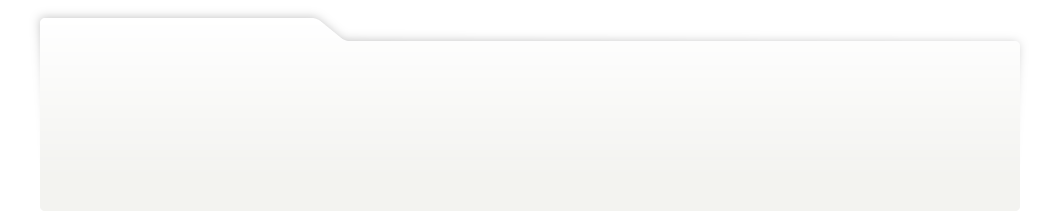
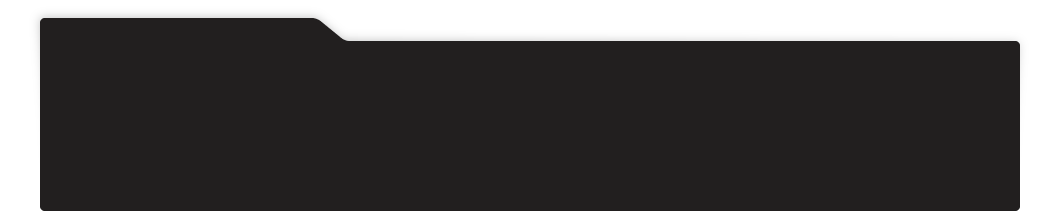
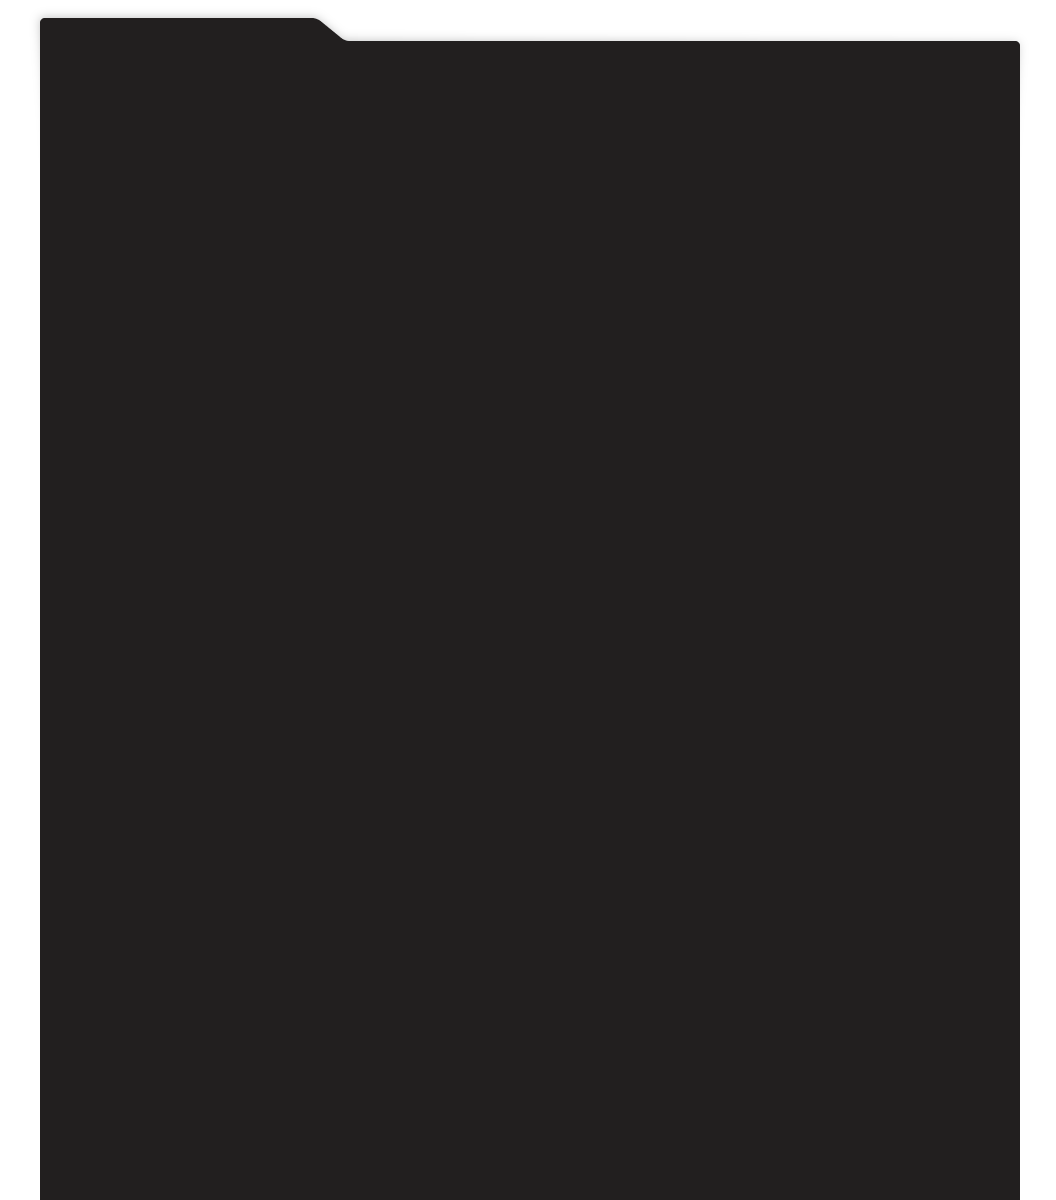
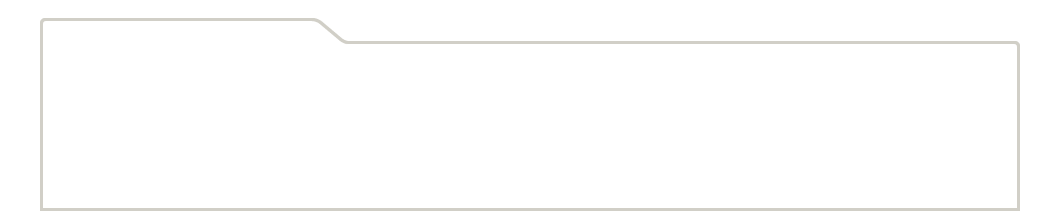
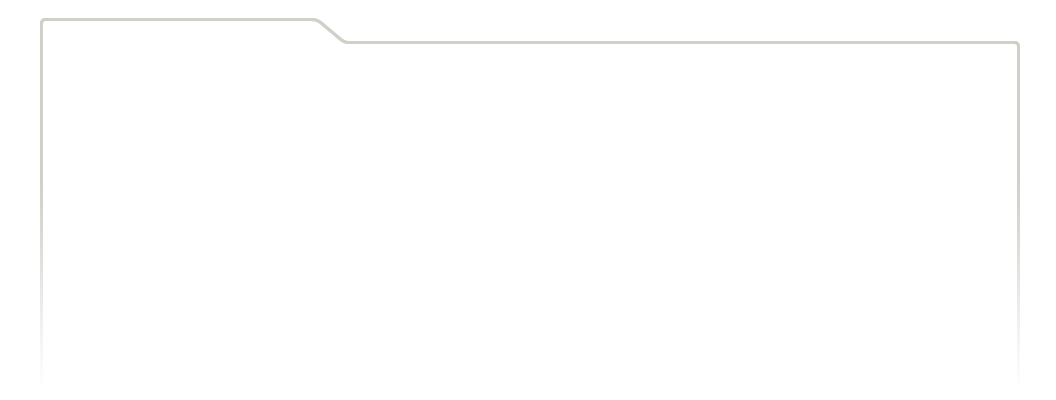
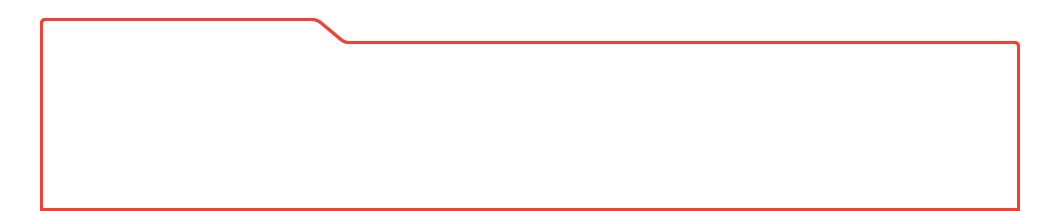
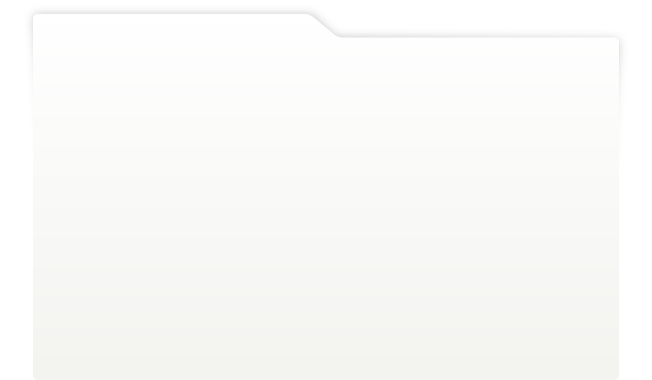
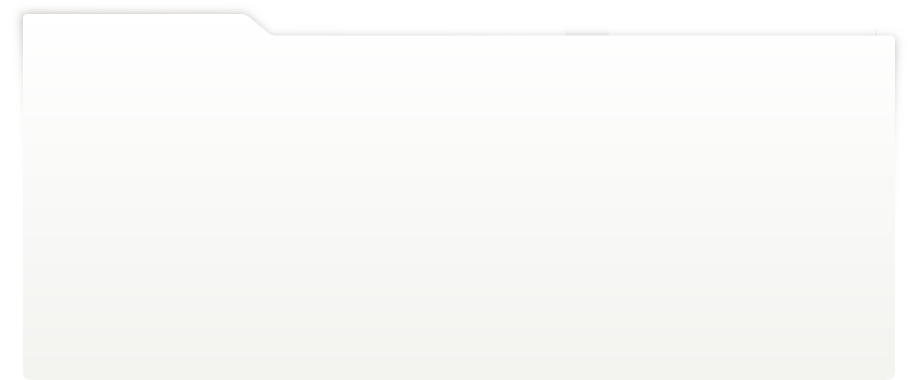
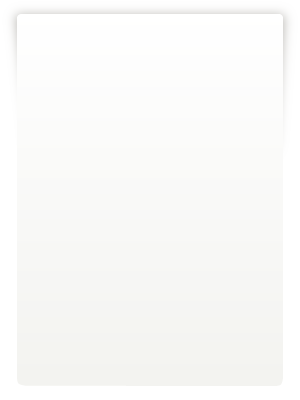
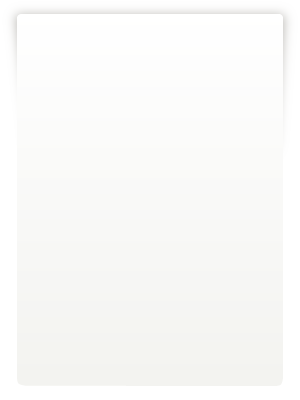
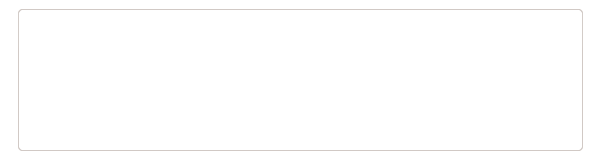
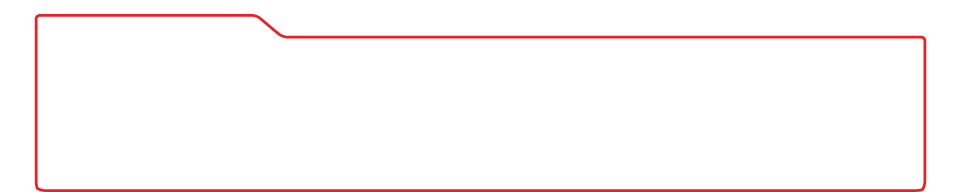
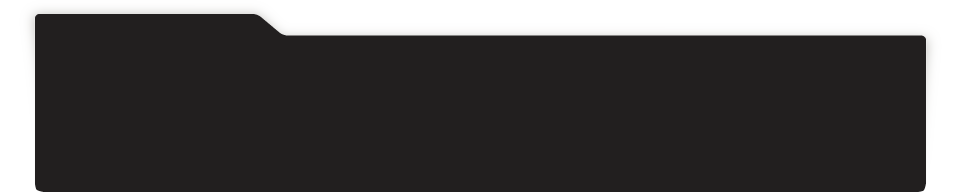
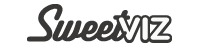
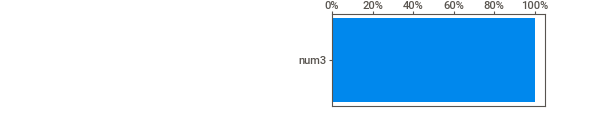
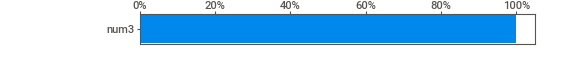
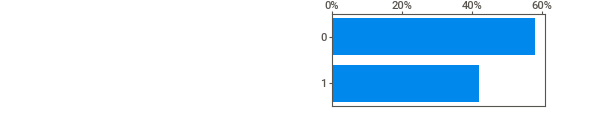
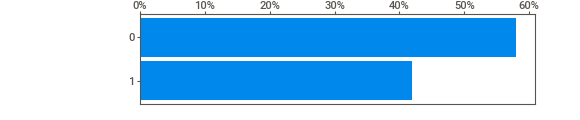
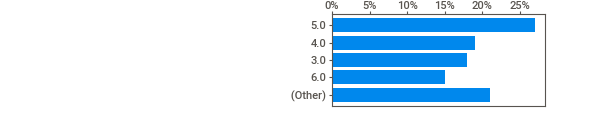
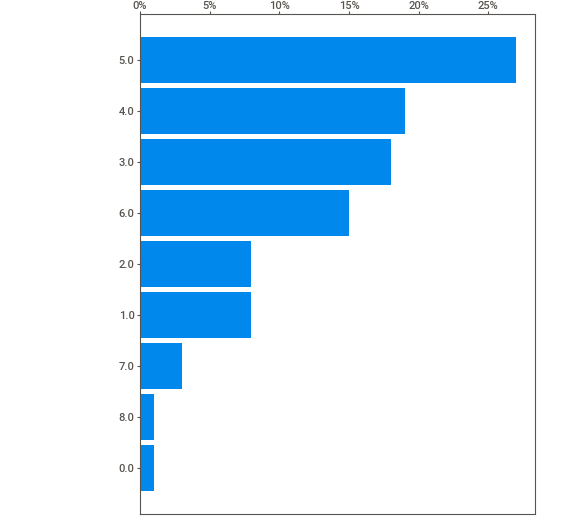
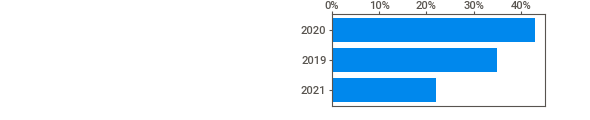
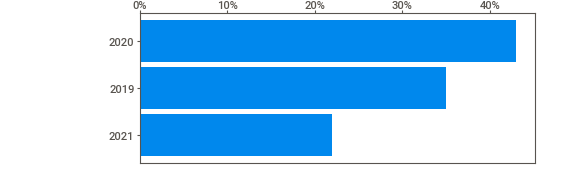
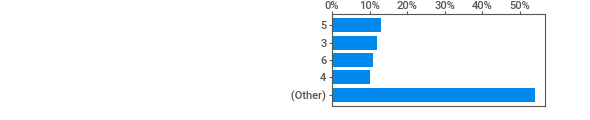
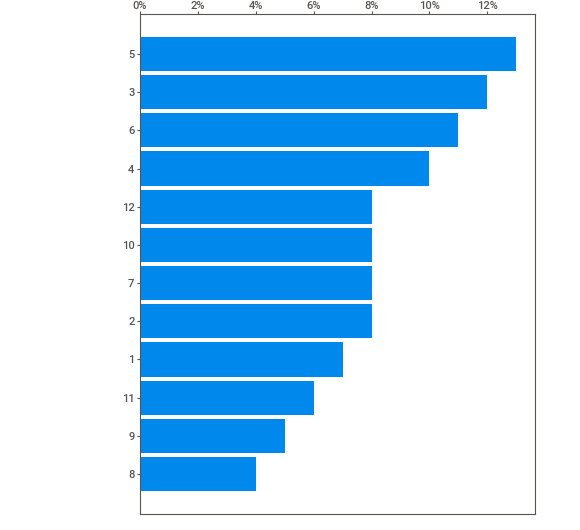
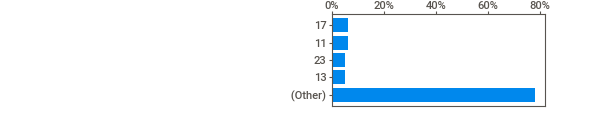
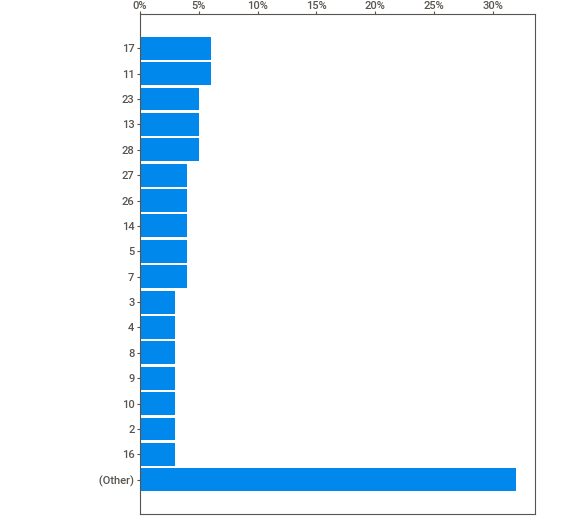
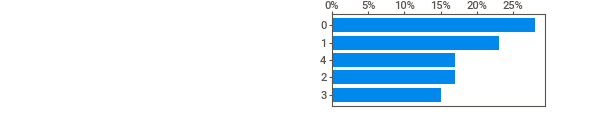
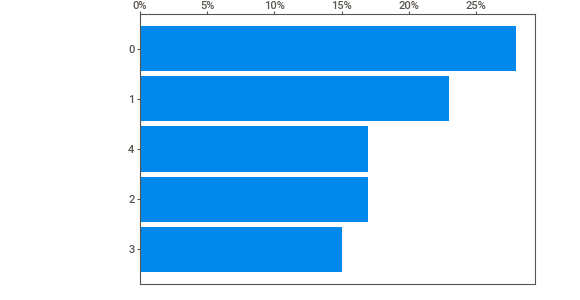
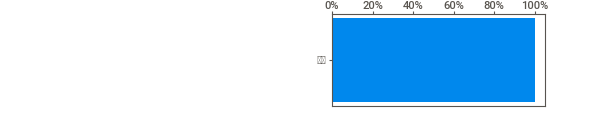
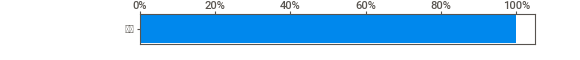
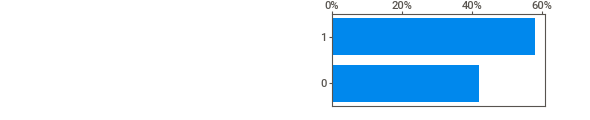
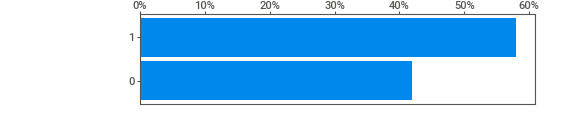
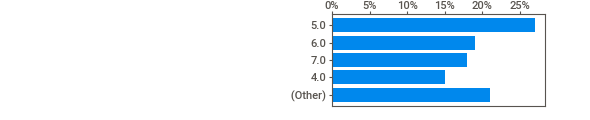
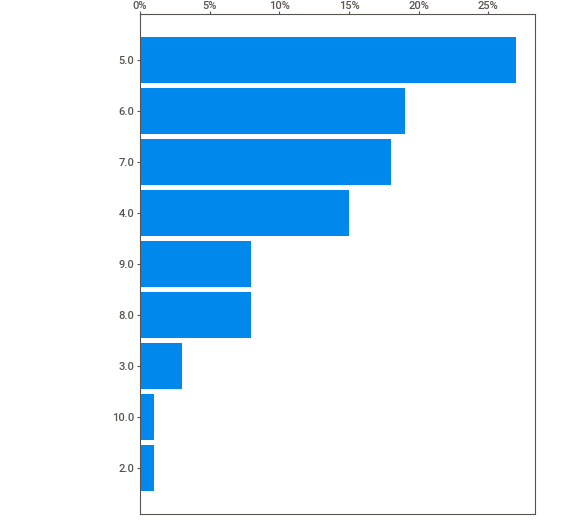
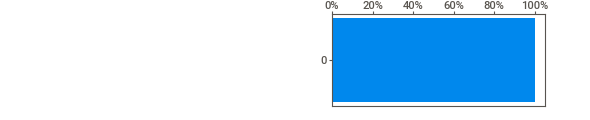
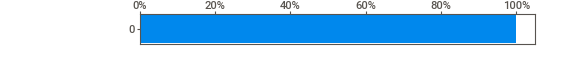
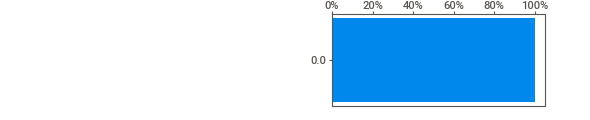
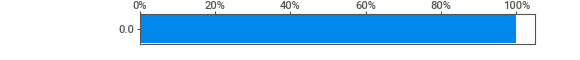
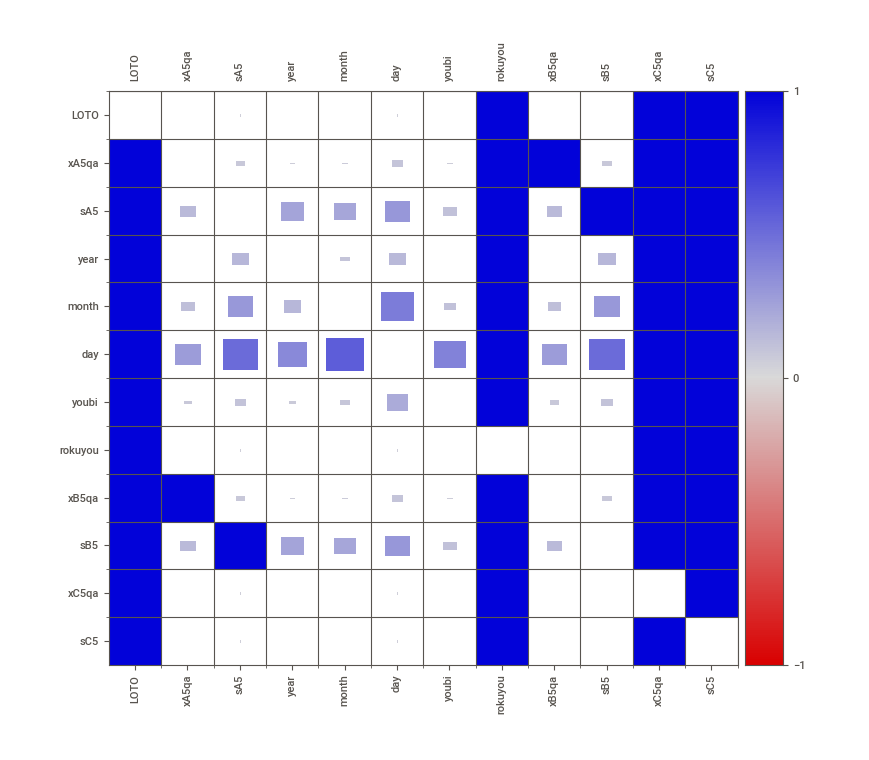
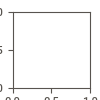

In [88]:
#@title
import sweetviz as sv

my_report = sv.analyze(u_2)
my_report.show_html("sweetviz_report_2col.html")
from IPython.display import HTML
HTML(filename='sweetviz_report_2col.html')